In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split as tts
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import airbnb_project_functions as apf
import itertools
import csv
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as npAAaa
df=pd.read_csv("airbnbHawaii_clean6.csv")


In [2]:
non_features=['price','inResort','number_of_reviews','geometry','week','listing_id','log_price','listing_url','missing_rating','price_per_accommodation','price_per_bedroom','price_per_review','property_type','geometry','anomaly_score','price_per_accommodation','price_per_bedroom','price_per_review','amenities_length']
#add=[col for col in df.columns if 
features=[col for col in df.columns if col not in non_features]
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306254 entries, 0 to 306253
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             306254 non-null  float64
 1   longitude                            306254 non-null  float64
 2   accommodates                         306254 non-null  int64  
 3   bathrooms                            306254 non-null  float64
 4   bedrooms                             306254 non-null  float64
 5   review_scores_location               306254 non-null  float64
 6   review_scores_rating                 306254 non-null  float64
 7   review_scores_cleanliness            306254 non-null  float64
 8   room_type_Private room               306254 non-null  int64  
 9   room_type_Hotel room                 306254 non-null  int64  
 10  room_type_Shared room                306254 non-null  int64  
 11  isShared_bath

In [3]:

train, test=apf.train_test_split_airbnb(df,0.8)
#non_features=['price','number_of_reviews','listing_id','log_price','listing_url','missing_rating','price_per_accommodation','price_per_bedroom','price_per_review']
#features=[col for col in df.columns if col not in non_features]
features=features
X_train=train[features]
y_train=train['price']
X_test=test[features]
y_test=test['price']

# Best model at the time of this analysis

In [5]:

xgb_model = xgb.XGBRegressor(n_estimators=100,          # Number of trees in the forest
                    max_depth=7,              # Maximum depth of the tree
                    learning_rate=0.1,          # Step size shrinkage used in update to prevent overfitting
                    subsample=0.7,              # Proportion of samples to use for training each tree
                    colsample_bytree=0.8,       # Proportion of features to use for training each tree
                    gamma=0,                 # Minimum loss reduction required to make a further partition
                    random_state=42
                            )
xgb_model.fit(X_train, y_train)  

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
# Fit the model

# Calculate metrics
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print("XGBoost Results:")
print(f"Train RMSE: {rmse_train_xgb}")
print(f"Test RMSE: {rmse_test_xgb}")
print(f"Train R2: {r2_train_xgb}")
print(f"Test R2: {r2_test_xgb}")

XGBoost Results:
Train RMSE: 71.39206403742125
Test RMSE: 116.24083687286158
Train R2: 0.9161648716952602
Test R2: 0.7598687522283255


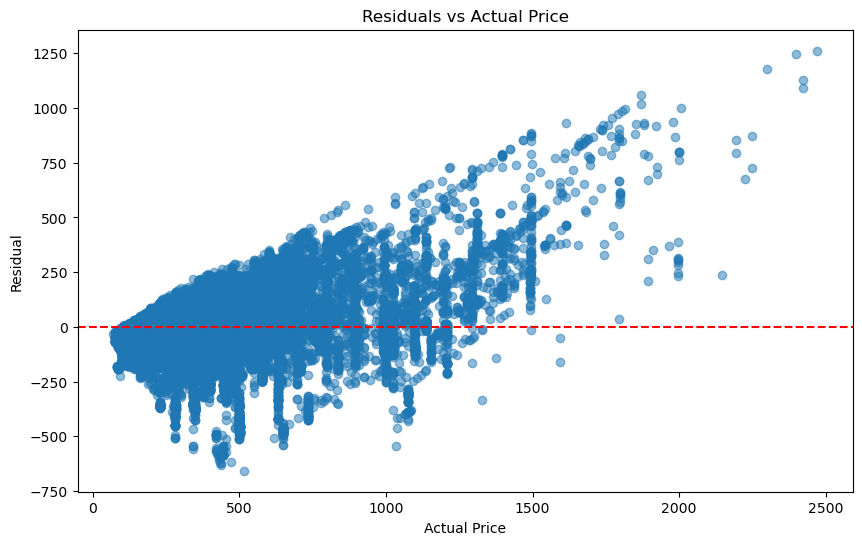

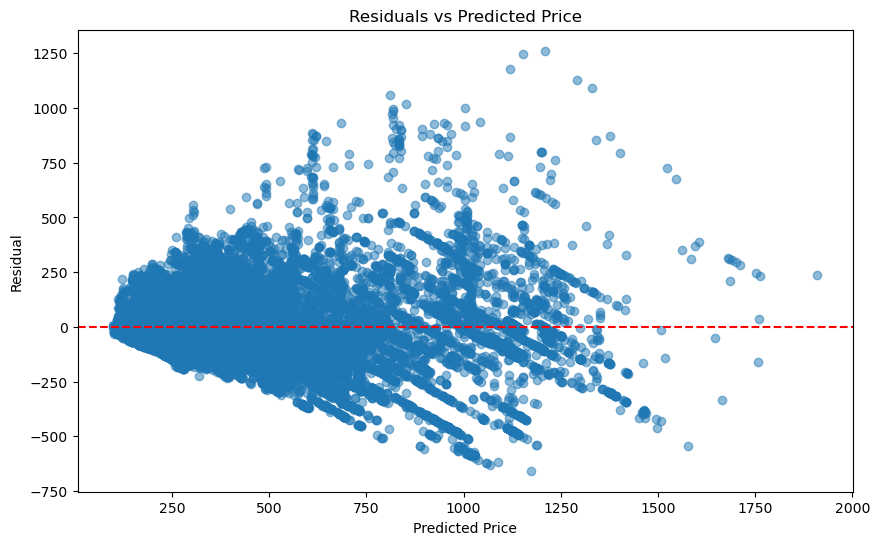

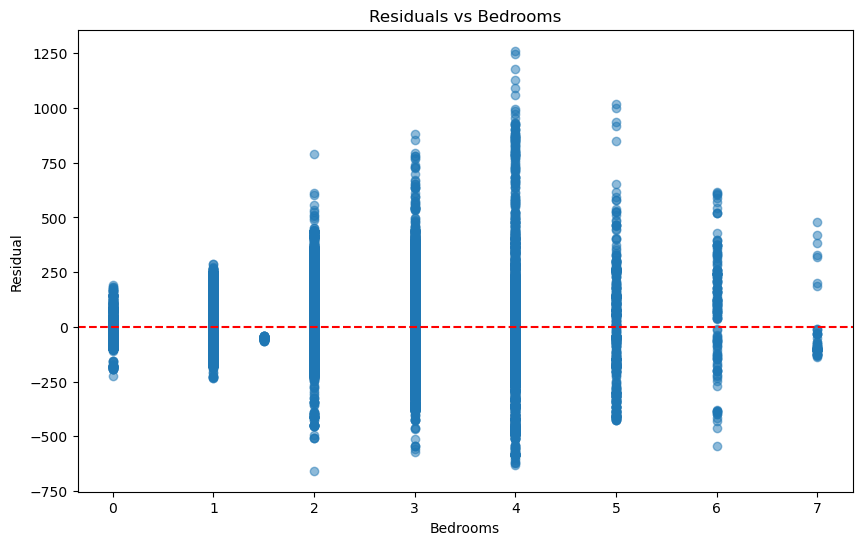

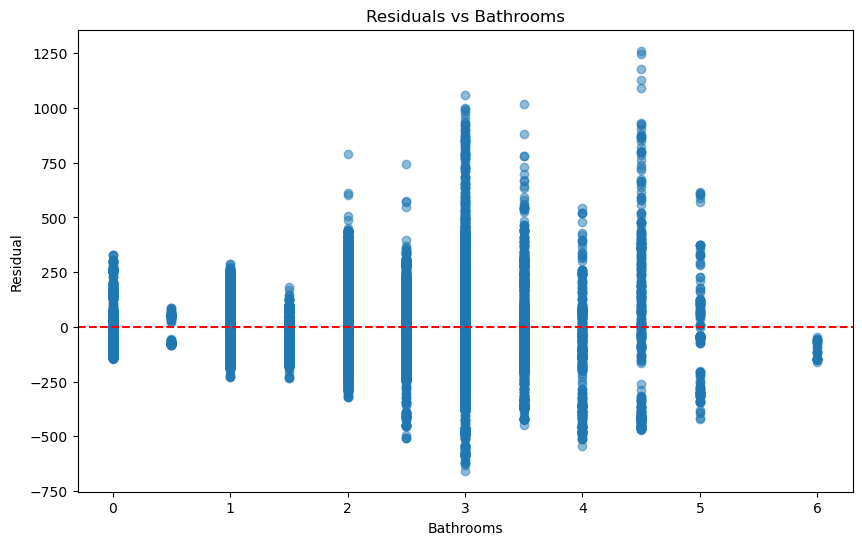

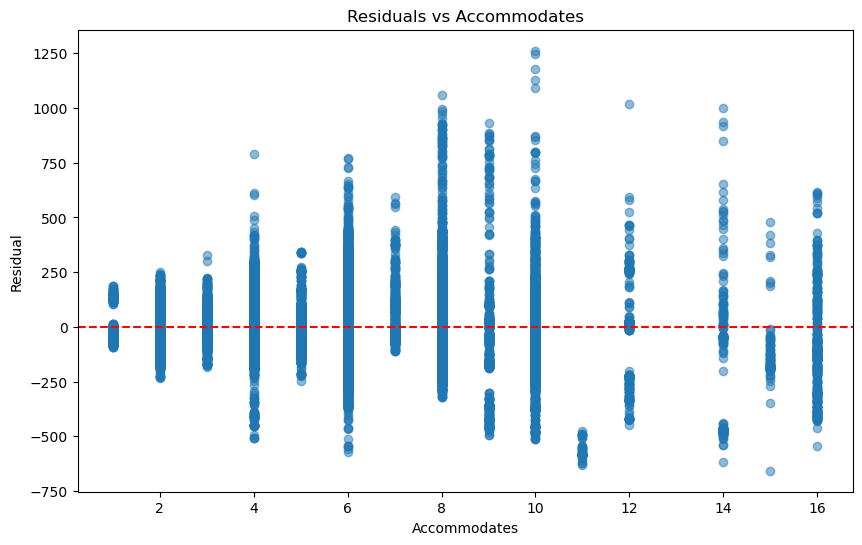

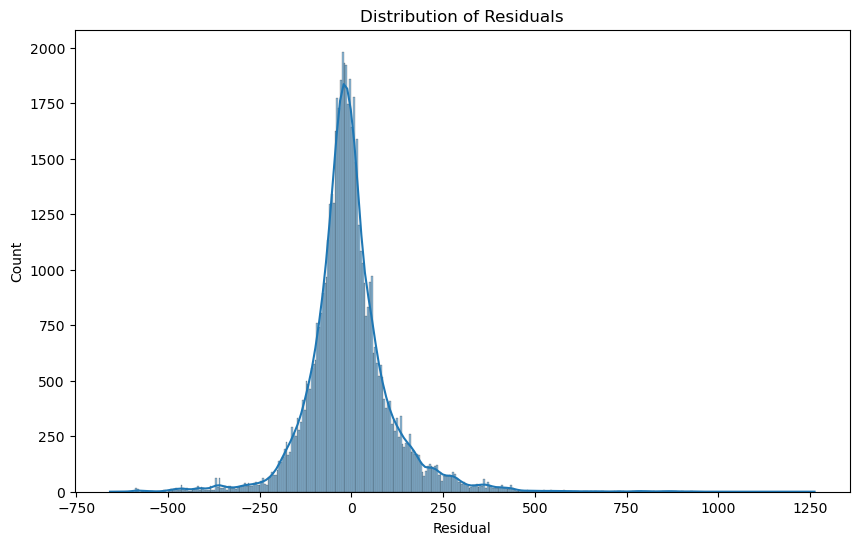

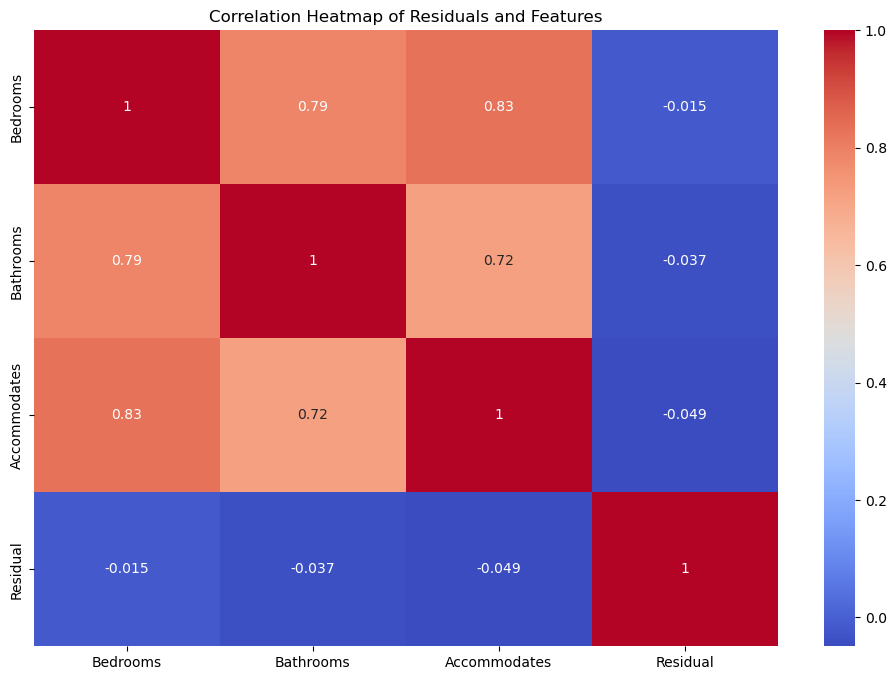

In [7]:


# Calculate residuals
test_residuals = y_test - y_pred_test_xgb

# Create a DataFrame with test data, predictions, and residuals
residual_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_test_xgb,
    'Residual': test_residuals,
    'Bedrooms': test['bedrooms'],
    'Bathrooms': test['bathrooms'],
    'Accommodates': test['accommodates']
})

# Function to create residual plots
def plot_residuals(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# 1. Residuals vs Actual Price
plot_residuals(residual_df['Actual Price'], residual_df['Residual'], 
               'Actual Price', 'Residual', 'Residuals vs Actual Price')

# 2. Residuals vs Predicted Price
plot_residuals(residual_df['Predicted Price'], residual_df['Residual'], 
               'Predicted Price', 'Residual', 'Residuals vs Predicted Price')

# 3. Residuals vs Bedrooms
plot_residuals(residual_df['Bedrooms'], residual_df['Residual'], 
               'Bedrooms', 'Residual', 'Residuals vs Bedrooms')

# 4. Residuals vs Bathrooms
plot_residuals(residual_df['Bathrooms'], residual_df['Residual'], 
               'Bathrooms', 'Residual', 'Residuals vs Bathrooms')

# 5. Residuals vs Accommodates
plot_residuals(residual_df['Accommodates'], residual_df['Residual'], 
               'Accommodates', 'Residual', 'Residuals vs Accommodates')

# 6. Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residual_df['Residual'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

# 7. Heatmap of Residuals
plt.figure(figsize=(12, 8))
sns.heatmap(residual_df[['Bedrooms', 'Bathrooms', 'Accommodates', 'Residual']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Residuals and Features')
plt.show()


# Residuals Analysis

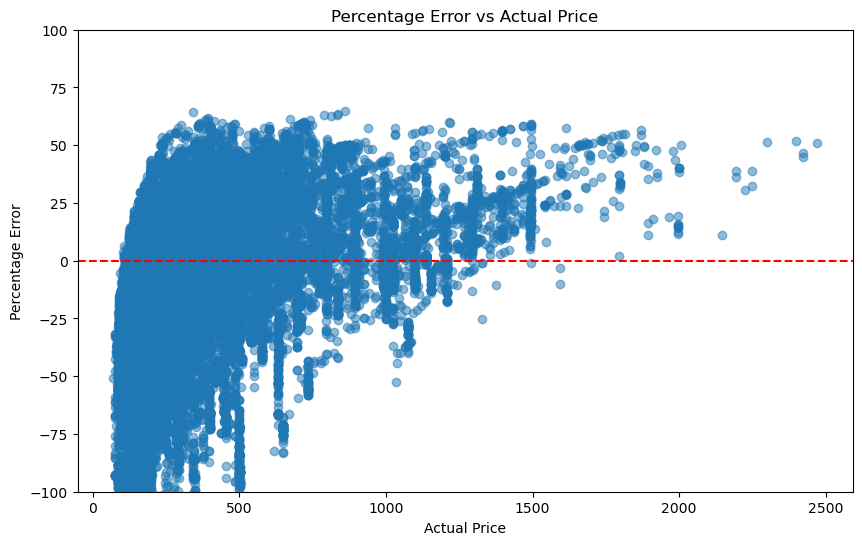

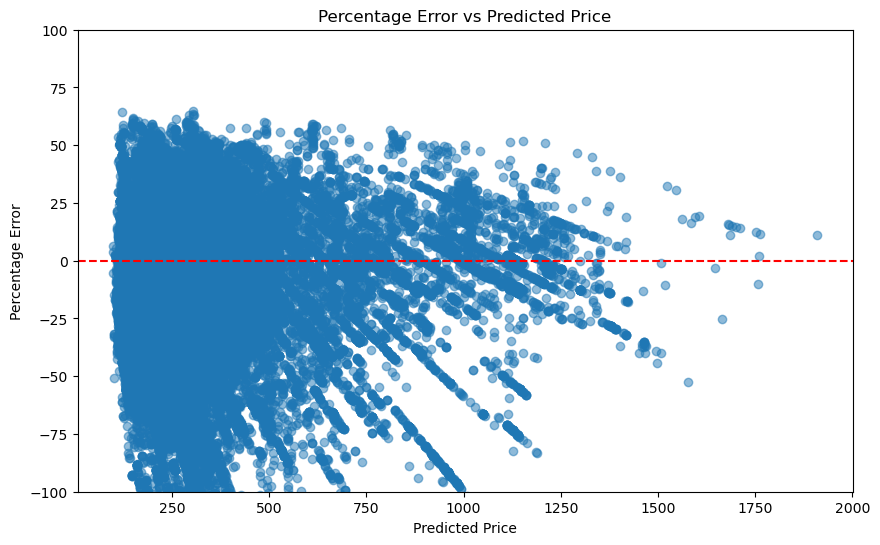

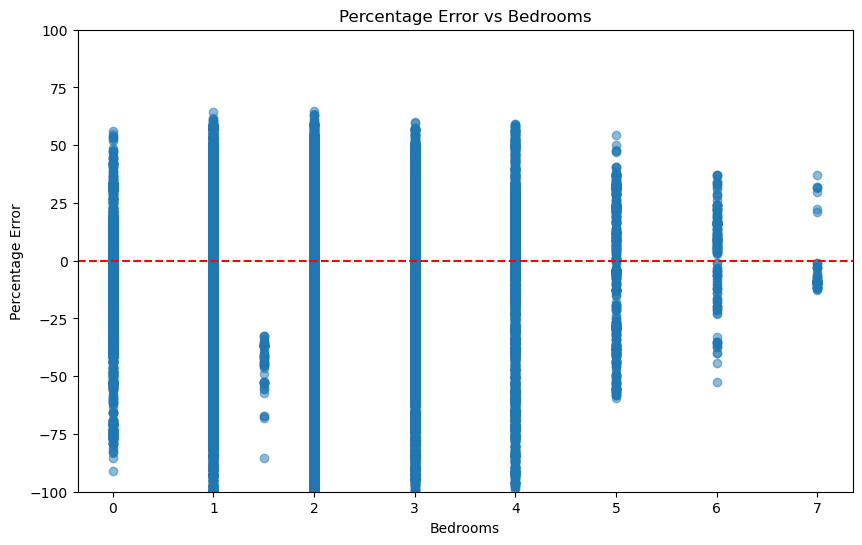

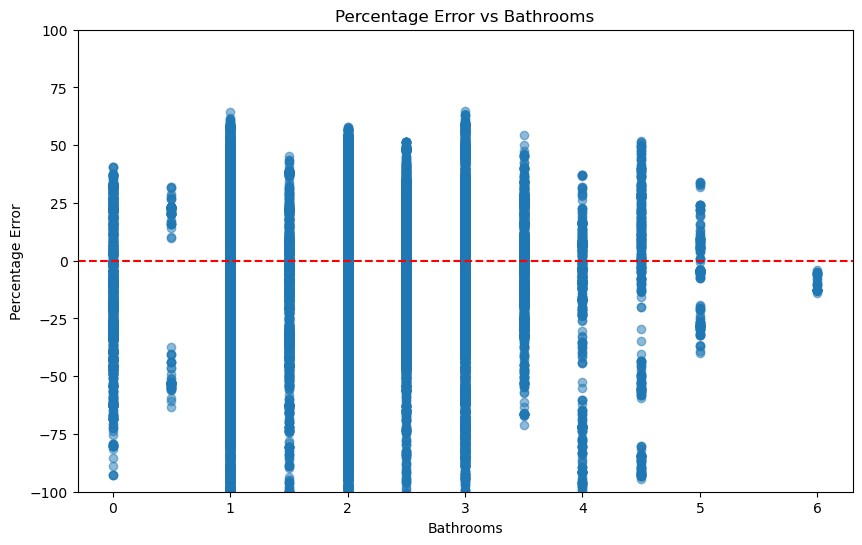

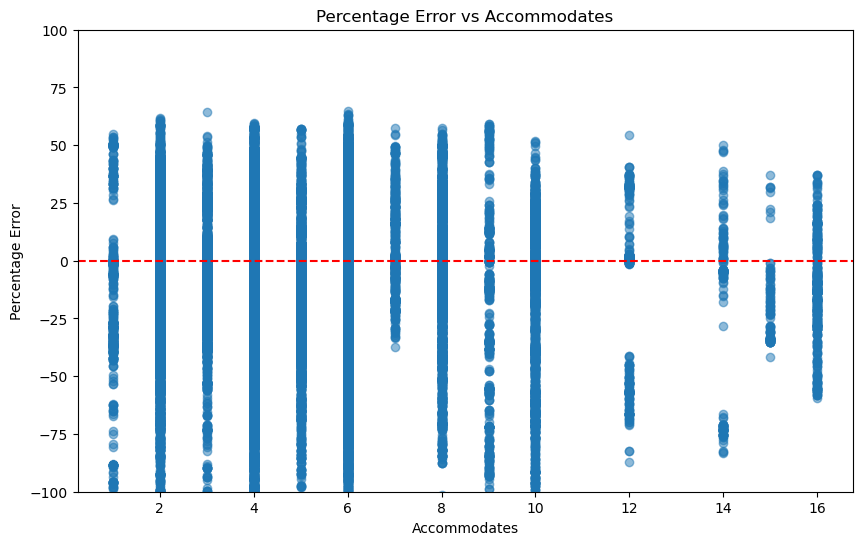

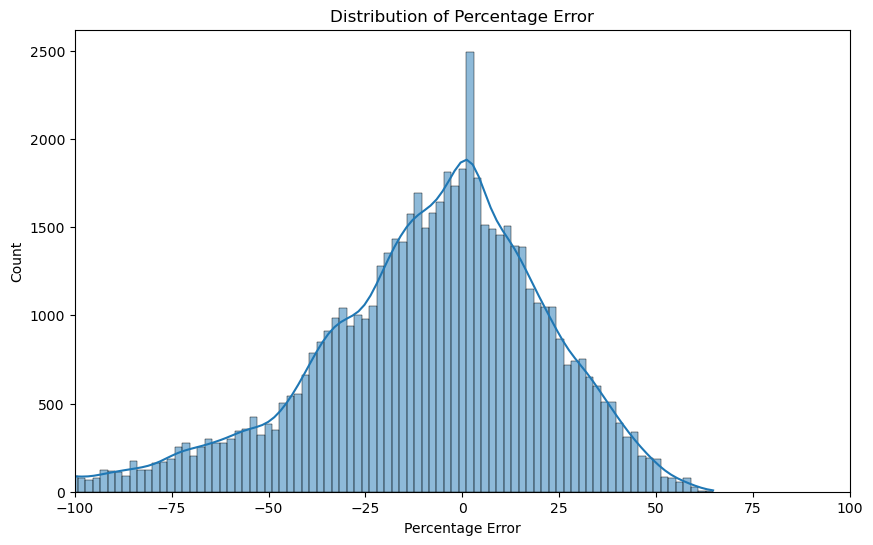

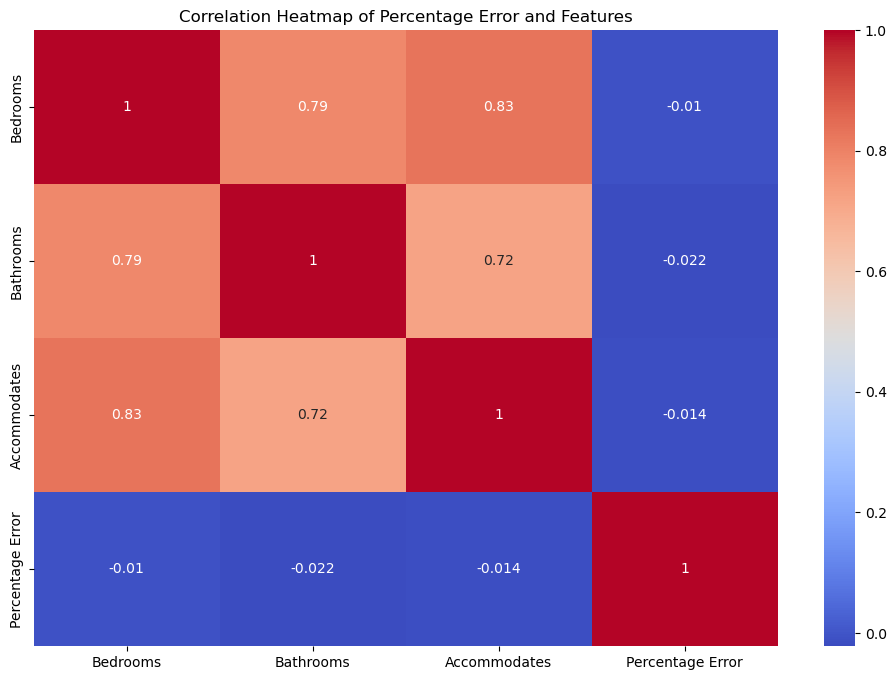

In [9]:


# Calculate percentage error
percentage_error = ((y_test - y_pred_test_xgb) / y_test) * 100

# Create a DataFrame with test data, predictions, and percentage error
error_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_test_xgb,
    'Percentage Error': percentage_error,
    'Bedrooms': test['bedrooms'],
    'Bathrooms': test['bathrooms'],
    'Accommodates': test['accommodates']
})

# Function to create percentage error plots
def plot_percentage_error(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.ylim(-100, 100)  # Limit y-axis to -100% to 100% for better visibility
    plt.show()

# 1. Percentage Error vs Actual Price
plot_percentage_error(error_df['Actual Price'], error_df['Percentage Error'], 
                      'Actual Price', 'Percentage Error', 'Percentage Error vs Actual Price')

# 2. Percentage Error vs Predicted Price
plot_percentage_error(error_df['Predicted Price'], error_df['Percentage Error'], 
                      'Predicted Price', 'Percentage Error', 'Percentage Error vs Predicted Price')

# 3. Percentage Error vs Bedrooms
plot_percentage_error(error_df['Bedrooms'], error_df['Percentage Error'], 
                      'Bedrooms', 'Percentage Error', 'Percentage Error vs Bedrooms')

# 4. Percentage Error vs Bathrooms
plot_percentage_error(error_df['Bathrooms'], error_df['Percentage Error'], 
                      'Bathrooms', 'Percentage Error', 'Percentage Error vs Bathrooms')

# 5. Percentage Error vs Accommodates
plot_percentage_error(error_df['Accommodates'], error_df['Percentage Error'], 
                      'Accommodates', 'Percentage Error', 'Percentage Error vs Accommodates')

# 6. Distribution of Percentage Error
plt.figure(figsize=(10, 6))
sns.histplot(error_df['Percentage Error'], kde=True)
plt.title('Distribution of Percentage Error')
plt.xlabel('Percentage Error')
plt.xlim(-100, 100)  # Limit x-axis to -100% to 100% for better visibility
plt.show()

# 7. Heatmap of Percentage Error
plt.figure(figsize=(12, 8))
sns.heatmap(error_df[['Bedrooms', 'Bathrooms', 'Accommodates', 'Percentage Error']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Percentage Error and Features')
plt.show()

# 8. Mean Absolute


**It is a good that there is low correlation between the features and the residual.**

# A look at predictions

In [12]:
test['prediction_xg']=y_pred_test_xgb
test[['price','prediction_xg','bedrooms','bathrooms','distanceToOcean', 'week','listing_url']].sample(20)

/var/folders/y_/zdr3xmx13qz3pq6ct9kglm7h0000gn/T/ipykernel_2783/3206469960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction_xg']=y_pred_test_xgb


price  prediction_xg  bedrooms  bathrooms  distanceToOcean  week  \
230191  505.142857     351.652283       2.0        2.0         0.293115    11   
208143  474.285714     437.149689       2.0        2.0         0.859883    35   
172537  411.000000     257.992920       2.0        2.0         7.105704    43   
140742  590.000000     454.989685       3.0        2.0         0.196854    33   
183951  895.000000     883.237488       3.0        3.0         2.058599    19   
284474  223.571429     301.290680       2.0        2.0         0.367797    12   
169353  649.000000    1089.294556       4.0        3.0         0.226528    38   
82148   581.000000     367.438110       3.0        3.0         2.122789    22   
241205  185.000000     244.340652       1.0        1.0         2.231965    20   
91180   177.285714     180.975601       1.0        1.0         1.061201    15   
87110   580.000000     299.292175       2.0        2.5         1.376092    26   
6236    100.000000     134.231018       1.0        1.0         2.140810    34   
305199  235.000000     279.438263       2.0        2.0         0.328857    21   
153000  844.857143     556.808655       3.0        3.0         0.391352    10   
217678  257.000000     270.473358       1.0        1.0         0.140815    13   
16319   563.714286     615.052856       3.0        3.0         0.538798     3   
82691   125.000000     141.195435       1.0        1.0         1.450325    39   
249768  200.000000     317.941864       1.0        1.0         0.135149    24   
75357   195.000000     245.895920       2.0        1.0         4.124226    36   
272023  231.000000     246.595627       1.0        1.0         0.065116    21   

                                            listing_url  
230191  https://www.airbnb.com/rooms/765963505039902546  
208143  https://www.airbnb.com/rooms/696629761409644721  
172537  https://www.airbnb.com/rooms/563166382759425318  
140742            https://www.airbnb.com/rooms/50138664  
183951  https://www.airbnb.com/rooms/623056409278600927  
284474  https://www.airbnb.com/rooms/913844946460173430  
169353  https://www.airbnb.com/rooms/549848032693936391  
82148             https://www.airbnb.com/rooms/34944583  
241205  https://www.airbnb.com/rooms/794424796753381280  
91180             https://www.airbnb.com/rooms/39090114  
87110             https://www.airbnb.com/rooms/37749988  
6236               https://www.airbnb.com/rooms/2136529  
305199  https://www.airbnb.com/rooms/971034855253492261  
153000            https://www.airbnb.com/rooms/52078472  
217678  https://www.airbnb.com/rooms/725663612934106534  
16319              https://www.airbnb.com/rooms/8409636  
82691             https://www.airbnb.com/rooms/35316456  
249768  https://www.airbnb.com/rooms/807703669245025117  
75357             https://www.airbnb.com/rooms/32745532  
272023  https://www.airbnb.com/rooms/879669919490462745

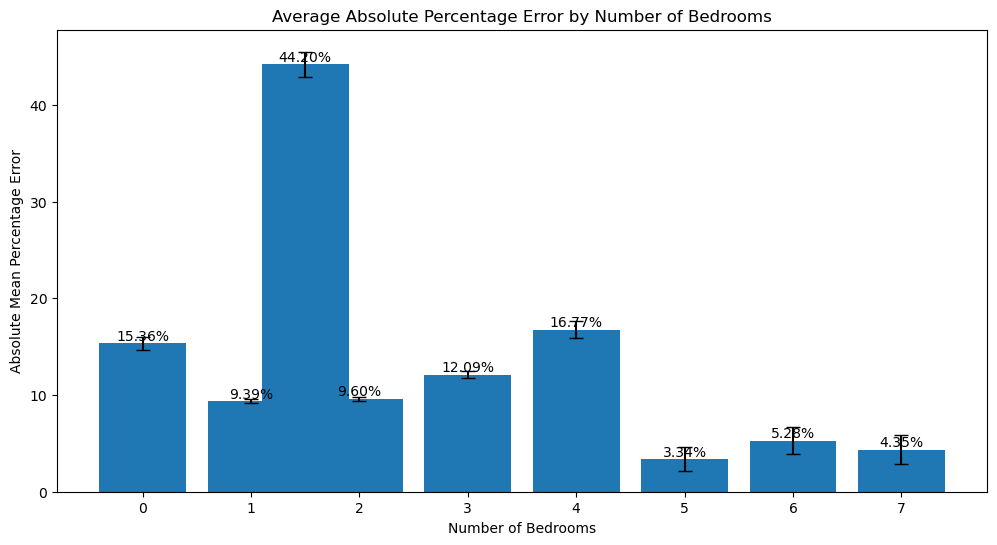


Summary for Bedrooms:
   Bedrooms       mean  count        std  Abs Mean Error  Std Error
2       1.5 -44.196791     62  10.139462       44.196791   1.287713
5       4.0 -16.766859   2494  43.348123       16.766859   0.868005
0       0.0 -15.357973   2392  33.001225       15.357973   0.674760
4       3.0 -12.090255   8899  36.375779       12.090255   0.385604
3       2.0  -9.600957  24602  31.984181        9.600957   0.203915
1       1.0  -9.385783  22181  31.346852        9.385783   0.210476
7       6.0   5.276484    173  18.643516        5.276484   1.417440
8       7.0  -4.350208     65  12.273200        4.350208   1.522303
6       5.0  -3.335255    532  28.696372        3.335255   1.244146


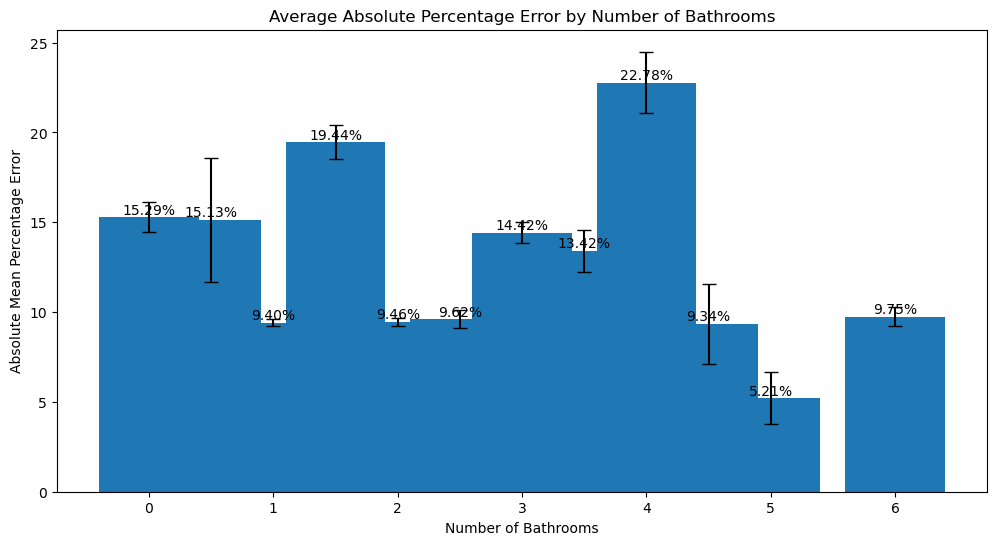


Summary for Bathrooms:
    Bathrooms       mean  count        std  Abs Mean Error  Std Error
8         4.0 -22.777515    484  37.719168       22.777515   1.714508
3         1.5 -19.440793   1283  33.911942       19.440793   0.946759
0         0.0 -15.291047   1215  29.768097       15.291047   0.854010
1         0.5 -15.131257    116  37.338380       15.131257   3.466782
6         3.0 -14.418136   4635  40.307114       14.418136   0.592048
7         3.5 -13.417950   1323  42.315809       13.417950   1.163383
11        6.0  -9.749472     39   3.322508        9.749472   0.532027
5         2.5  -9.616981   3892  31.925096        9.616981   0.511736
4         2.0  -9.458418  23004  32.090741        9.458418   0.211582
2         1.0  -9.402069  24853  31.602204        9.402069   0.200460
9         4.5  -9.344799    382  43.551364        9.344799   2.228282
10        5.0  -5.208539    174  18.845294        5.208539   1.428658

Correlation of features with Percentage Error:
Bedrooms    -0.010

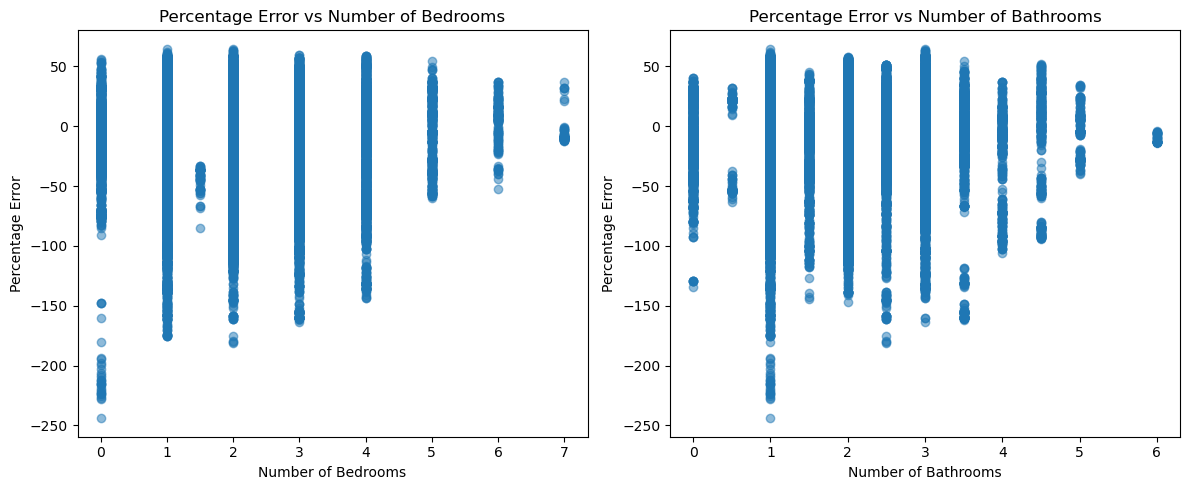

In [13]:


# Function to calculate and plot average error
def plot_average_error(feature_name):
    # Calculate average absolute percentage error
    avg_error = error_df.groupby(feature_name)['Percentage Error'].agg(['mean', 'count', 'std']).reset_index()
    avg_error['Abs Mean Error'] = avg_error['mean'].abs()
    avg_error['Std Error'] = avg_error['std'] / np.sqrt(avg_error['count'])  # Standard error

    # Sort by the feature value
    avg_error = avg_error.sort_values(feature_name)

    # Bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(avg_error[feature_name], avg_error['Abs Mean Error'], 
                   yerr=avg_error['Std Error'], capsize=5)
    plt.title(f'Average Absolute Percentage Error by Number of {feature_name}')
    plt.xlabel(f'Number of {feature_name}')
    plt.ylabel('Absolute Mean Percentage Error')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}%',
                 ha='center', va='bottom')
    
    plt.show()

    # Print summary statistics
    print(f"\nSummary for {feature_name}:")
    print(avg_error.sort_values('Abs Mean Error', ascending=False))

# Plot for Bedrooms
plot_average_error('Bedrooms')

# Plot for Bathrooms
plot_average_error('Bathrooms')

# Additional analysis: Correlation with error
correlation_with_error = error_df[['Bedrooms', 'Bathrooms', 'Percentage Error']].corr()['Percentage Error'].drop('Percentage Error')
print("\nCorrelation of features with Percentage Error:")
print(correlation_with_error)

# Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(error_df['Bedrooms'], error_df['Percentage Error'], alpha=0.5)
plt.title('Percentage Error vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Percentage Error')

plt.subplot(1, 2, 2)
plt.scatter(error_df['Bathrooms'], error_df['Percentage Error'], alpha=0.5)
plt.title('Percentage Error vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Percentage Error')

plt.tight_layout()
plt.show()


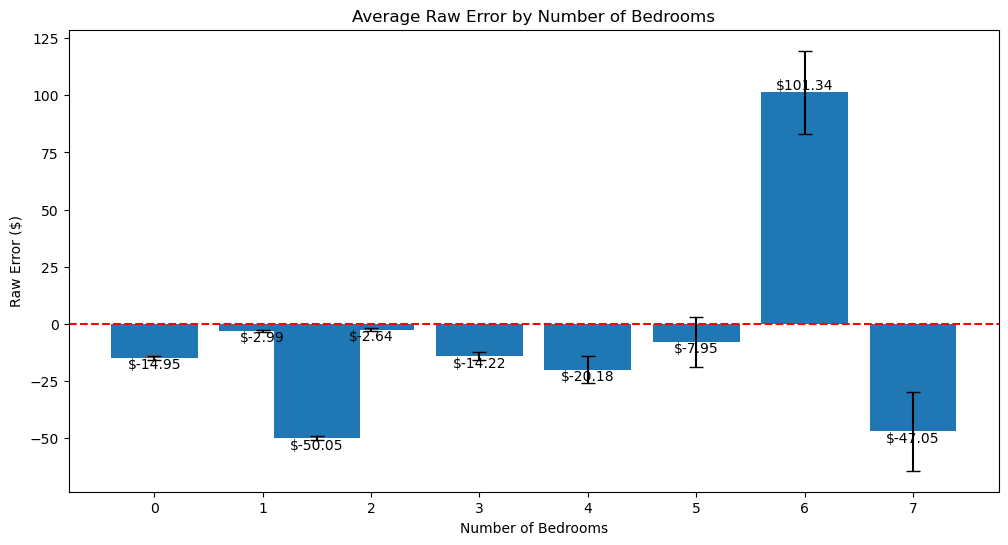


Summary for Bedrooms:
   Bedrooms        mean  count         std  Abs Mean Error  Std Error
7       6.0  101.343328    173  239.220121      101.343328  18.187569
2       1.5  -50.051072     62    6.896485       50.051072   0.875855
8       7.0  -47.051500     65  139.710982       47.051500  17.329015
5       4.0  -20.179637   2494  295.326875       20.179637   5.913638
0       0.0  -14.948054   2392   47.736486       14.948054   0.976045
4       3.0  -14.221038   8899  155.926525       14.221038   1.652911
6       5.0   -7.945928    532  251.827081        7.945928  10.918089
1       1.0   -2.991029  22181   64.421479        2.991029   0.432554
3       2.0   -2.643218  24602  100.355649        2.643218   0.639818


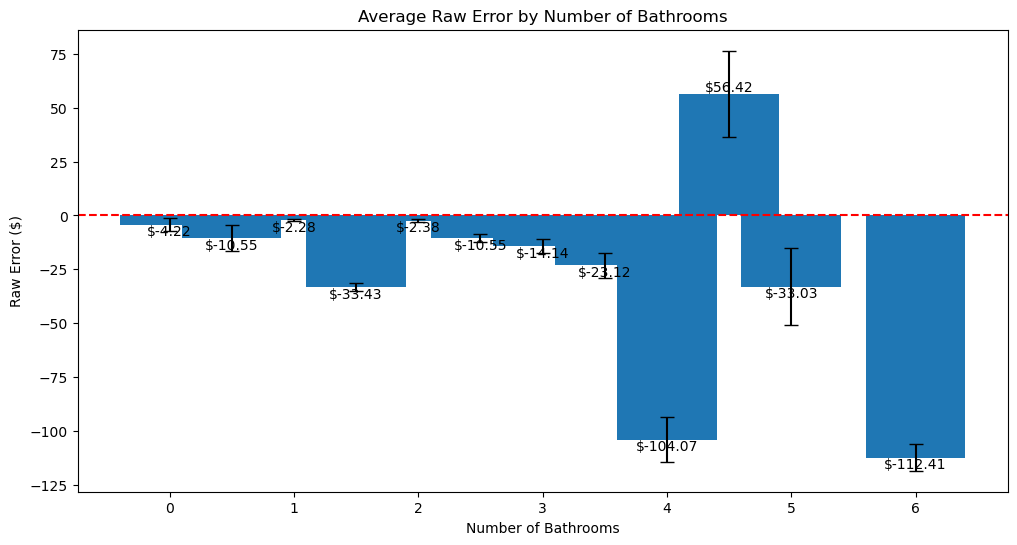


Summary for Bathrooms:
    Bathrooms        mean  count         std  Abs Mean Error  Std Error
11        6.0 -112.411411     39   38.308513      112.411411   6.134271
8         4.0 -104.068885    484  228.512827      104.068885  10.386947
9         4.5   56.415644    382  392.340011       56.415644  20.073861
3         1.5  -33.428731   1283   67.750226       33.428731   1.891461
10        5.0  -33.027764    174  237.663629       33.027764  18.017233
7         3.5  -23.117768   1323  213.848371       23.117768   5.879305
6         3.0  -14.141950   4635  225.822098       14.141950   3.316970
5         2.5  -10.551952   3892  121.249384       10.551952   1.943538
1         0.5  -10.547581    116   65.677236       10.547581   6.097978
0         0.0   -4.216338   1215   97.927597        4.216338   2.809422
4         2.0   -2.383764  23004  104.761934        2.383764   0.690720
2         1.0   -2.279148  24853   63.606237        2.279148   0.403469

Correlation of features with Raw Error:

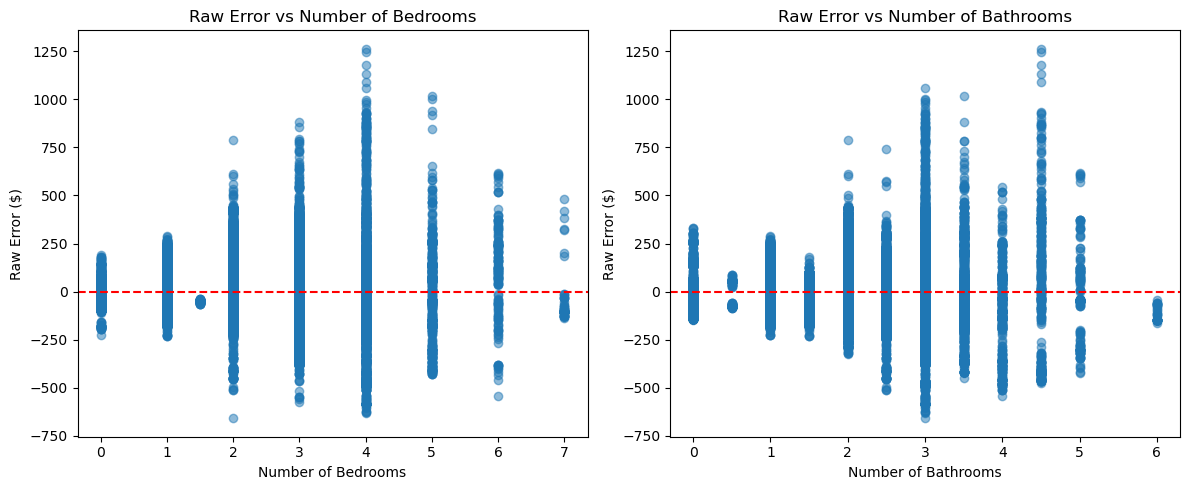


Overall Mean Absolute Error: $77.07


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Calculate raw error
raw_error = y_test - y_pred_test_xgb

# Create a DataFrame with test data, predictions, and raw error
error_df = pd.DataFrame({
    'Actual Price': y_test,
    'Predicted Price': y_pred_test_xgb,
    'Raw Error': raw_error,
    'Bedrooms': test['bedrooms'],
    'Bathrooms': test['bathrooms'],
    'Accommodates': test['accommodates']
})

# Function to calculate and plot average raw error
def plot_average_raw_error(feature_name):
    # Calculate average raw error
    avg_error = error_df.groupby(feature_name)['Raw Error'].agg(['mean', 'count', 'std']).reset_index()
    avg_error['Abs Mean Error'] = avg_error['mean'].abs()
    avg_error['Std Error'] = avg_error['std'] / np.sqrt(avg_error['count'])  # Standard error

    # Sort by the feature value
    avg_error = avg_error.sort_values(feature_name)

    # Bar plot
    plt.figure(figsize=(12, 6))
    bars = plt.bar(avg_error[feature_name], avg_error['mean'], 
                   yerr=avg_error['Std Error'], capsize=5)
    plt.title(f'Average Raw Error by Number of {feature_name}')
    plt.xlabel(f'Number of {feature_name}')
    plt.ylabel('Raw Error ($)')
    
    # Add value labels on top of each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'${height:.2f}',
                 ha='center', va='bottom' if height > 0 else 'top')
    
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    plt.show()

    # Print summary statistics
    print(f"\nSummary for {feature_name}:")
    print(avg_error.sort_values('Abs Mean Error', ascending=False))

# Plot for Bedrooms
plot_average_raw_error('Bedrooms')

# Plot for Bathrooms
plot_average_raw_error('Bathrooms')

# Additional analysis: Correlation with error
correlation_with_error = error_df[['Bedrooms', 'Bathrooms', 'Raw Error']].corr()['Raw Error'].drop('Raw Error')
print("\nCorrelation of features with Raw Error:")
print(correlation_with_error)

# Scatter plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(error_df['Bedrooms'], error_df['Raw Error'], alpha=0.5)
plt.title('Raw Error vs Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Raw Error ($)')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(error_df['Bathrooms'], error_df['Raw Error'], alpha=0.5)
plt.title('Raw Error vs Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Raw Error ($)')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Calculate and print overall mean absolute error
mae = np.mean(np.abs(raw_error))
print(f"\nOverall Mean Absolute Error: ${mae:.2f}")


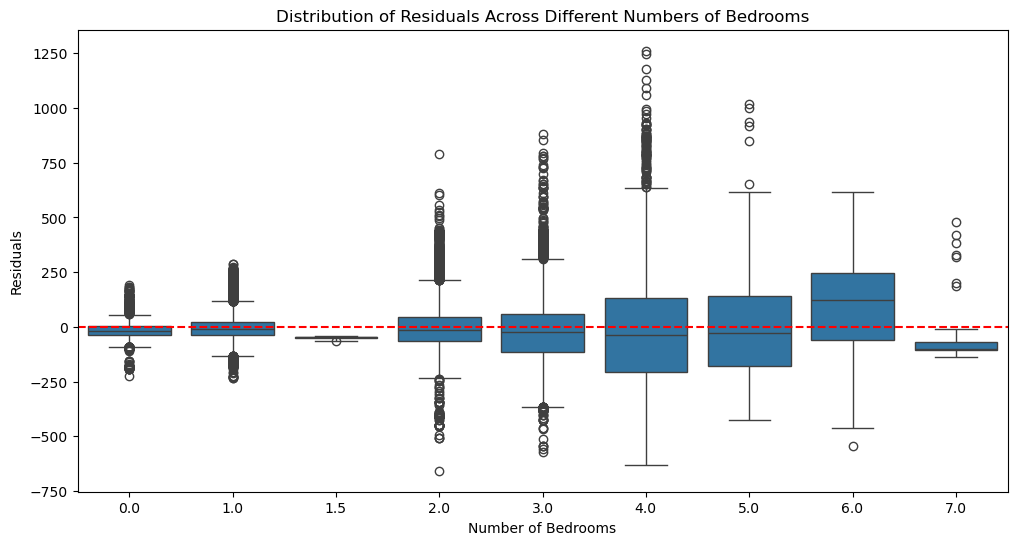

            count        mean         std         min         25%         50%  \
bedrooms                                                                        
0.0        2392.0  -14.948054   47.736486 -226.894318  -35.296294  -20.202644   
1.0       22181.0   -2.991029   64.421479 -232.832855  -39.450346  -11.123795   
1.5          62.0  -50.051072    6.896485  -65.905960  -53.100697  -48.303915   
2.0       24602.0   -2.643218  100.355649 -657.794678  -66.690552  -13.571384   
3.0        8899.0  -14.221038  155.926525 -573.075806 -113.022858  -22.951782   
4.0        2494.0  -20.179637  295.326875 -629.700195 -204.916199  -36.160187   
5.0         532.0   -7.945928  251.827081 -425.970825 -181.048035  -29.557220   
6.0         173.0  101.343328  239.220121 -542.630412  -61.331386  121.070190   
7.0          65.0  -47.051500  139.710982 -138.965088 -105.546387 -102.352295   

                 75%          max  
bedrooms                           
0.0         1.467636   191.364702  


In [15]:


# Calculate residuals
residuals = raw_error

# Create a DataFrame with bedrooms and residuals
residual_df = pd.DataFrame({
    'bedrooms': test['bedrooms'],  # Assuming 'bedrooms' is in your test DataFrame
    'residuals': residuals
})

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='residuals', data=residual_df)
plt.title('Distribution of Residuals Across Different Numbers of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# If you want to see summary statistics
print(residual_df.groupby('bedrooms')['residuals'].describe())

/Users/johnprichard/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/y_/zdr3xmx13qz3pq6ct9kglm7h0000gn/T/ipykernel_2783/3343413954.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['error']=abs_errors
/var/folders/y_/zdr3xmx13qz3pq6ct9kglm7h0000gn/T/ipykernel_2783/3343413954.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_price']=y_pred_test_xgb

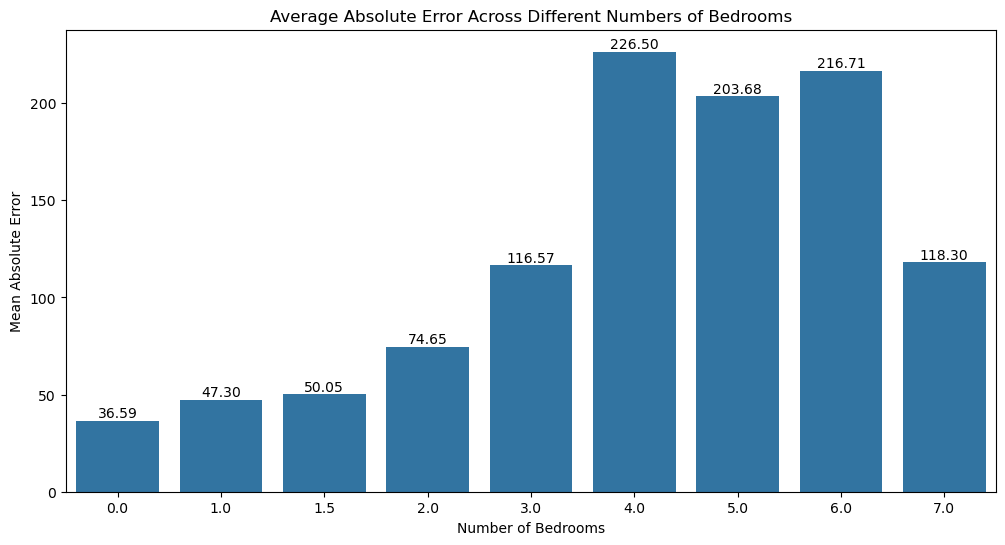

   bedrooms   abs_error
0       0.0   36.590151
1       1.0   47.302724
2       1.5   50.051072
3       2.0   74.650703
4       3.0  116.568160
5       4.0  226.496970
6       5.0  203.676000
7       6.0  216.705928
8       7.0  118.296461


In [16]:

# Calculate absolute errors
abs_errors = np.abs(y_test - y_pred_test_xgb )
rmse=np.sqrt(y_test-y_pred_test_xgb)**2
test['error']=abs_errors
test['predicted_price']=y_pred_test_xgb
# Create a DataFrame with bedrooms and absolute errors
error_df = pd.DataFrame({
    'bedrooms': test['bedrooms'],  # Assuming 'bedrooms' is in your test DataFrame
    'abs_error': abs_errors
})

# Calculate mean absolute error for each bedroom level
mean_errors = error_df.groupby('bedrooms')['abs_error'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='bedrooms', y='abs_error', data=mean_errors)
plt.title('Average Absolute Error Across Different Numbers of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Mean Absolute Error')

# Add value labels on top of each bar
for i, v in enumerate(mean_errors['abs_error']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Print the mean errors for each bedroom level
print(mean_errors)

# Look for features and interactions that will help explain higher priced listings.

In [ ]:
**Feature importances filtering for only 4 to 5 bedrooms**

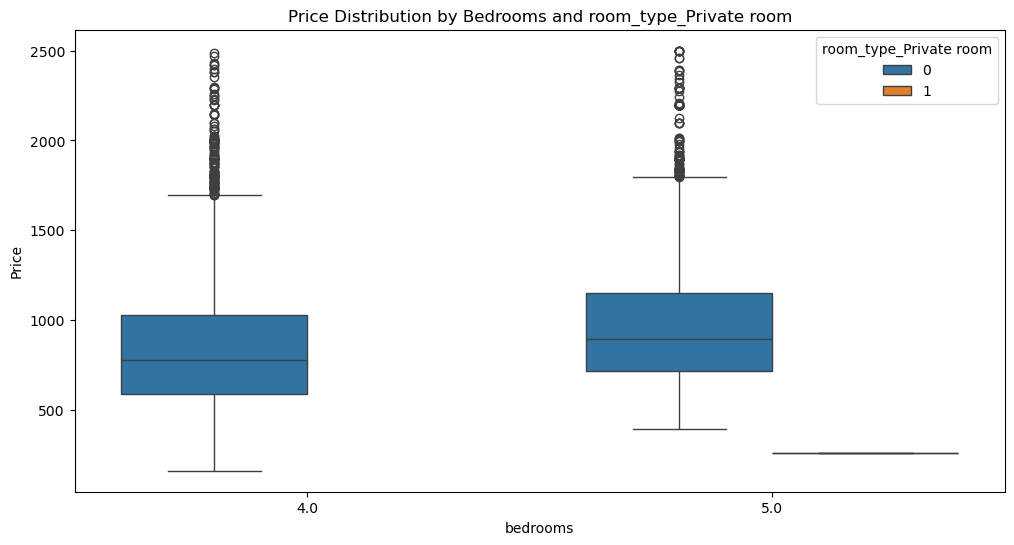


Mean Prices for room_type_Private room:
room_type_Private room           0      1
bedrooms                                 
4.0                     829.567840    NaN
5.0                     971.419785  257.0

Price Difference (5 bed - 4 bed) for each room_type_Private room category:
room_type_Private room
0    141.851944
1           NaN
dtype: float64


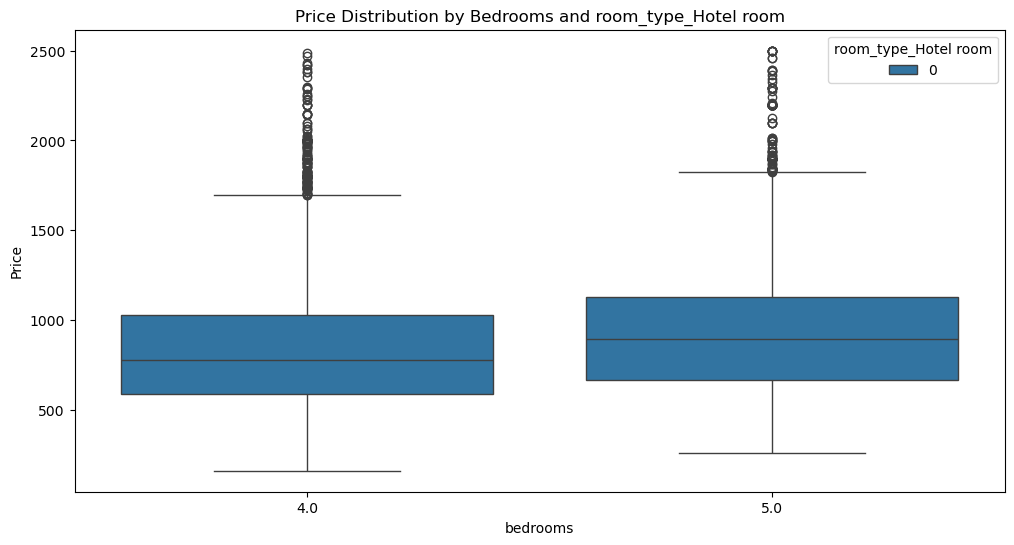


Mean Prices for room_type_Hotel room:
room_type_Hotel room           0
bedrooms                        
4.0                   829.567840
5.0                   954.596257

Price Difference (5 bed - 4 bed) for each room_type_Hotel room category:
room_type_Hotel room
0    125.028417
dtype: float64


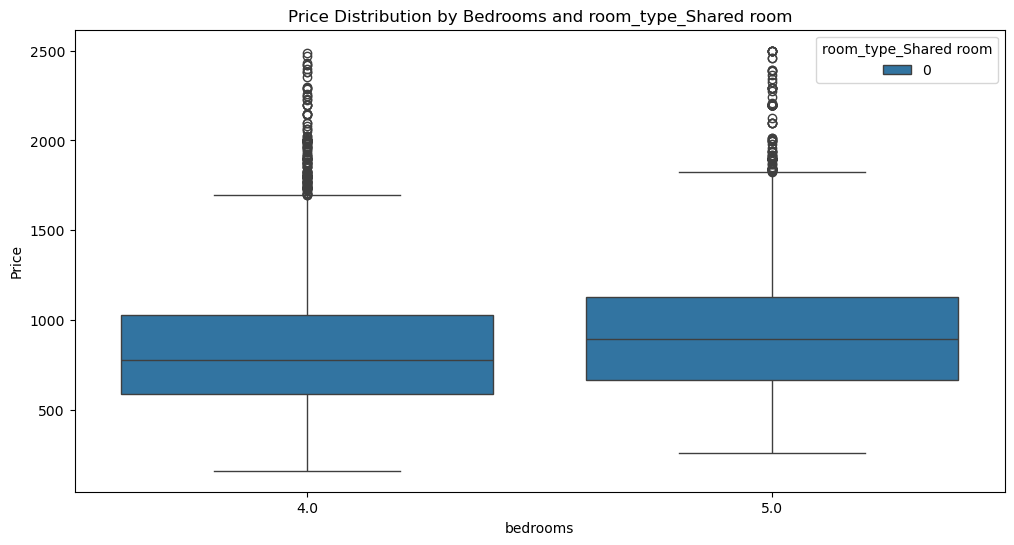


Mean Prices for room_type_Shared room:
room_type_Shared room           0
bedrooms                         
4.0                    829.567840
5.0                    954.596257

Price Difference (5 bed - 4 bed) for each room_type_Shared room category:
room_type_Shared room
0    125.028417
dtype: float64


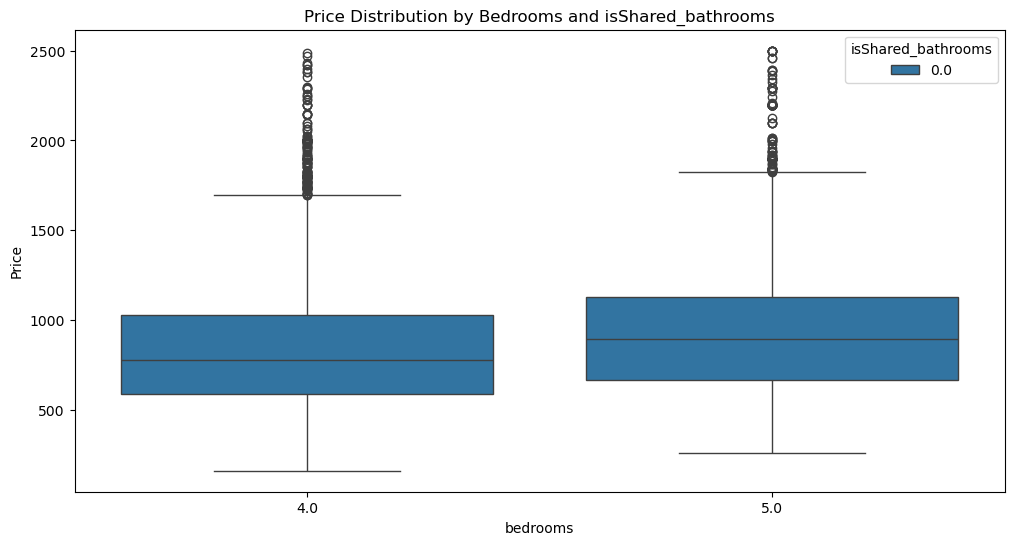


Mean Prices for isShared_bathrooms:
isShared_bathrooms         0.0
bedrooms                      
4.0                 829.567840
5.0                 954.596257

Price Difference (5 bed - 4 bed) for each isShared_bathrooms category:
isShared_bathrooms
0.0    125.028417
dtype: float64


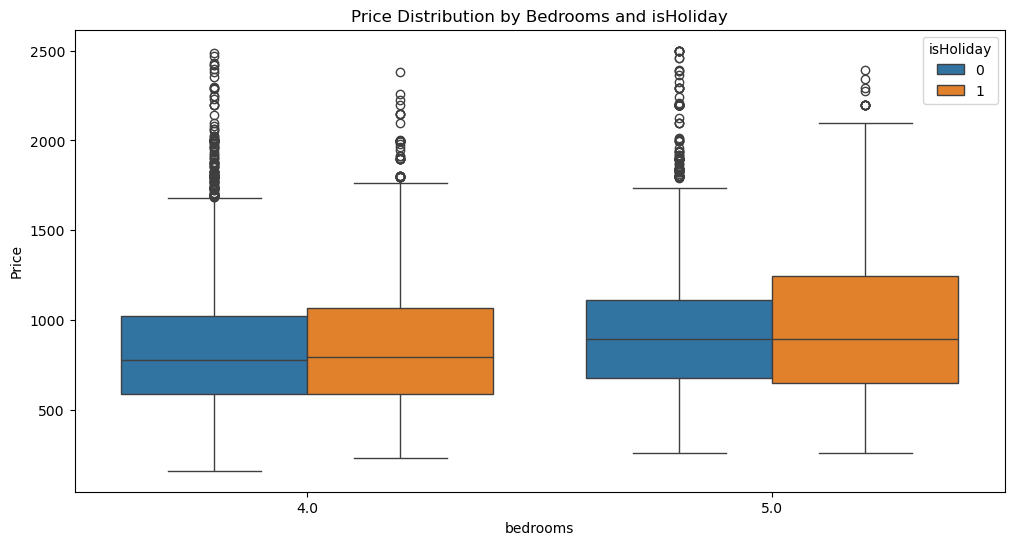


Mean Prices for isHoliday:
isHoliday           0           1
bedrooms                         
4.0        823.313084  879.605886
5.0        950.258440  988.145120

Price Difference (5 bed - 4 bed) for each isHoliday category:
isHoliday
0    126.945356
1    108.539234
dtype: float64


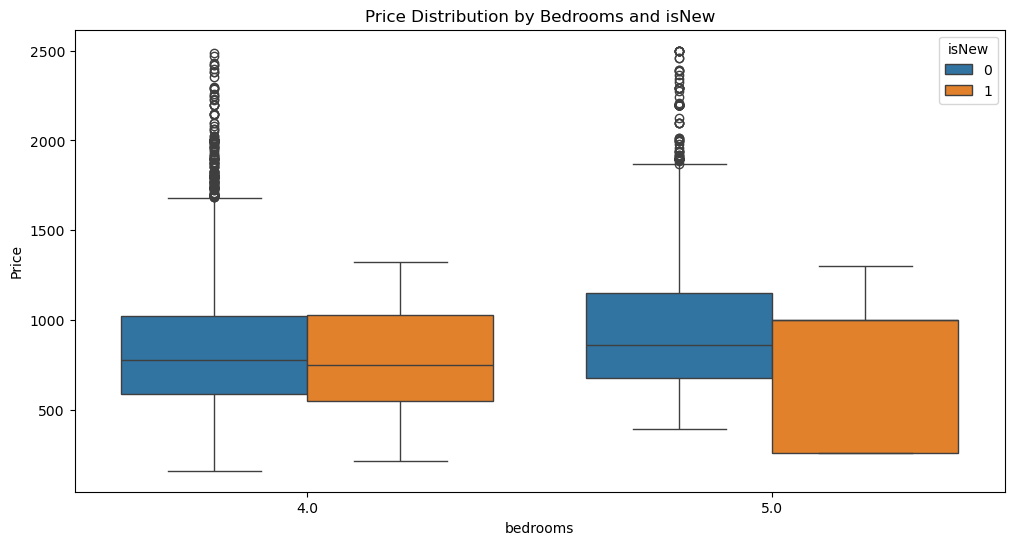


Mean Prices for isNew:
isNew              0           1
bedrooms                        
4.0       831.691063  796.313583
5.0       967.940247  812.910782

Price Difference (5 bed - 4 bed) for each isNew category:
isNew
0    136.249184
1     16.597198
dtype: float64


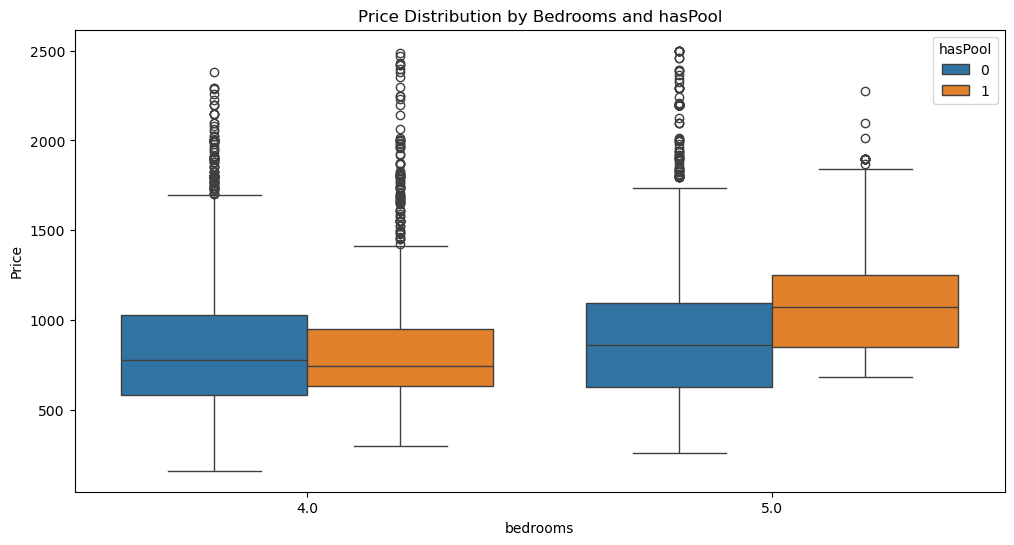


Mean Prices for hasPool:
hasPool            0            1
bedrooms                         
4.0       826.530801   856.408483
5.0       932.430859  1134.628549

Price Difference (5 bed - 4 bed) for each hasPool category:
hasPool
0    105.900058
1    278.220066
dtype: float64


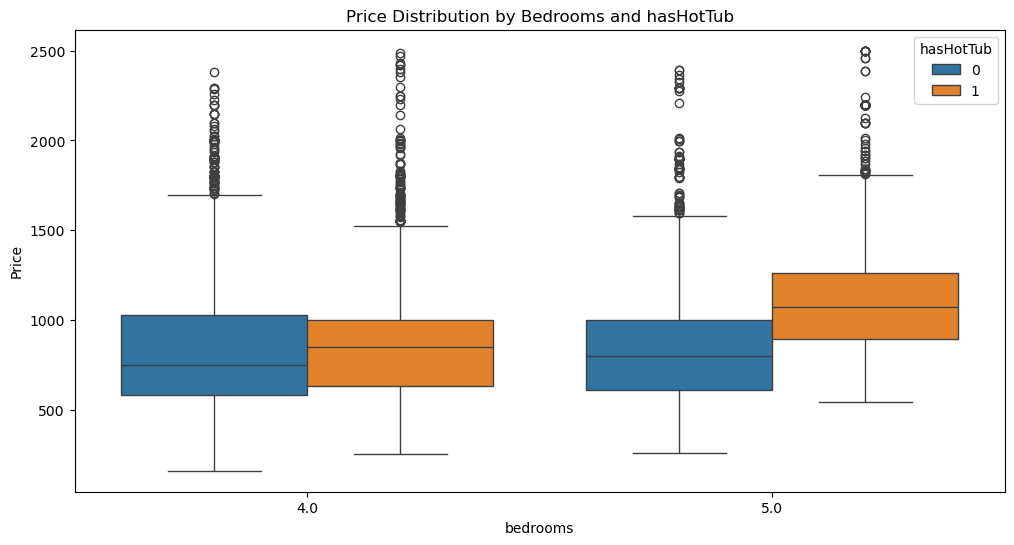


Mean Prices for hasHotTub:
hasHotTub           0            1
bedrooms                          
4.0        821.694246   875.495523
5.0        854.031139  1148.551813

Price Difference (5 bed - 4 bed) for each hasHotTub category:
hasHotTub
0     32.336893
1    273.056291
dtype: float64


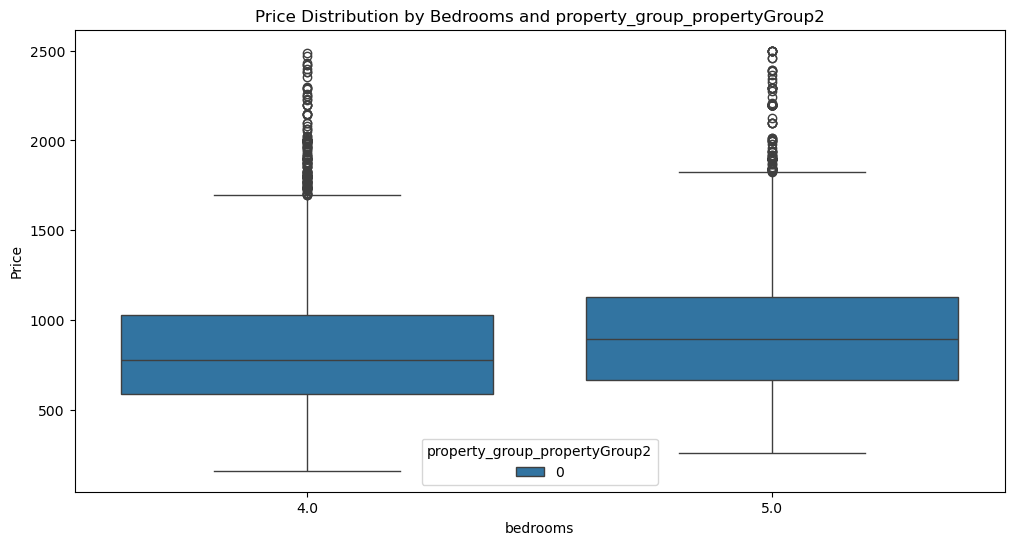


Mean Prices for property_group_propertyGroup2:
property_group_propertyGroup2           0
bedrooms                                 
4.0                            829.567840
5.0                            954.596257

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup2 category:
property_group_propertyGroup2
0    125.028417
dtype: float64


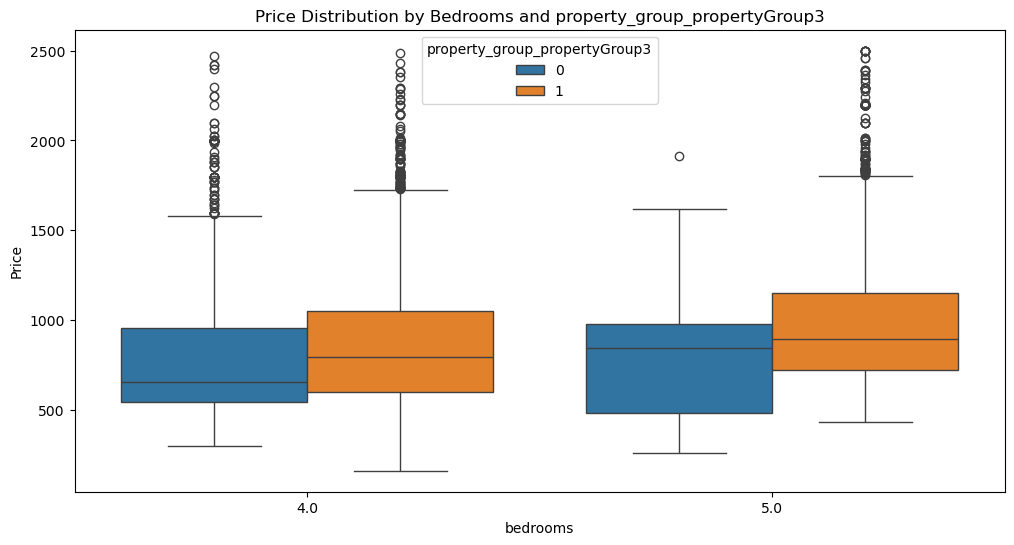


Mean Prices for property_group_propertyGroup3:
property_group_propertyGroup3           0           1
bedrooms                                             
4.0                            754.054179  848.071356
5.0                            771.717713  990.585475

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup3 category:
property_group_propertyGroup3
0     17.663534
1    142.514119
dtype: float64


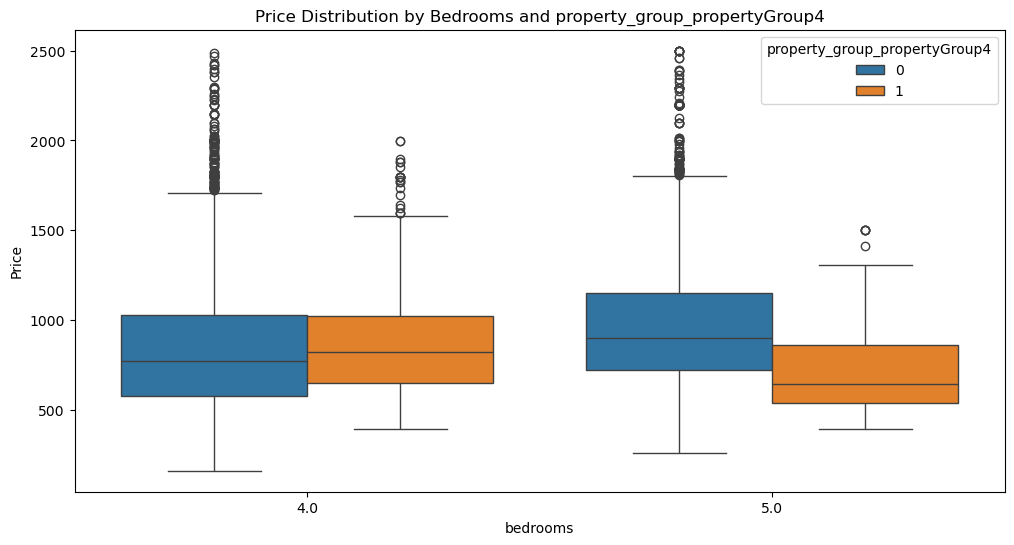


Mean Prices for property_group_propertyGroup4:
property_group_propertyGroup4           0           1
bedrooms                                             
4.0                            829.169542  834.080556
5.0                            980.156039  708.803705

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup4 category:
property_group_propertyGroup4
0    150.986497
1   -125.276851
dtype: float64


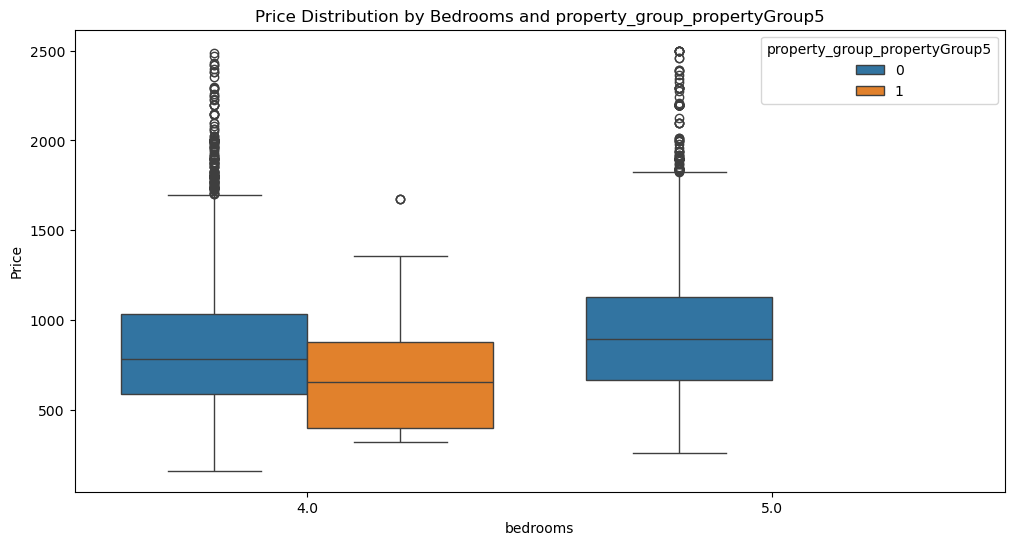


Mean Prices for property_group_propertyGroup5:
property_group_propertyGroup5           0           1
bedrooms                                             
4.0                            838.973345  681.785261
5.0                            954.596257         NaN

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup5 category:
property_group_propertyGroup5
0    115.622912
1           NaN
dtype: float64


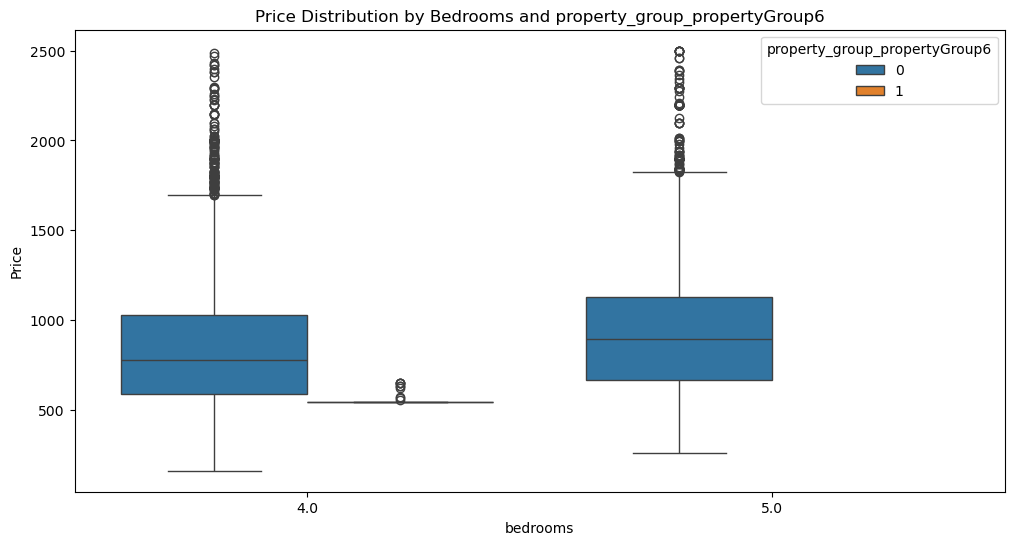


Mean Prices for property_group_propertyGroup6:
property_group_propertyGroup6           0           1
bedrooms                                             
4.0                            831.014557  554.217816
5.0                            954.596257         NaN

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup6 category:
property_group_propertyGroup6
0    123.581701
1           NaN
dtype: float64


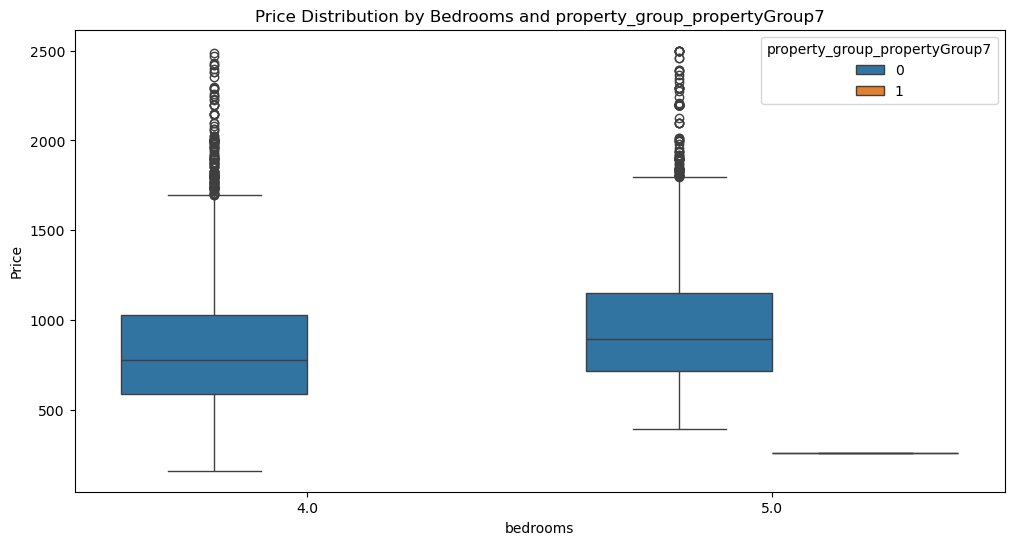


Mean Prices for property_group_propertyGroup7:
property_group_propertyGroup7           0      1
bedrooms                                        
4.0                            829.567840    NaN
5.0                            971.419785  257.0

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup7 category:
property_group_propertyGroup7
0    141.851944
1           NaN
dtype: float64


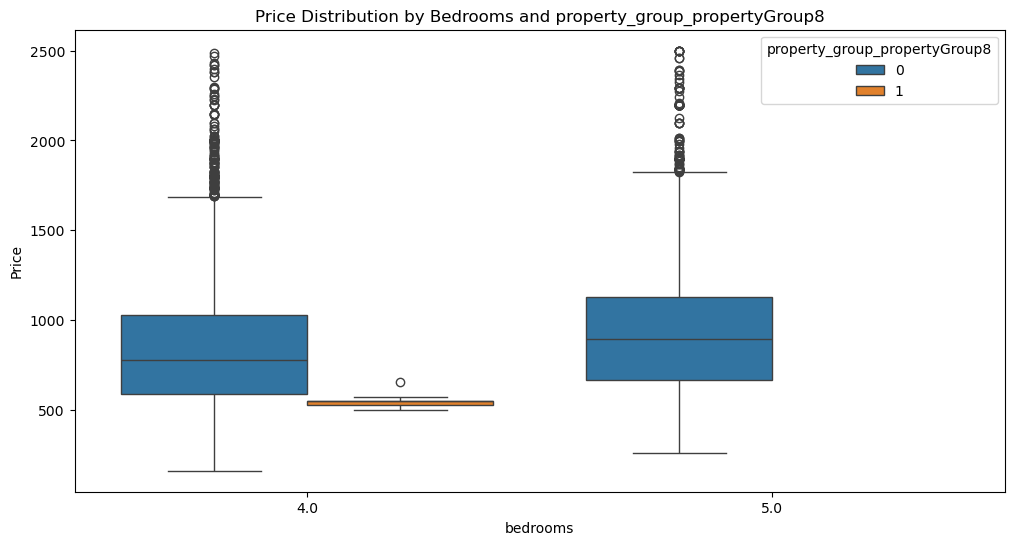


Mean Prices for property_group_propertyGroup8:
property_group_propertyGroup8           0           1
bedrooms                                             
4.0                            832.632508  539.454731
5.0                            954.596257         NaN

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup8 category:
property_group_propertyGroup8
0    121.963749
1           NaN
dtype: float64


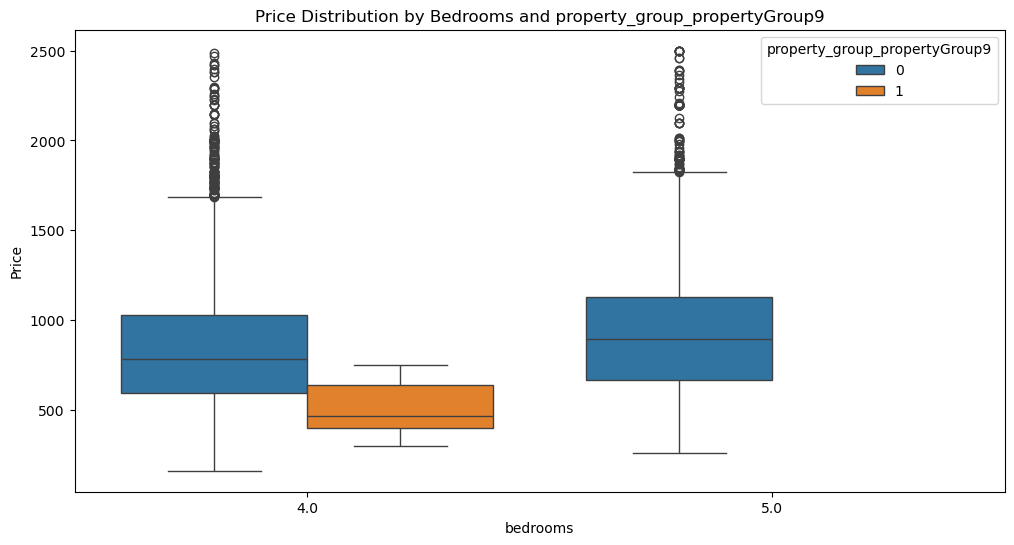


Mean Prices for property_group_propertyGroup9:
property_group_propertyGroup9           0           1
bedrooms                                             
4.0                            836.434292  507.998876
5.0                            954.596257         NaN

Price Difference (5 bed - 4 bed) for each property_group_propertyGroup9 category:
property_group_propertyGroup9
0    118.161965
1           NaN
dtype: float64


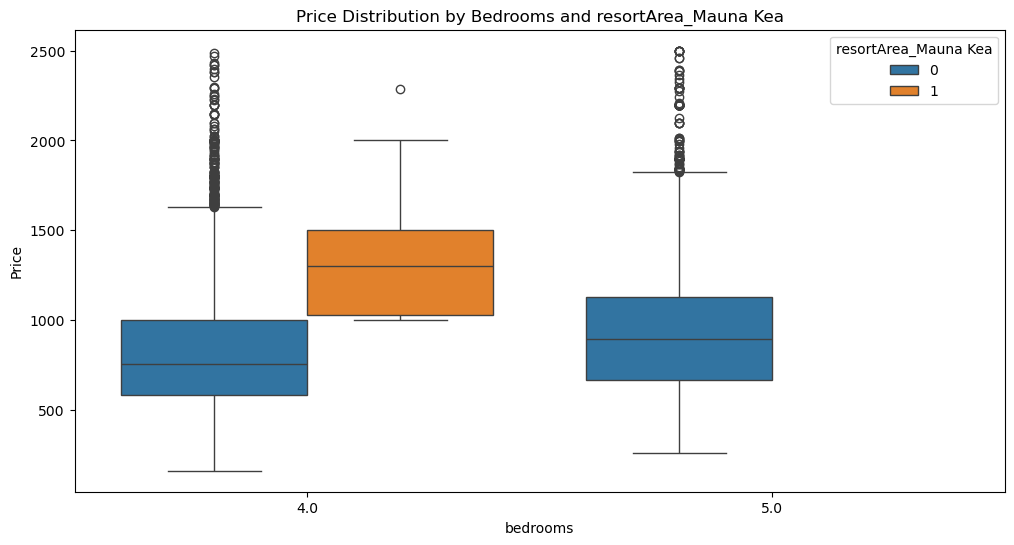


Mean Prices for resortArea_Mauna Kea:
resortArea_Mauna Kea           0            1
bedrooms                                     
4.0                   816.394883  1322.209095
5.0                   954.596257          NaN

Price Difference (5 bed - 4 bed) for each resortArea_Mauna Kea category:
resortArea_Mauna Kea
0    138.201375
1           NaN
dtype: float64


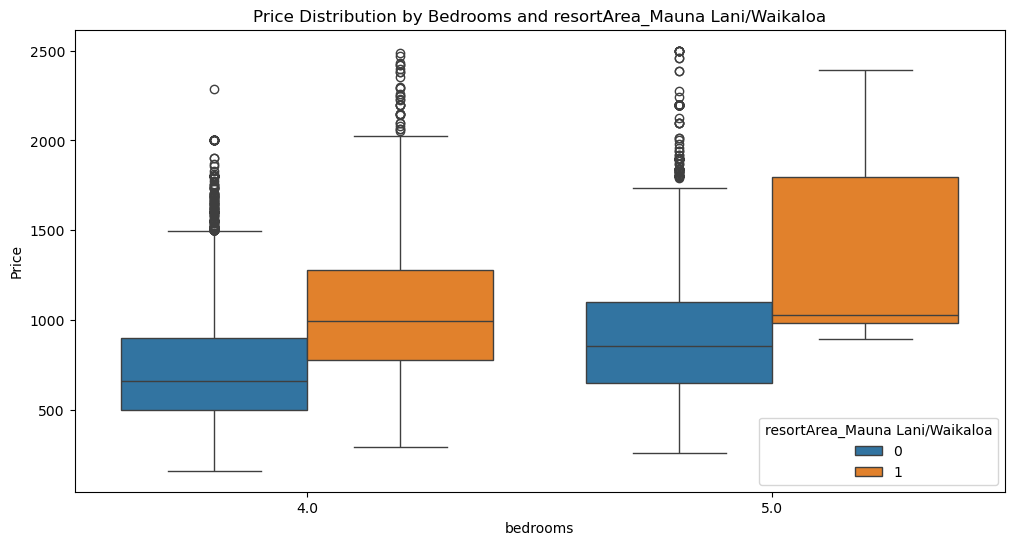


Mean Prices for resortArea_Mauna Lani/Waikaloa:
resortArea_Mauna Lani/Waikaloa           0            1
bedrooms                                               
4.0                             724.245409  1040.726054
5.0                             935.092506  1356.476190

Price Difference (5 bed - 4 bed) for each resortArea_Mauna Lani/Waikaloa category:
resortArea_Mauna Lani/Waikaloa
0    210.847097
1    315.750137
dtype: float64


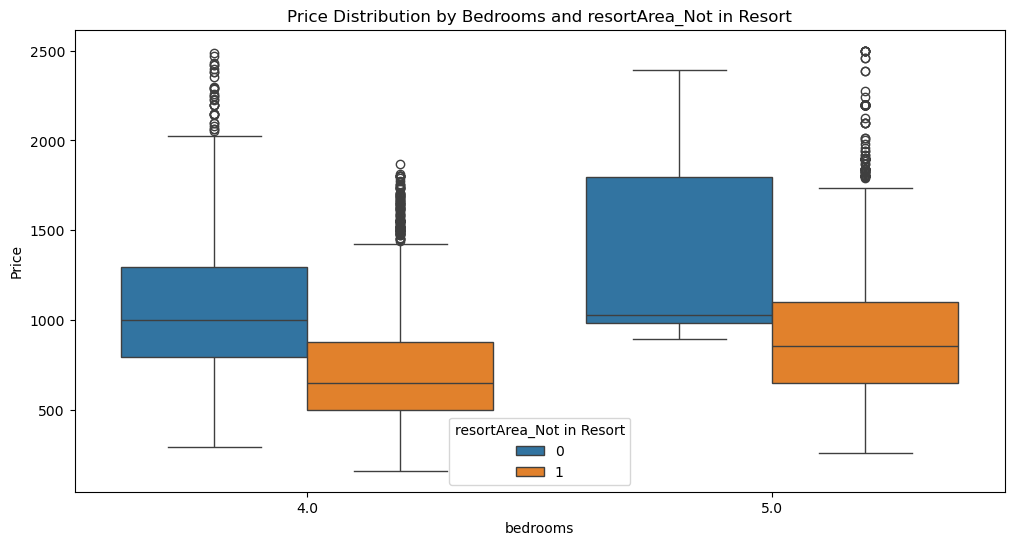


Mean Prices for resortArea_Not in Resort:
resortArea_Not in Resort            0           1
bedrooms                                         
4.0                       1061.155134  699.957073
5.0                       1356.476190  935.092506

Price Difference (5 bed - 4 bed) for each resortArea_Not in Resort category:
resortArea_Not in Resort
0    295.321056
1    235.135433
dtype: float64


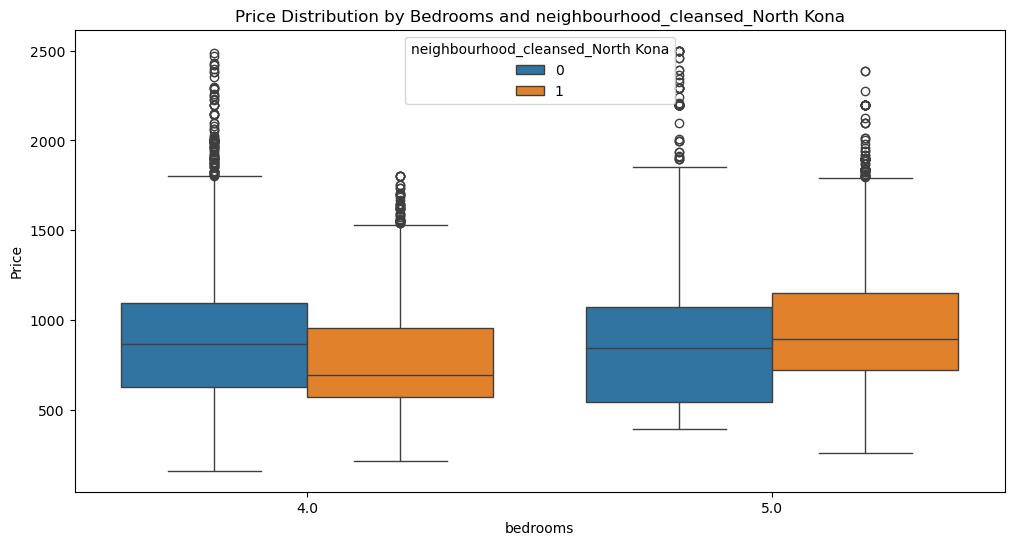


Mean Prices for neighbourhood_cleansed_North Kona:
neighbourhood_cleansed_North Kona           0           1
bedrooms                                                 
4.0                                892.298660  755.481855
5.0                                985.290327  943.660650

Price Difference (5 bed - 4 bed) for each neighbourhood_cleansed_North Kona category:
neighbourhood_cleansed_North Kona
0     92.991668
1    188.178795
dtype: float64


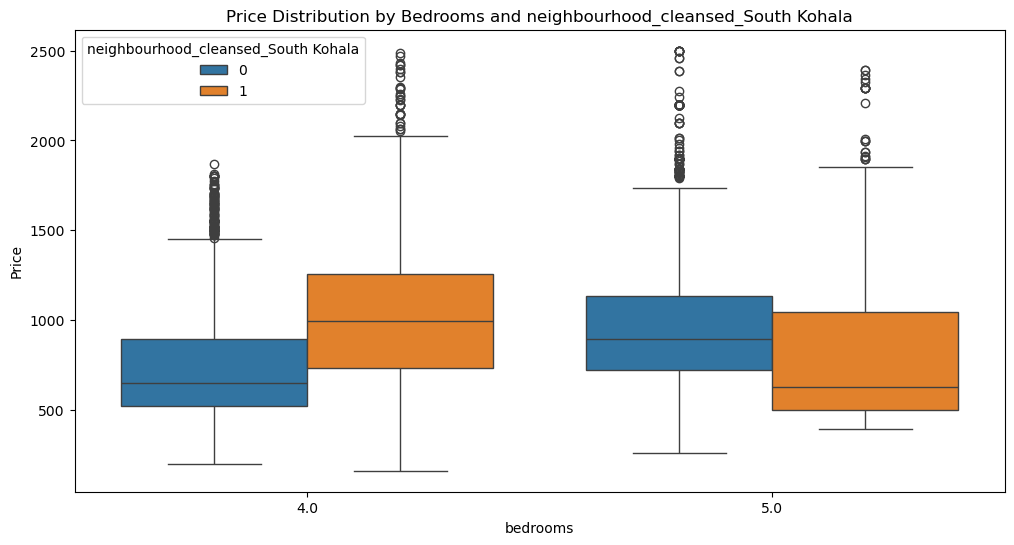


Mean Prices for neighbourhood_cleansed_South Kohala:
neighbourhood_cleansed_South Kohala          0           1
bedrooms                                                  
4.0                                  715.47602  994.839861
5.0                                  962.28562  901.192392

Price Difference (5 bed - 4 bed) for each neighbourhood_cleansed_South Kohala category:
neighbourhood_cleansed_South Kohala
0    246.809600
1    -93.647469
dtype: float64


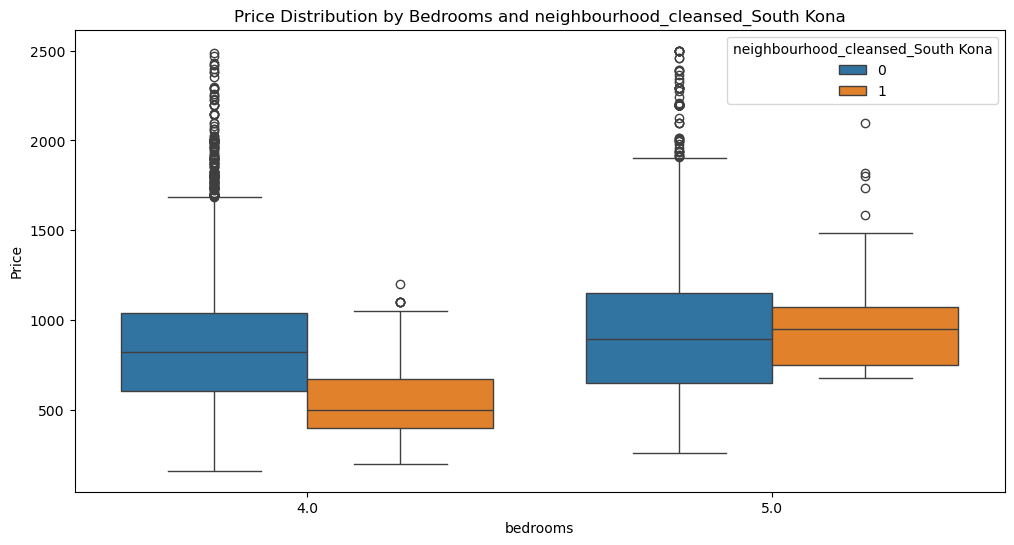


Mean Prices for neighbourhood_cleansed_South Kona:
neighbourhood_cleansed_South Kona           0           1
bedrooms                                                 
4.0                                860.589589  542.135989
5.0                                954.846151  949.540230

Price Difference (5 bed - 4 bed) for each neighbourhood_cleansed_South Kona category:
neighbourhood_cleansed_South Kona
0     94.256562
1    407.404241
dtype: float64


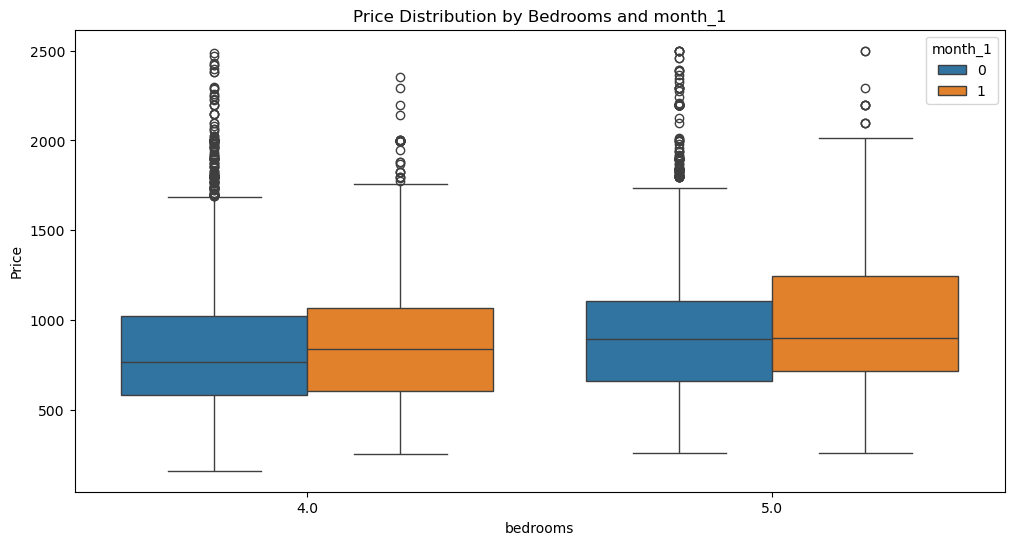


Mean Prices for month_1:
month_1            0           1
bedrooms                        
4.0       823.758297  882.958022
5.0       950.527608  990.452248

Price Difference (5 bed - 4 bed) for each month_1 category:
month_1
0    126.769310
1    107.494226
dtype: float64


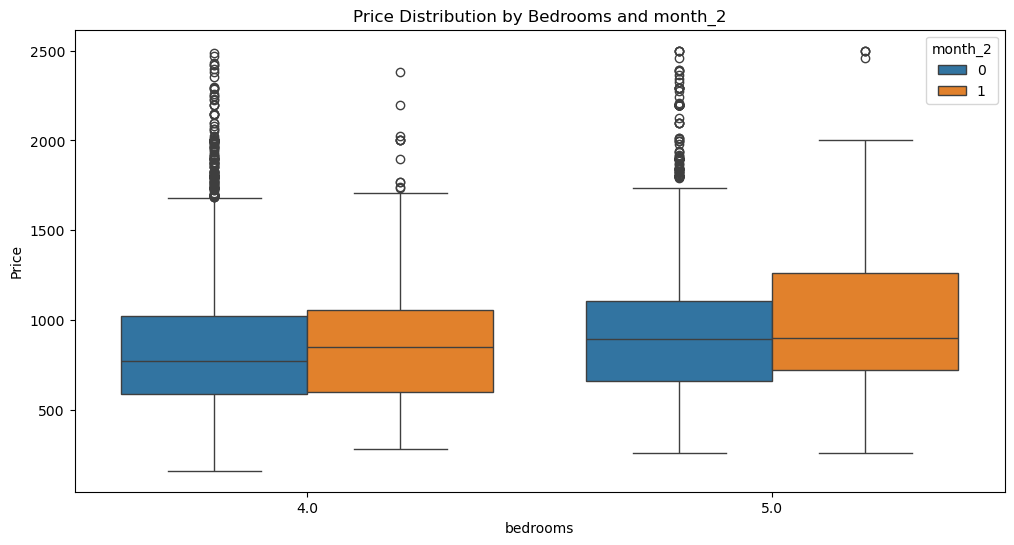


Mean Prices for month_2:
month_2            0            1
bedrooms                         
4.0       826.982305   865.288957
5.0       949.946885  1017.706678

Price Difference (5 bed - 4 bed) for each month_2 category:
month_2
0    122.964580
1    152.417721
dtype: float64


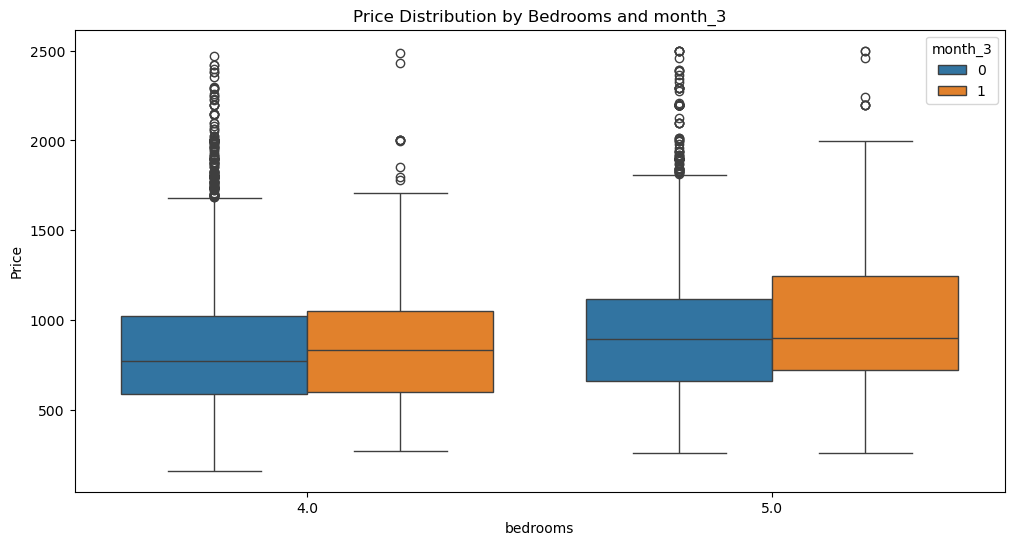


Mean Prices for month_3:
month_3            0            1
bedrooms                         
4.0       827.060163   864.015936
5.0       951.100951  1002.041420

Price Difference (5 bed - 4 bed) for each month_3 category:
month_3
0    124.040789
1    138.025484
dtype: float64


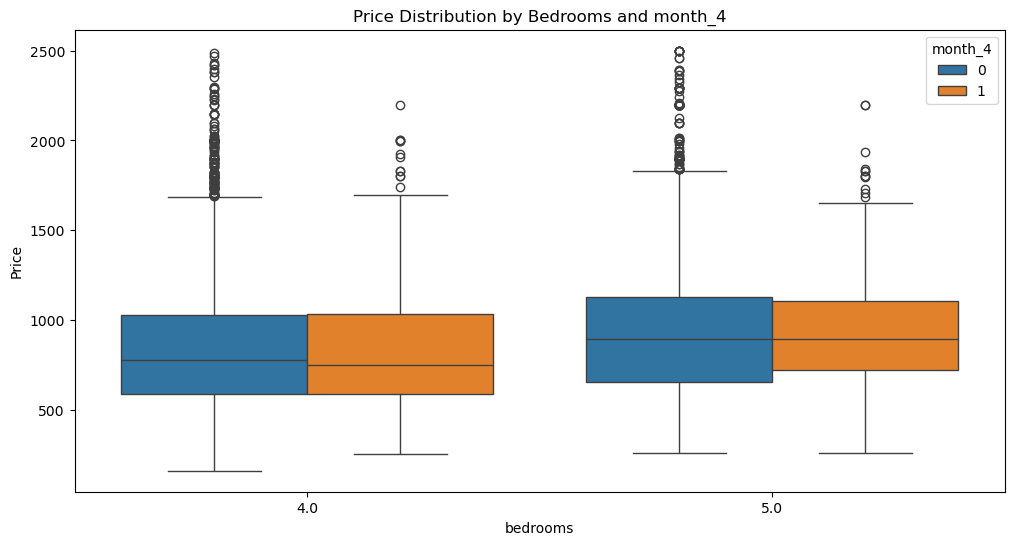


Mean Prices for month_4:
month_4            0           1
bedrooms                        
4.0       830.259025  822.448356
5.0       957.789525  920.514557

Price Difference (5 bed - 4 bed) for each month_4 category:
month_4
0    127.5305
1     98.0662
dtype: float64


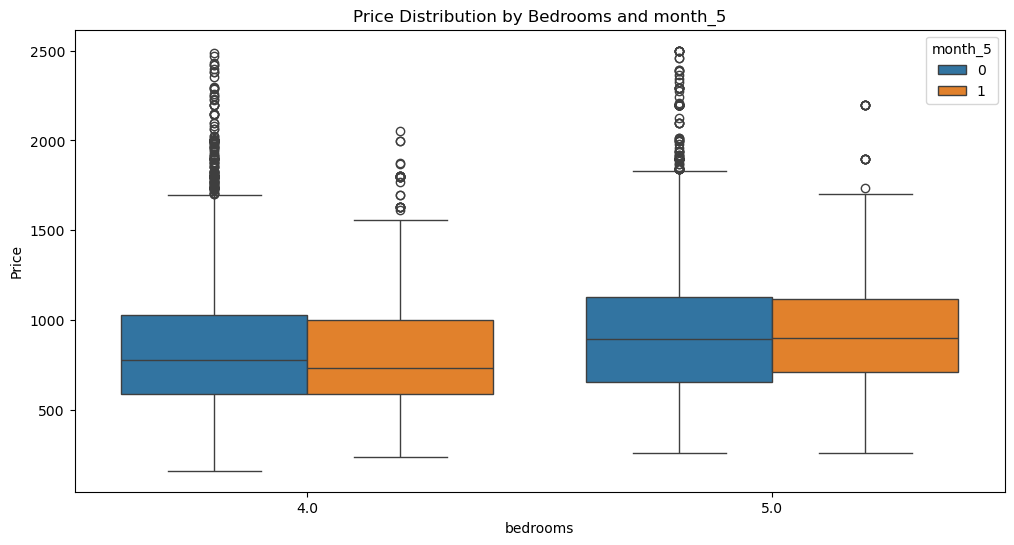


Mean Prices for month_5:
month_5            0           1
bedrooms                        
4.0       832.602327  804.281297
5.0       955.839347  943.832568

Price Difference (5 bed - 4 bed) for each month_5 category:
month_5
0    123.237019
1    139.551271
dtype: float64


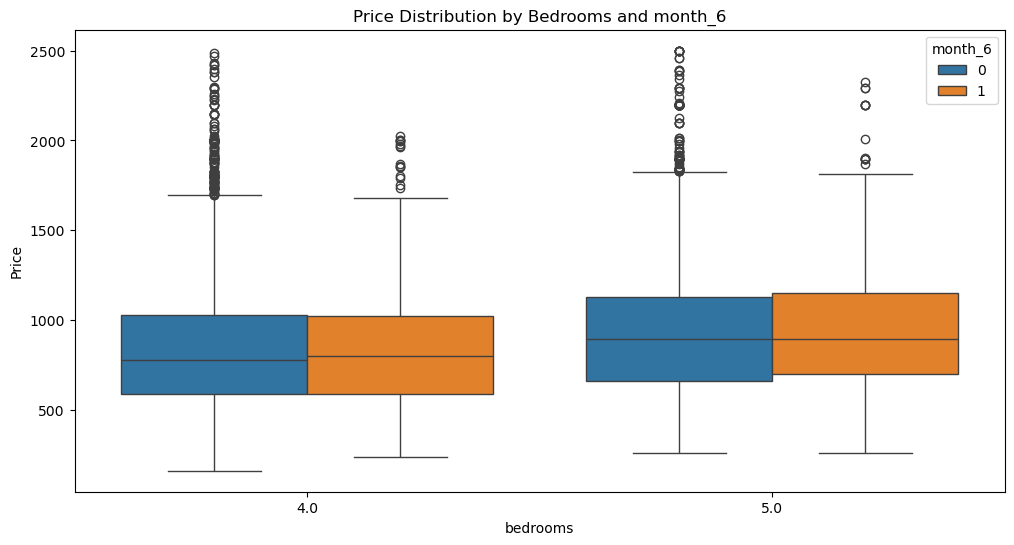


Mean Prices for month_6:
month_6            0           1
bedrooms                        
4.0       828.454796  844.330701
5.0       953.441410  970.173109

Price Difference (5 bed - 4 bed) for each month_6 category:
month_6
0    124.986614
1    125.842408
dtype: float64


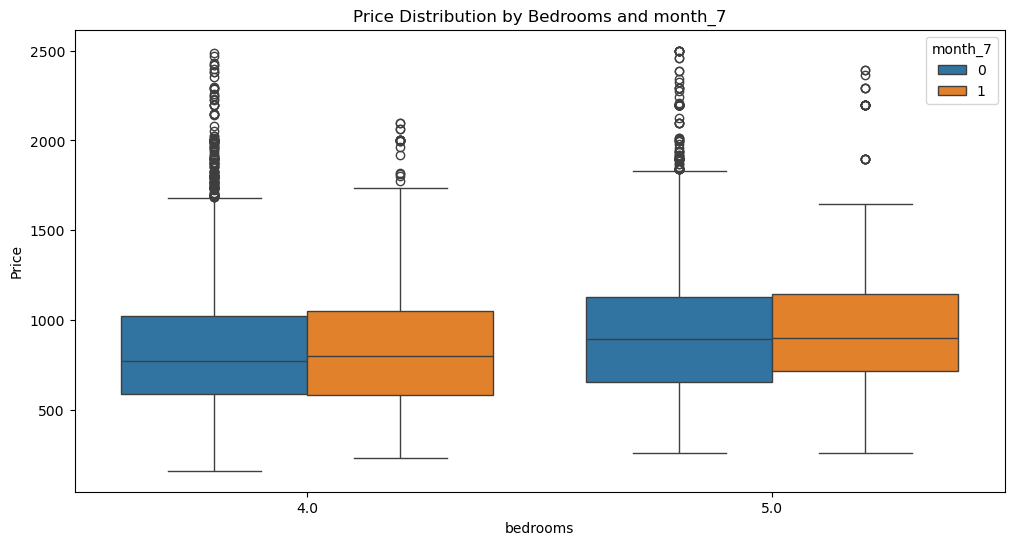


Mean Prices for month_7:
month_7            0           1
bedrooms                        
4.0       827.020556  851.388842
5.0       950.979933  986.466022

Price Difference (5 bed - 4 bed) for each month_7 category:
month_7
0    123.959376
1    135.077179
dtype: float64


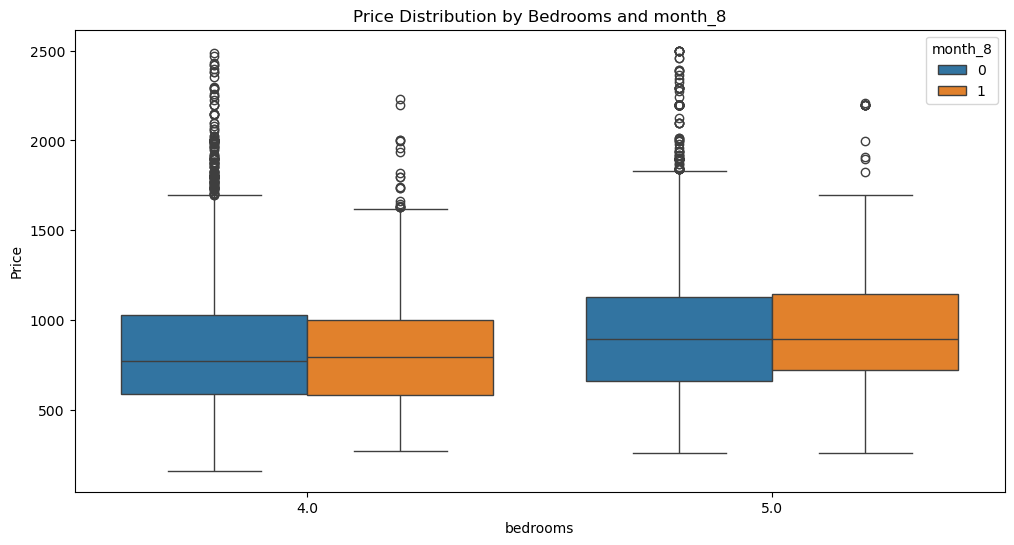


Mean Prices for month_8:
month_8            0           1
bedrooms                        
4.0       829.744062  827.224043
5.0       953.101120  974.763025

Price Difference (5 bed - 4 bed) for each month_8 category:
month_8
0    123.357058
1    147.538983
dtype: float64


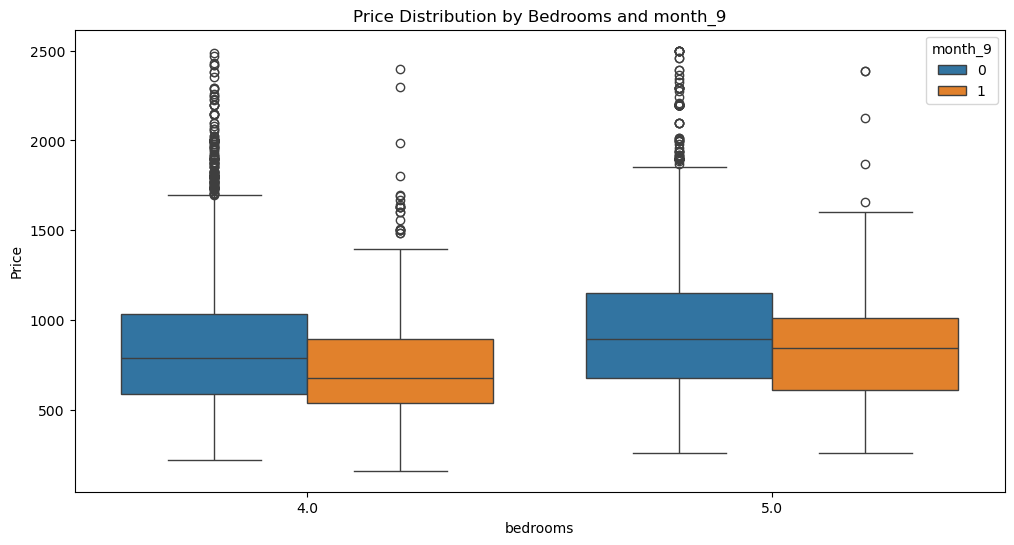


Mean Prices for month_9:
month_9            0           1
bedrooms                        
4.0       837.545403  727.300058
5.0       961.306990  865.210860

Price Difference (5 bed - 4 bed) for each month_9 category:
month_9
0    123.761587
1    137.910802
dtype: float64


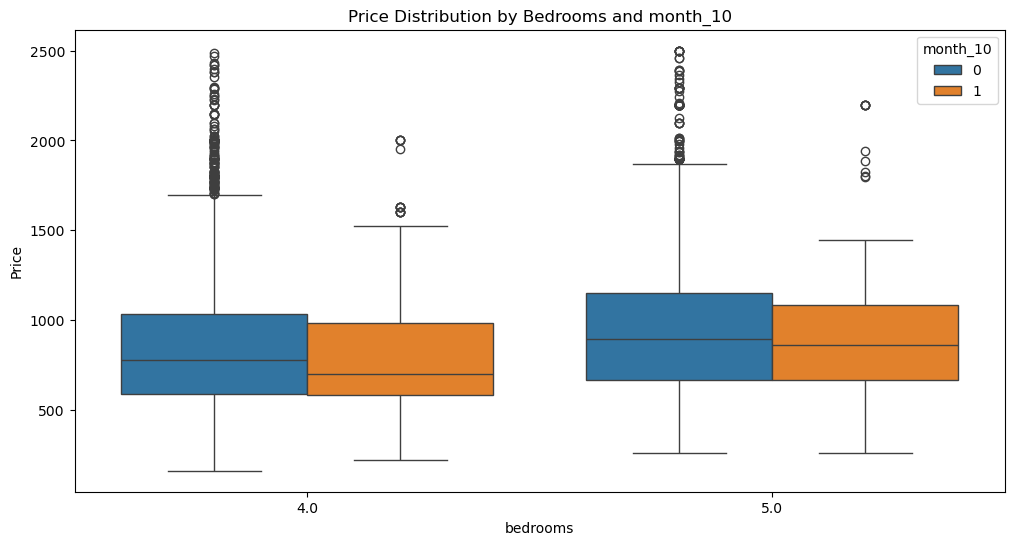


Mean Prices for month_10:
month_10           0           1
bedrooms                        
4.0       835.406487  769.828080
5.0       959.284505  908.415985

Price Difference (5 bed - 4 bed) for each month_10 category:
month_10
0    123.878018
1    138.587905
dtype: float64


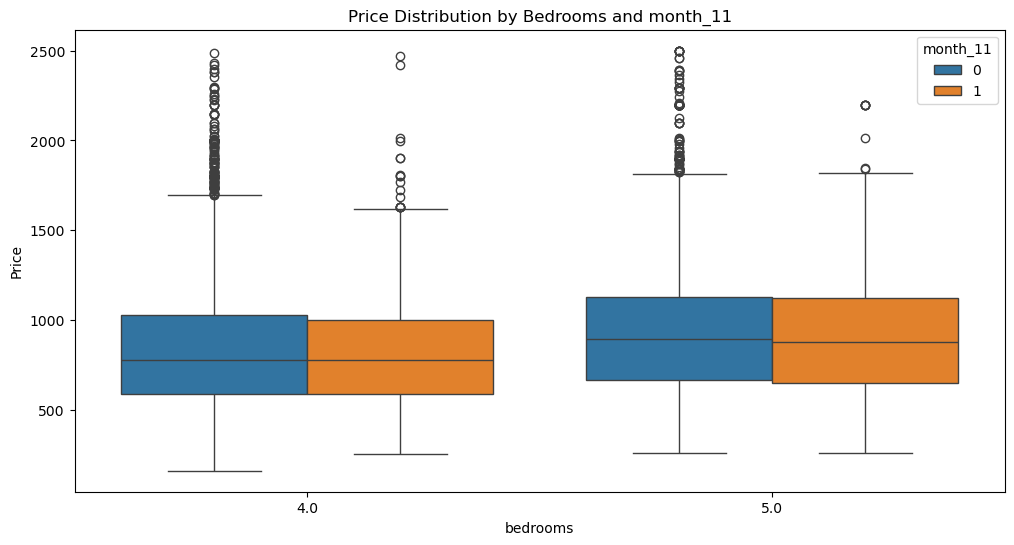


Mean Prices for month_11:
month_11           0           1
bedrooms                        
4.0       831.539293  808.510652
5.0       955.943550  940.928248

Price Difference (5 bed - 4 bed) for each month_11 category:
month_11
0    124.404257
1    132.417597
dtype: float64


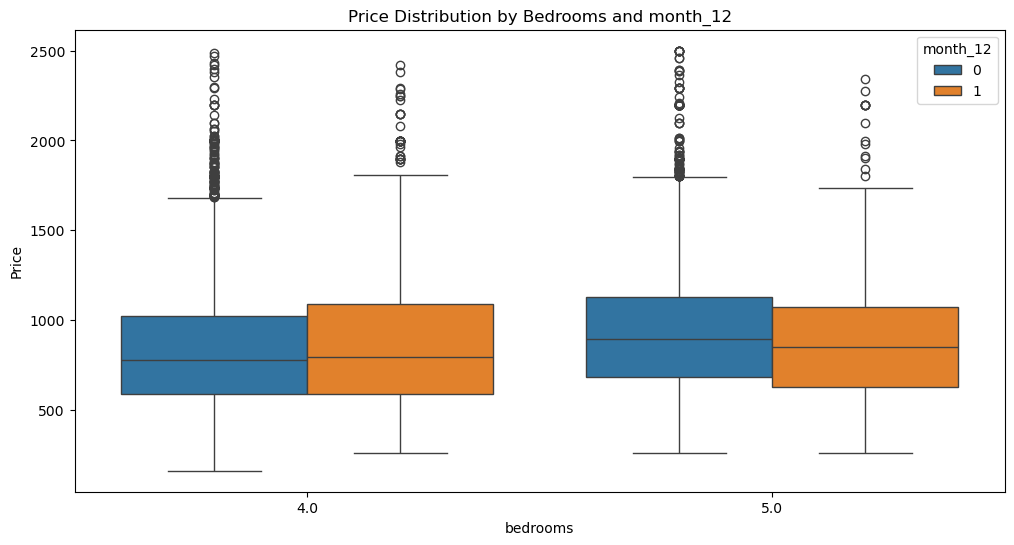


Mean Prices for month_12:
month_12           0           1
bedrooms                        
4.0       824.440136  889.101650
5.0       955.896193  939.643703

Price Difference (5 bed - 4 bed) for each month_12 category:
month_12
0    131.456057
1     50.542053
dtype: float64


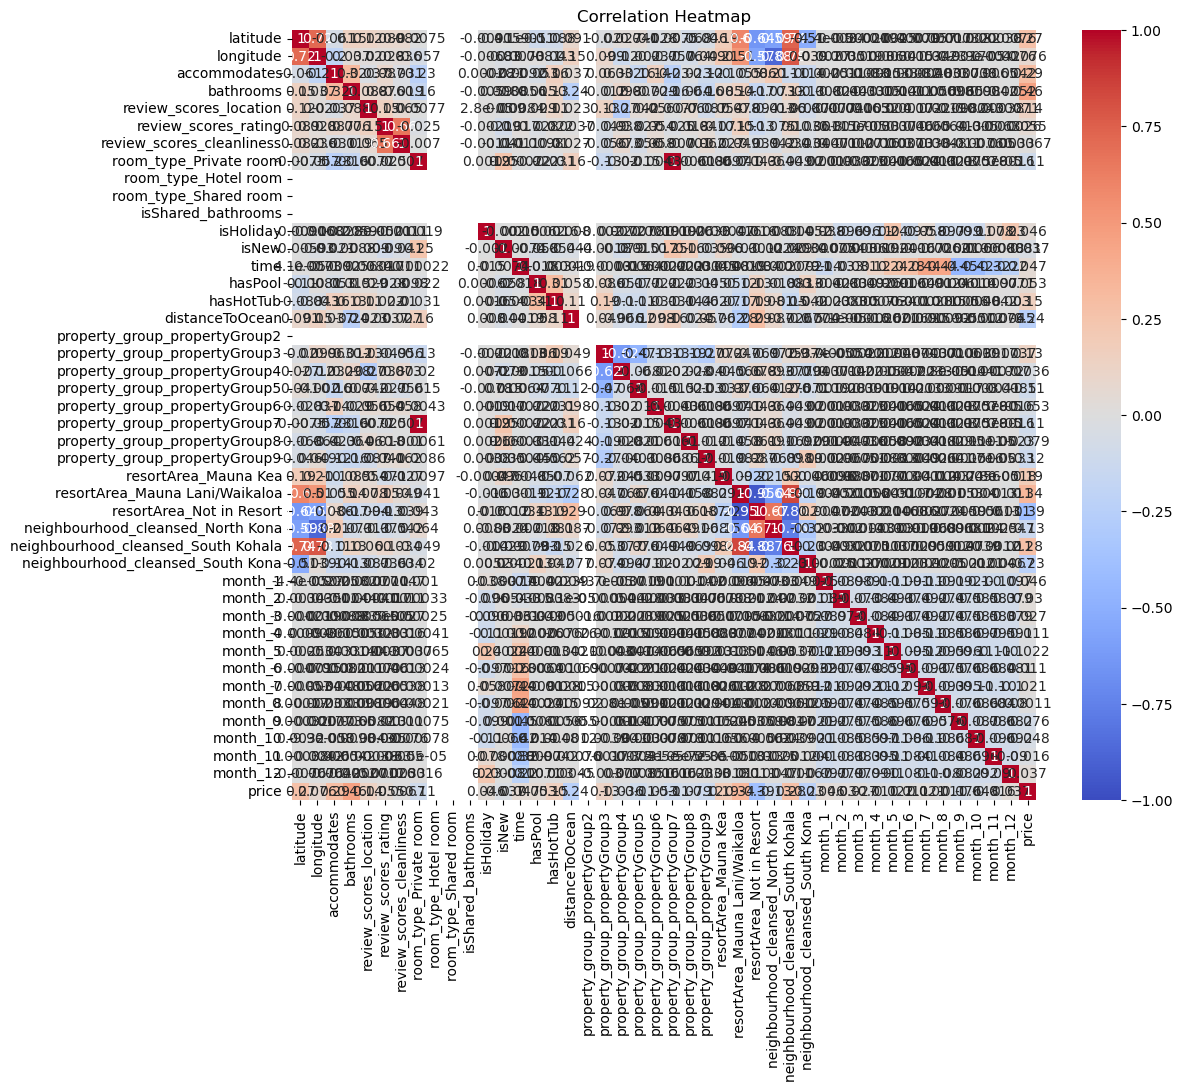

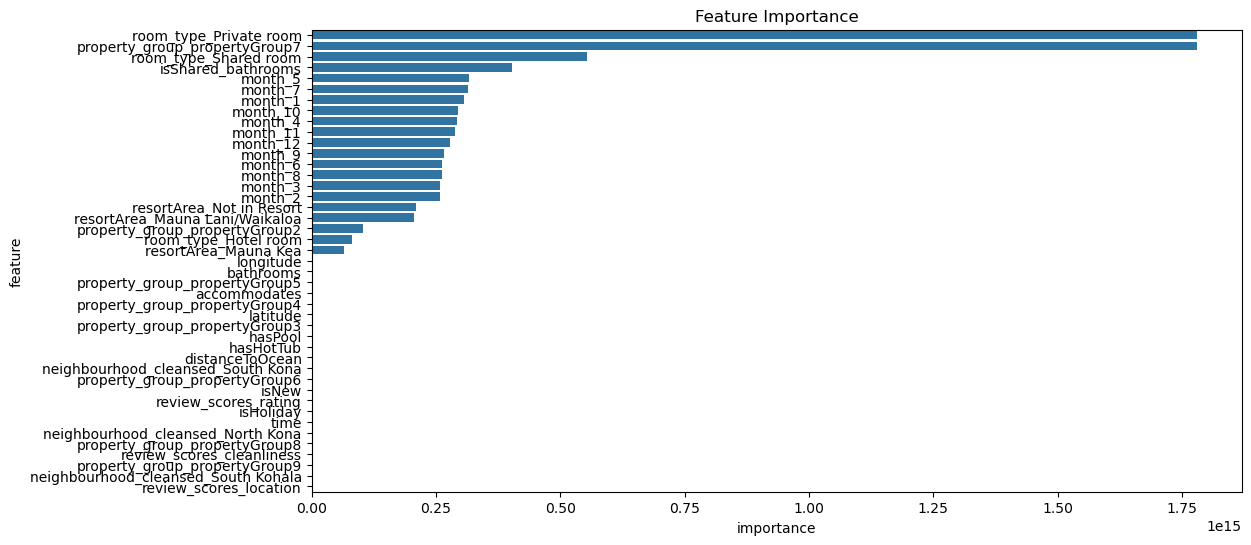


Top 10 Most Important Features:
                          feature    importance
7          room_type_Private room  1.780677e+15
22  property_group_propertyGroup7  1.780677e+15
9           room_type_Shared room  5.545227e+14
10             isShared_bathrooms  4.037734e+14
35                        month_5  3.174377e+14
37                        month_7  3.142165e+14
31                        month_1  3.071024e+14
40                       month_10  2.939199e+14
34                        month_4  2.915061e+14
41                       month_11  2.890626e+14


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original DataFrame and it has a 'price' column

# Filter for 4 and 5 bedroom listings
df_45 = df[df['bedrooms'].isin([4, 5])]

# Use the existing 'features' variable for analysis
# Ensure 'price' and 'bedrooms' are not included in 'features'
features_to_analyze = [feature for feature in features if feature not in ['price', 'bedrooms', 'listing_id']]

# Function to analyze and plot feature interactions
def analyze_feature_interaction(feature):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='bedrooms', y='price', hue=feature, data=df_45)
    plt.title(f'Price Distribution by Bedrooms and {feature}')
    plt.ylabel('Price')
    plt.show()
    
    # Calculate mean price for each combination
    mean_prices = df_45.groupby(['bedrooms', feature])['price'].mean().unstack()
    print(f"\nMean Prices for {feature}:")
    print(mean_prices)
    
    # Calculate price difference between 4 and 5 bedrooms for each category
    price_diff = mean_prices.loc[5] - mean_prices.loc[4]
    print(f"\nPrice Difference (5 bed - 4 bed) for each {feature} category:")
    print(price_diff)

# Analyze interactions for each feature in the 'features' list
for feature in features_to_analyze:
    if df_45[feature].nunique() < 10:  # Only for features with less than 10 unique values
        analyze_feature_interaction(feature)

# Correlation analysis
correlation_matrix = df_45[features_to_analyze + ['price']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Feature importance (using a simple linear regression)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_45[features_to_analyze]
y = df_45['price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression
model = LinearRegression()
model.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': features_to_analyze,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


# addedAmenityFeatures.csv is a csv that contains other features that were not used in the model

In [21]:
added_features_df=pd.read_csv('addedAmenityFeatures.csv')

In [22]:
added_columns=['elevation',
    "availability_365",
    "IsOcean_view",
    "IsPrivate_patio_or_balcony",
    "IsMountain_view",
    "IsBeach_access",
    "IsGolf_course_view",
    "IsBay_view",
    "IsSea_view",
    "IsResort_access",
    "IsResort_view",
    "IsHarbor_view",
    "IsValley_view",
    "IsLake_access",
    "Issea_view",
    "IsHarbor_View",
    "IsBeach_access_–_Beachfront",
    "IsFree_beach_club",
    "IsPrivate_beach_access_–_Beachfront",
    "IsPrivate_beach_access",
    "IsMarina_view",
    "IsFree_resort_access",
    "IsGolf_course_access",
    "IsBeach_access___Beachfront",
    "IsPrivate_beach_access___Beachfront"
]
D={}
for item in added_columns:
    D[item]='first'

added_features_df=added_features_df.groupby('listing_id').agg(D)

In [24]:
joined=pd.merge(df,added_features_df,on='listing_id',how='inner')

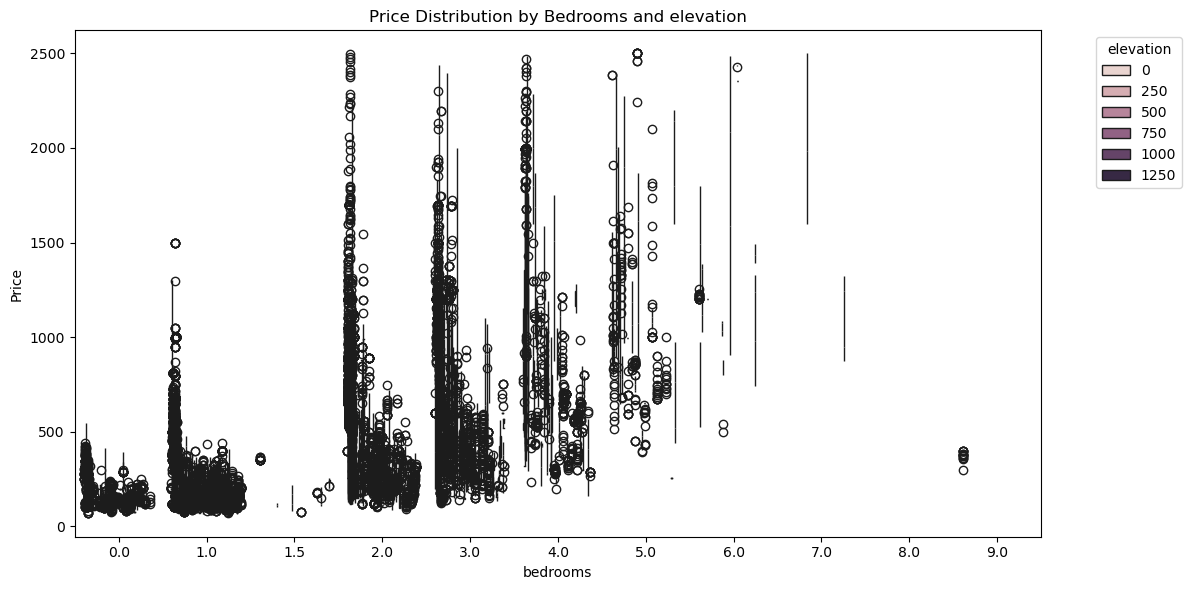


Mean Prices for elevation:
elevation     -3.0         -2.0     -1.0         0.0         1.0     \
bedrooms                                                              
0.0               NaN          NaN      NaN  153.831759         NaN   
1.0        200.089245   122.361915      NaN  232.802926  255.000000   
1.5               NaN          NaN      NaN         NaN         NaN   
2.0               NaN   379.713362    255.0  363.845765         NaN   
3.0               NaN  1121.046003      NaN  919.107087         NaN   
4.0               NaN          NaN      NaN  761.053649  731.043534   
5.0               NaN          NaN      NaN         NaN         NaN   
6.0               NaN          NaN      NaN         NaN         NaN   
7.0               NaN          NaN      NaN         NaN         NaN   
8.0               NaN          NaN      NaN         NaN         NaN   
9.0               NaN          NaN      NaN         NaN         NaN   

elevation       2.0         3.0          4.0    

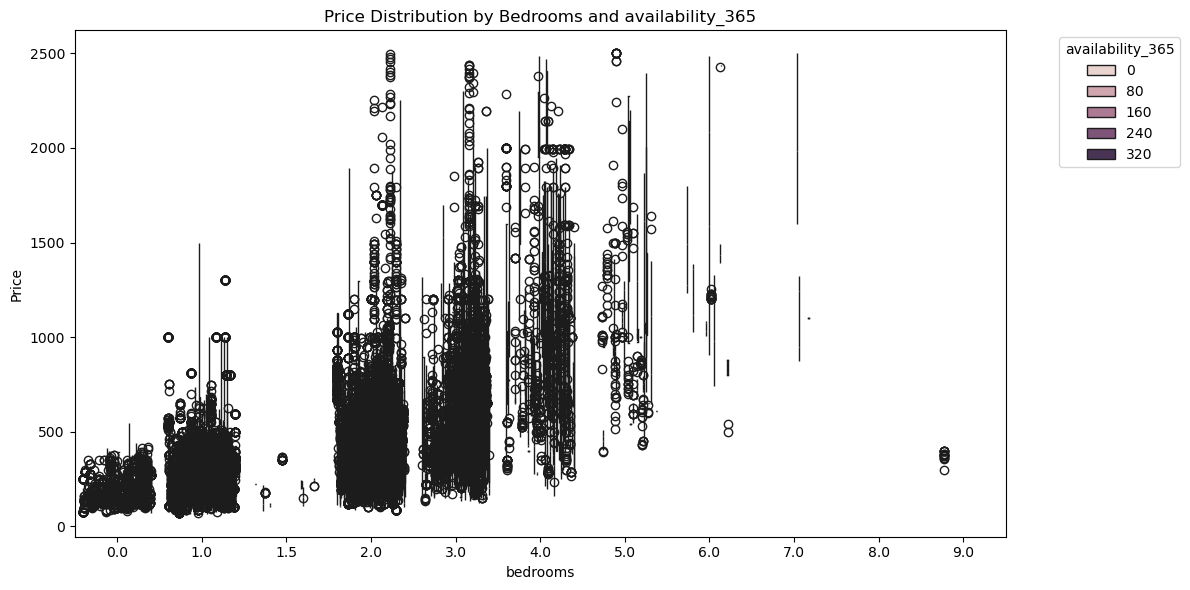


Mean Prices for availability_365:
availability_365         0           1           2           3           4    \
bedrooms                                                                       
0.0               161.097783   95.250575  155.000000  136.533498  168.822674   
1.0               227.914056  180.000000  157.716287  299.310037  379.948892   
1.5                      NaN         NaN         NaN         NaN         NaN   
2.0               319.777919  242.224138  550.273810  485.000000  308.068776   
3.0               667.937591  325.003448         NaN         NaN         NaN   
4.0               933.297841  548.187192         NaN         NaN  325.554187   
5.0                      NaN         NaN         NaN         NaN         NaN   
6.0               972.000000         NaN         NaN         NaN         NaN   
7.0                      NaN         NaN         NaN         NaN         NaN   
8.0                      NaN         NaN         NaN         NaN         NaN   
9.0  

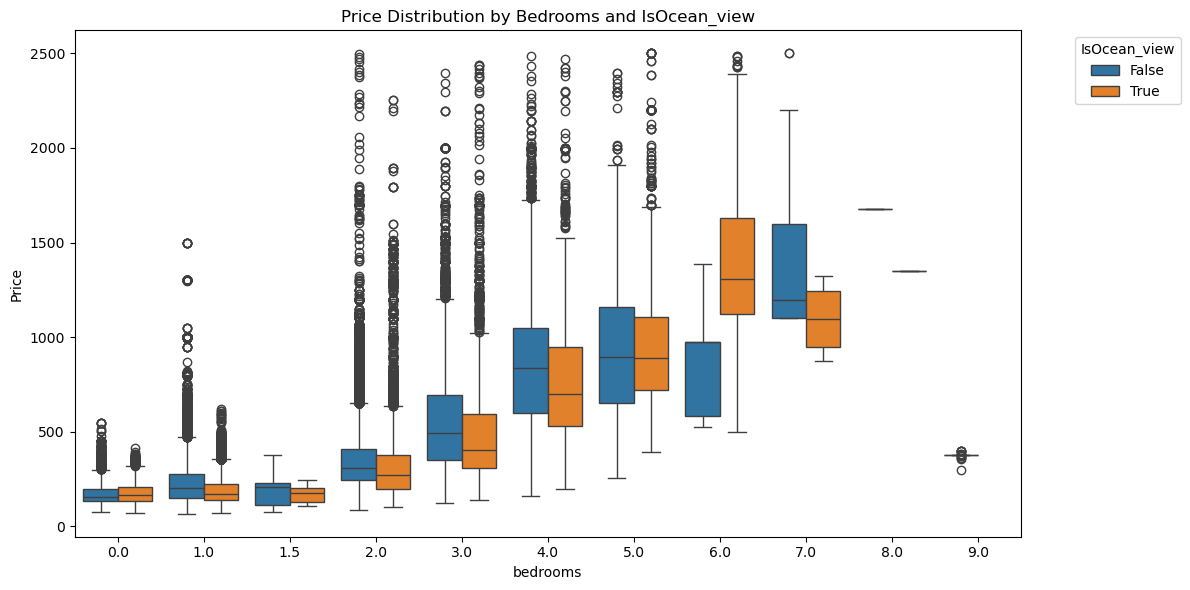


Mean Prices for IsOcean_view:
IsOcean_view        False        True 
bedrooms                              
0.0            174.227996   181.316469
1.0            230.845549   190.347142
1.5            192.912481   174.540483
2.0            347.192279   319.507391
3.0            559.965176   481.836199
4.0            868.278123   761.659110
5.0            942.852760   966.406697
6.0            835.705518  1451.972417
7.0           1319.113570  1096.959184
8.0           1675.000000  1350.000000
9.0            377.724754          NaN


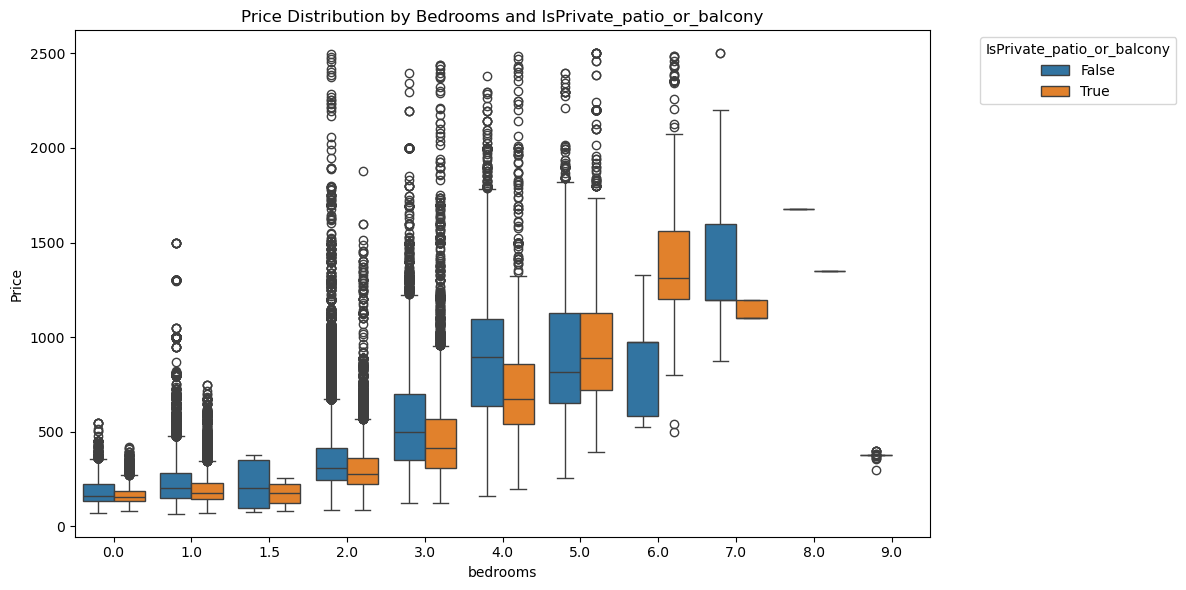


Mean Prices for IsPrivate_patio_or_balcony:
IsPrivate_patio_or_balcony        False        True 
bedrooms                                            
0.0                          182.521634   167.598130
1.0                          231.033420   197.760563
1.5                          207.975615   178.470305
2.0                          352.335624   309.767156
3.0                          568.935290   471.348928
4.0                          896.313070   715.749487
5.0                          928.620584   988.920381
6.0                          791.717851  1449.072738
7.0                         1448.348819  1139.206186
8.0                         1675.000000  1350.000000
9.0                          377.724754          NaN


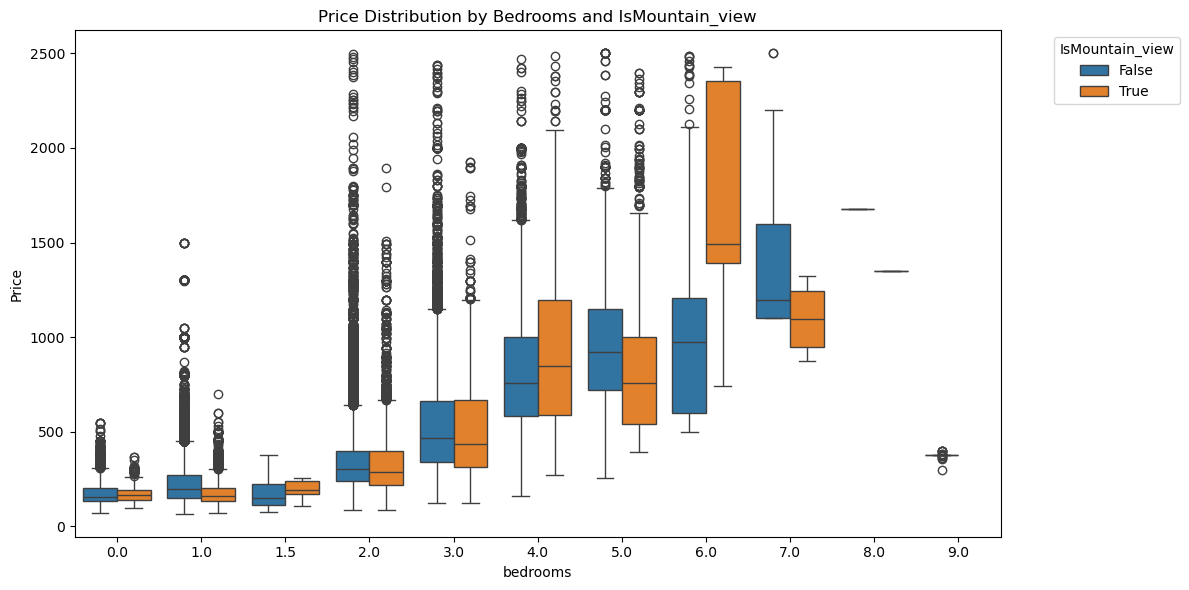


Mean Prices for IsMountain_view:
IsMountain_view        False        True 
bedrooms                                 
0.0               176.254113   170.930162
1.0               224.801440   178.618357
1.5               184.761112   191.536212
2.0               342.894810   341.265577
3.0               542.992652   515.129009
4.0               811.090804   892.812474
5.0               966.325888   918.573689
6.0              1012.211494  1726.570079
7.0              1319.113570  1096.959184
8.0              1675.000000  1350.000000
9.0               377.724754          NaN


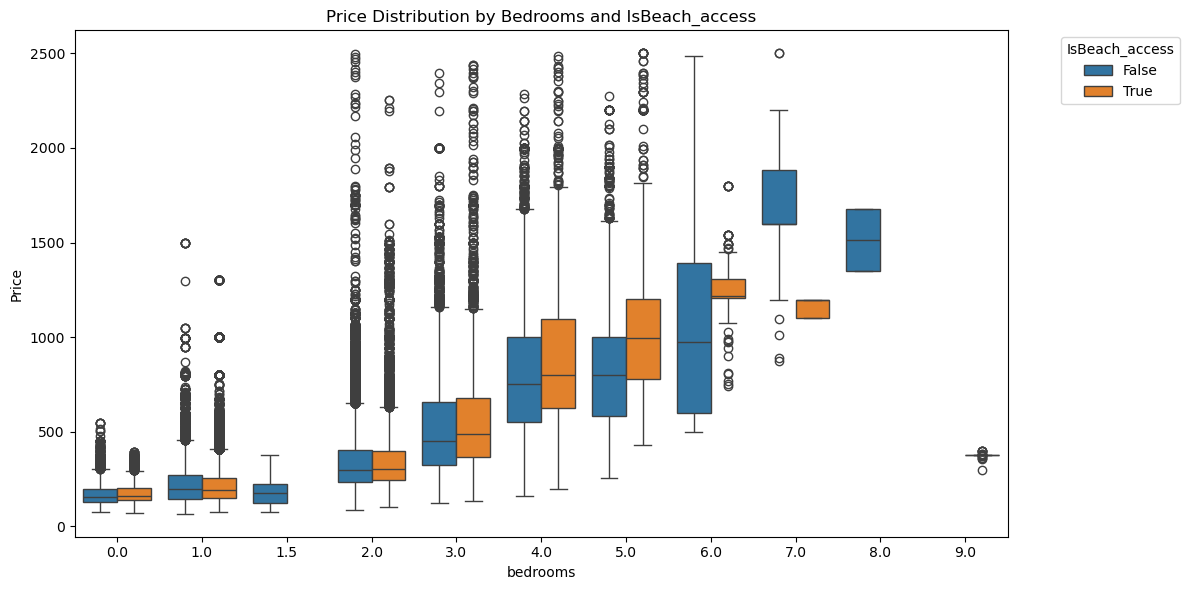


Mean Prices for IsBeach_access:
IsBeach_access        False        True 
bedrooms                                
0.0              176.236133   175.283055
1.0              218.115287   229.784086
1.5              187.447989          NaN
2.0              341.481836   347.258617
3.0              536.806916   547.765786
4.0              813.346867   868.377175
5.0              869.603346  1063.614042
6.0             1120.952864  1260.432071
7.0             1670.844689  1161.580645
8.0             1512.500000          NaN
9.0                     NaN   377.724754


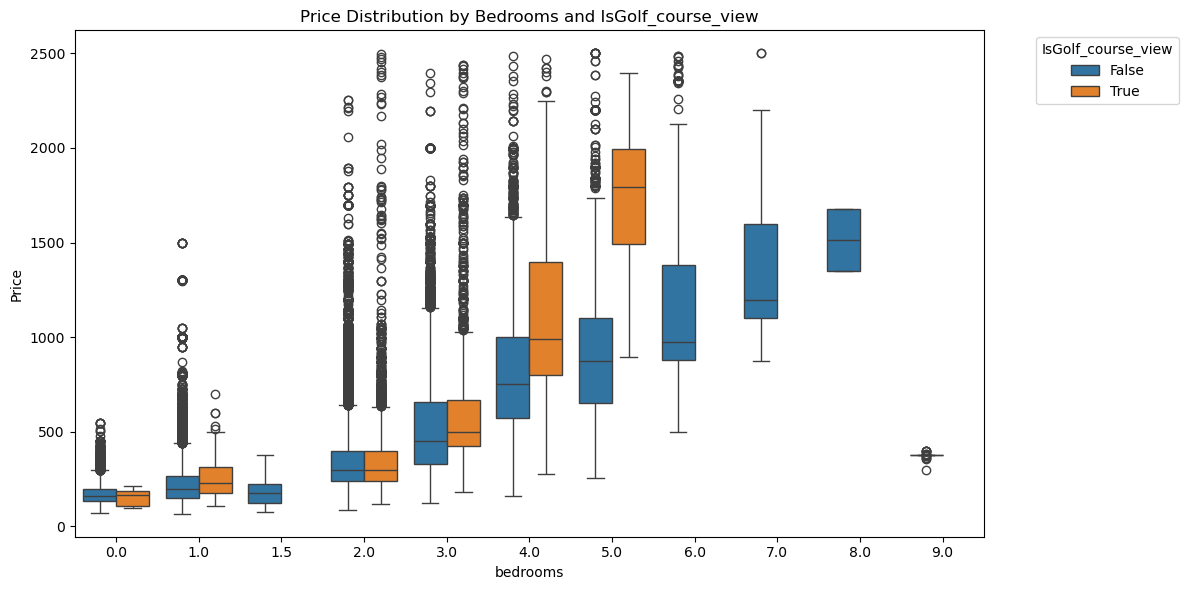


Mean Prices for IsGolf_course_view:
IsGolf_course_view        False        True 
bedrooms                                    
0.0                  176.016101   153.628561
1.0                  220.902817   260.079541
1.5                  187.447989          NaN
2.0                  342.209400   356.191366
3.0                  535.082821   597.368846
4.0                  809.121399  1101.134467
5.0                  936.744393  1708.132832
6.0                 1147.336069          NaN
7.0                 1312.045022          NaN
8.0                 1512.500000          NaN
9.0                  377.724754          NaN


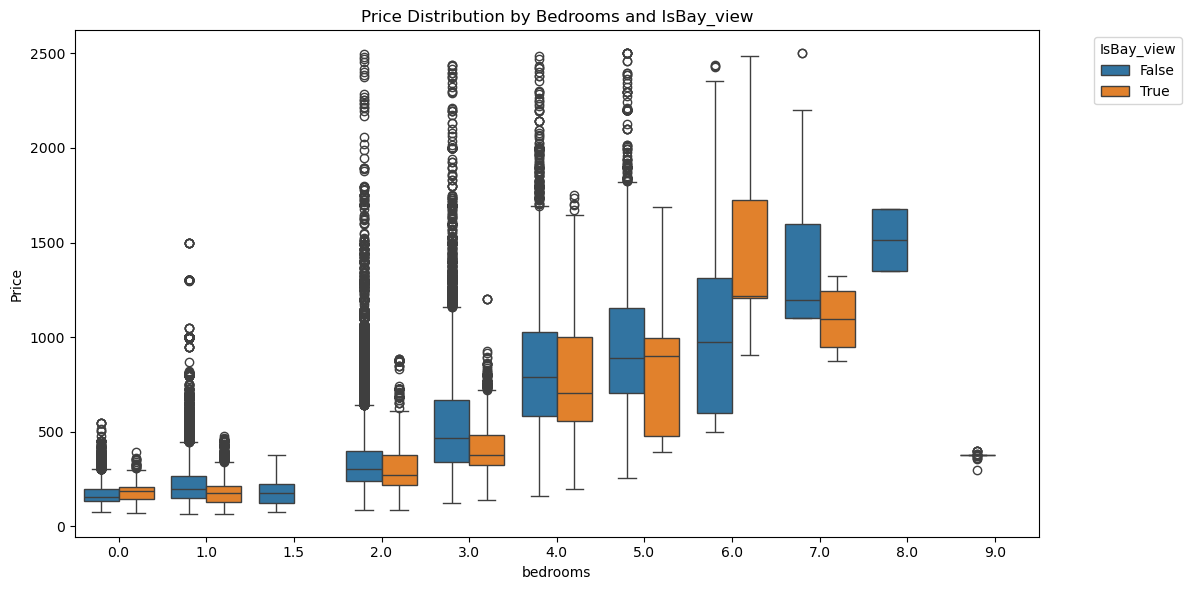


Mean Prices for IsBay_view:
IsBay_view        False        True 
bedrooms                            
0.0          175.393729   186.927662
1.0          223.226392   184.694153
1.5          187.447989          NaN
2.0          343.922927   305.341714
3.0          543.749229   420.451725
4.0          836.783575   762.778941
5.0          968.357273   768.984447
6.0         1092.441745  1488.179913
7.0         1319.113570  1096.959184
8.0         1512.500000          NaN
9.0          377.724754          NaN


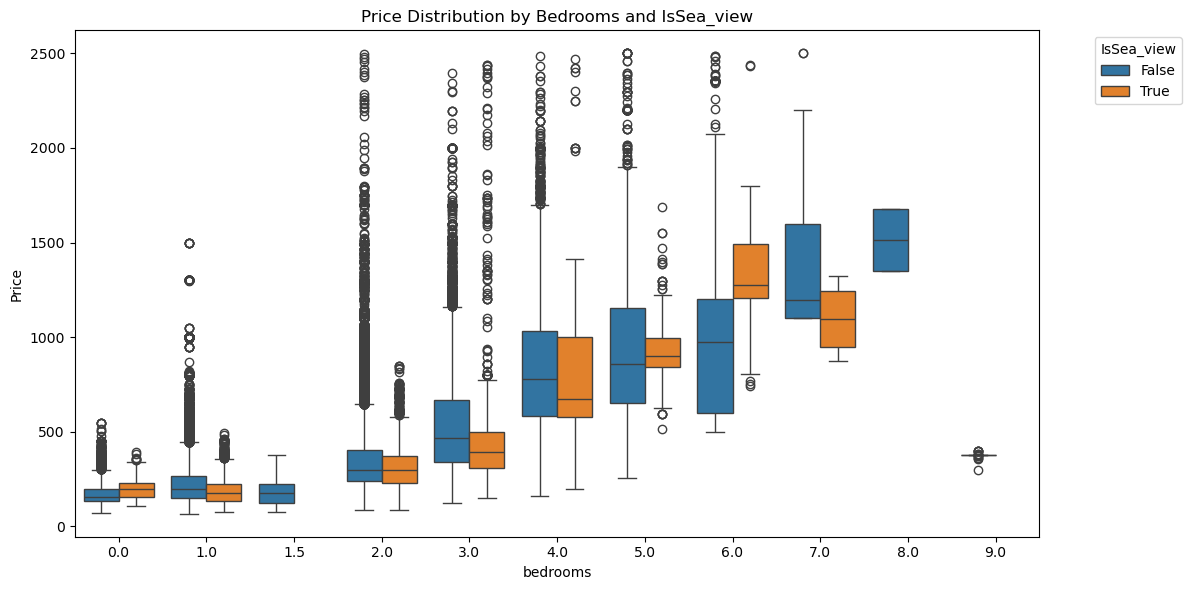


Mean Prices for IsSea_view:
IsSea_view        False        True 
bedrooms                            
0.0          174.930286   201.185997
1.0          222.928554   193.892036
1.5          187.447989          NaN
2.0          343.902141   315.003740
3.0          543.546312   452.816465
4.0          833.898353   773.526868
5.0          954.813534   952.324457
6.0         1082.250022  1328.027330
7.0         1319.113570  1096.959184
8.0         1512.500000          NaN
9.0          377.724754          NaN


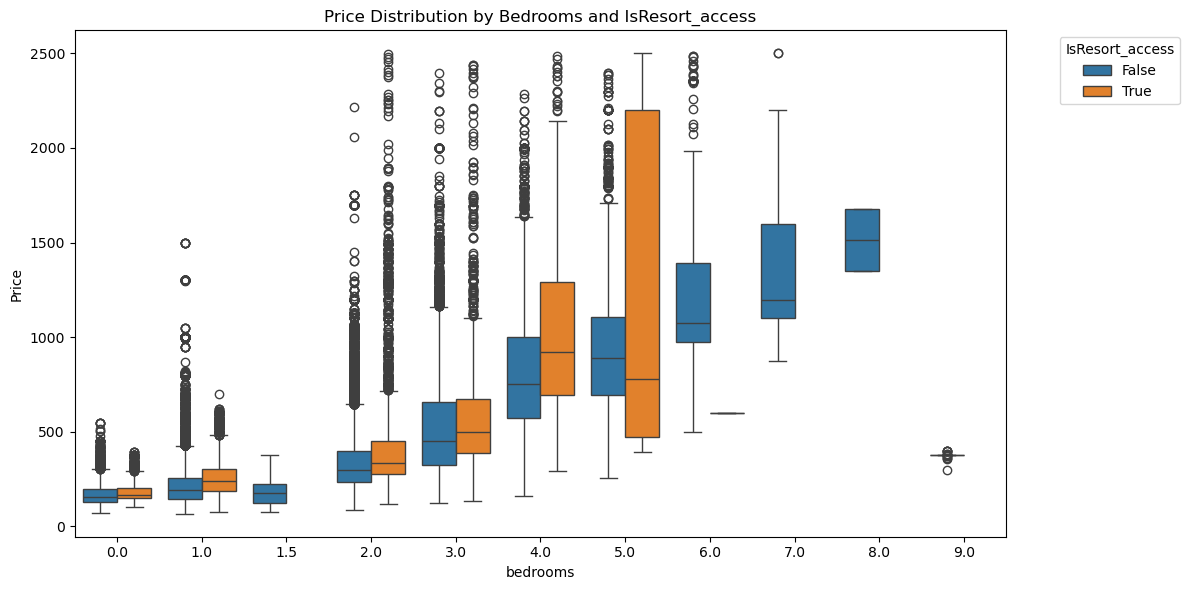


Mean Prices for IsResort_access:
IsResort_access        False        True 
bedrooms                                 
0.0               174.044712   194.016223
1.0               218.388162   256.638890
1.5               187.447989          NaN
2.0               336.750489   395.256214
3.0               536.866690   555.139754
4.0               808.622264  1004.933971
5.0               941.284218  1151.460844
6.0              1190.527214   600.000000
7.0              1312.045022          NaN
8.0              1512.500000          NaN
9.0               377.724754          NaN


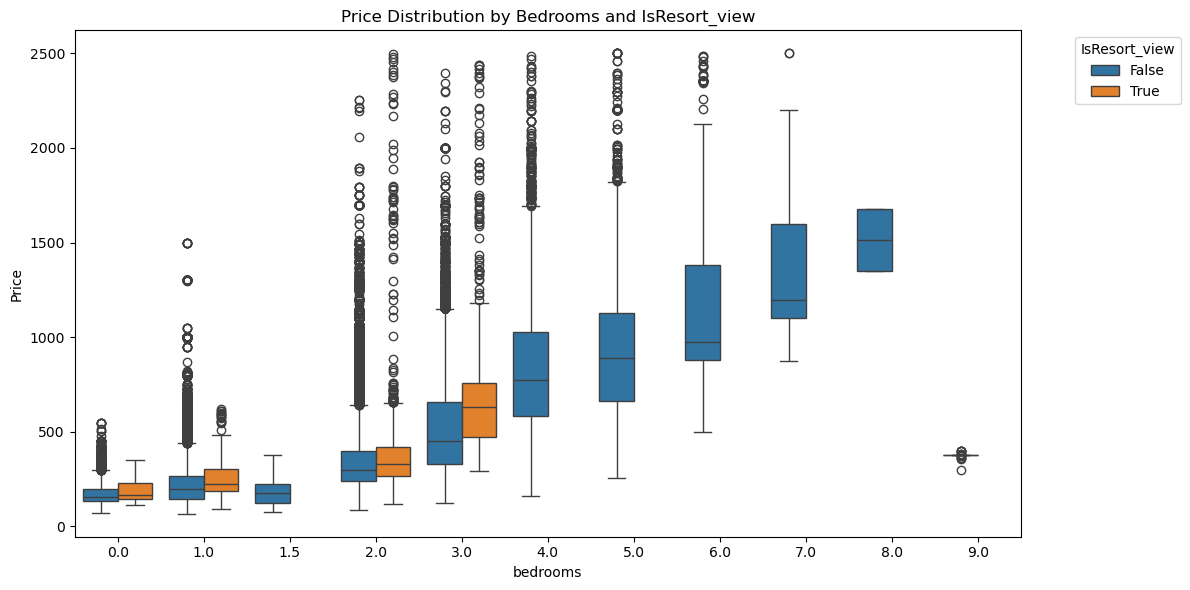


Mean Prices for IsResort_view:
IsResort_view        False       True 
bedrooms                              
0.0             175.750256  181.760812
1.0             221.054600  248.780931
1.5             187.447989         NaN
2.0             342.078761  374.176875
3.0             535.218403  684.687483
4.0             829.567840         NaN
5.0             954.596257         NaN
6.0            1147.336069         NaN
7.0            1312.045022         NaN
8.0            1512.500000         NaN
9.0             377.724754         NaN


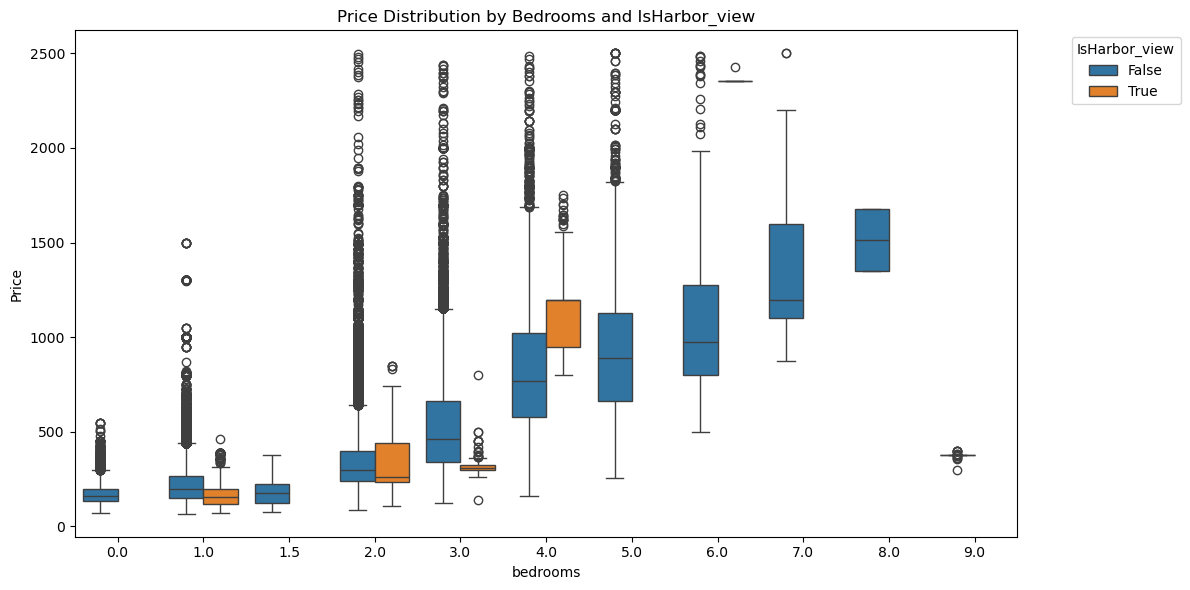


Mean Prices for IsHarbor_view:
IsHarbor_view        False        True 
bedrooms                               
0.0             175.843133          NaN
1.0             221.839708   173.693865
1.5             187.447989          NaN
2.0             342.881891   331.841183
3.0             540.184291   319.452629
4.0             825.194064  1144.508490
5.0             954.596257          NaN
6.0            1051.939653  2356.238916
7.0            1312.045022          NaN
8.0            1512.500000          NaN
9.0             377.724754          NaN


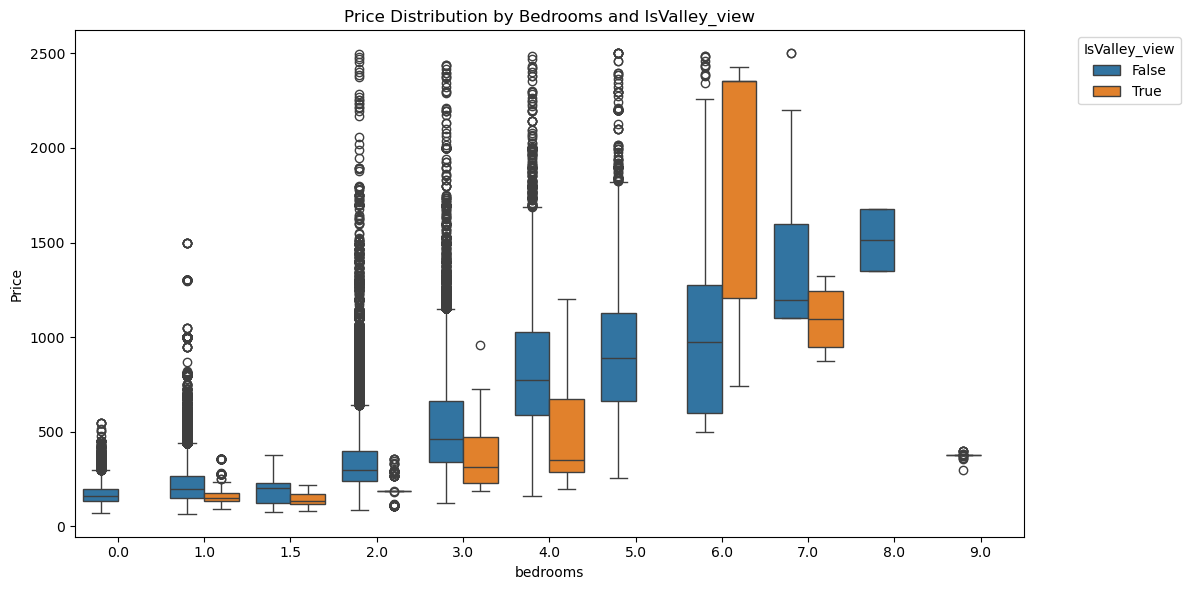


Mean Prices for IsValley_view:
IsValley_view        False        True 
bedrooms                               
0.0             175.843133          NaN
1.0             221.753812   168.693670
1.5             192.496587   141.575390
2.0             343.152240   194.832028
3.0             540.724654   362.225104
4.0             835.879346   524.595862
5.0             954.596257          NaN
6.0            1049.646716  1891.686465
7.0            1319.113570  1096.959184
8.0            1512.500000          NaN
9.0             377.724754          NaN


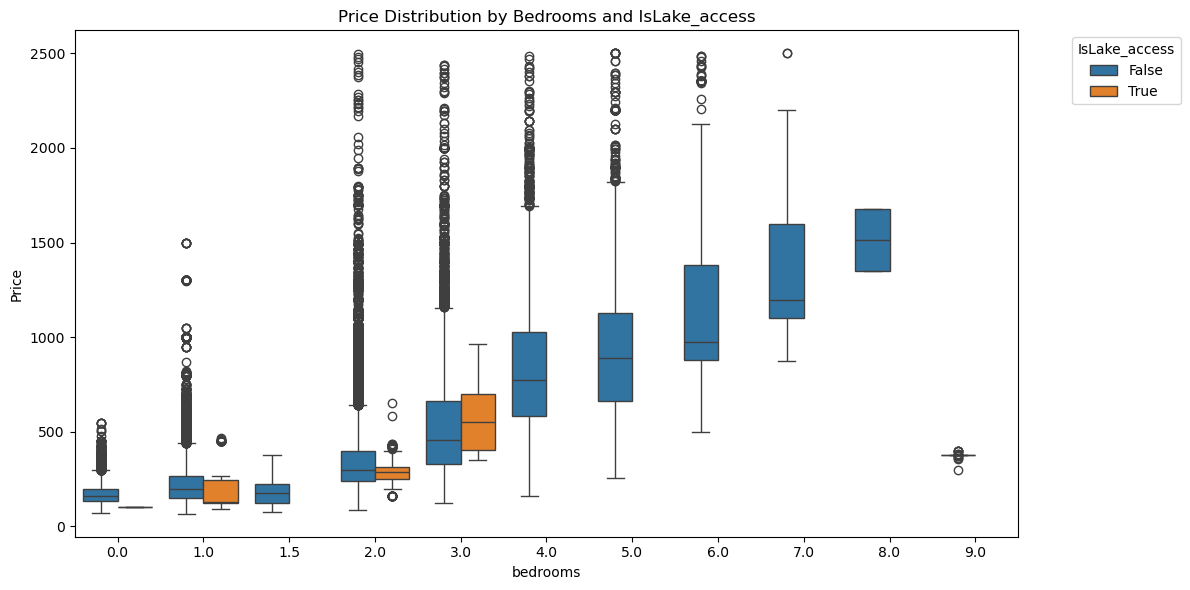


Mean Prices for IsLake_access:
IsLake_access        False       True 
bedrooms                              
0.0             176.137255  100.000000
1.0             221.414338  209.493158
1.5             187.447989         NaN
2.0             342.974316  295.588048
3.0             539.172338  562.185228
4.0             829.567840         NaN
5.0             954.596257         NaN
6.0            1147.336069         NaN
7.0            1312.045022         NaN
8.0            1512.500000         NaN
9.0             377.724754         NaN


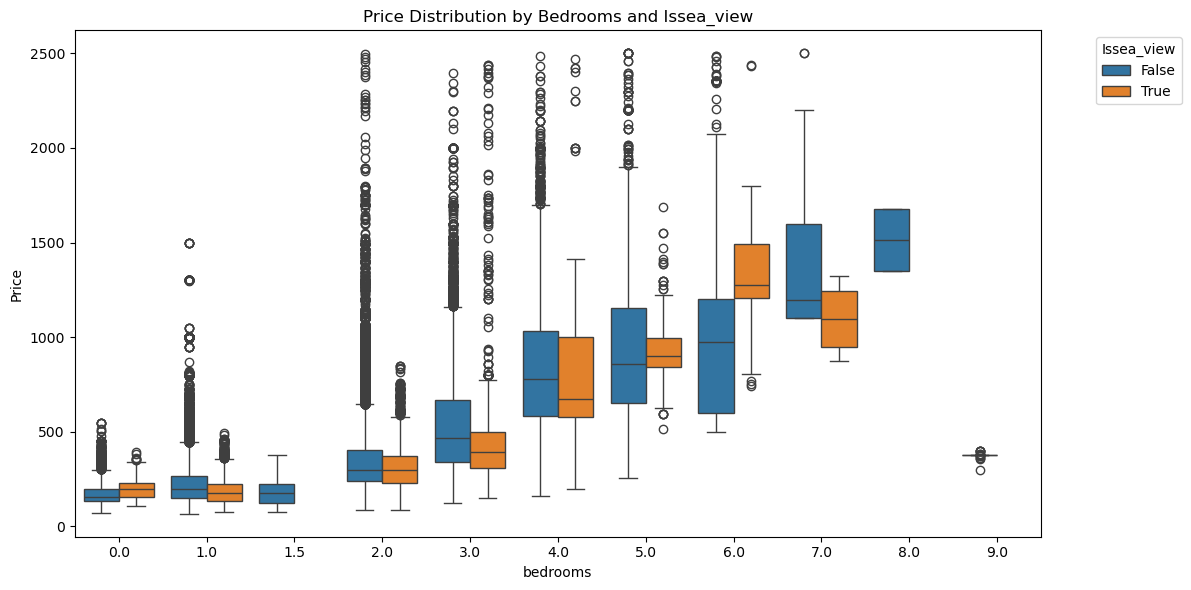


Mean Prices for Issea_view:
Issea_view        False        True 
bedrooms                            
0.0          174.930286   201.185997
1.0          222.928554   193.892036
1.5          187.447989          NaN
2.0          343.902141   315.003740
3.0          543.546312   452.816465
4.0          833.898353   773.526868
5.0          954.813534   952.324457
6.0         1082.250022  1328.027330
7.0         1319.113570  1096.959184
8.0         1512.500000          NaN
9.0          377.724754          NaN


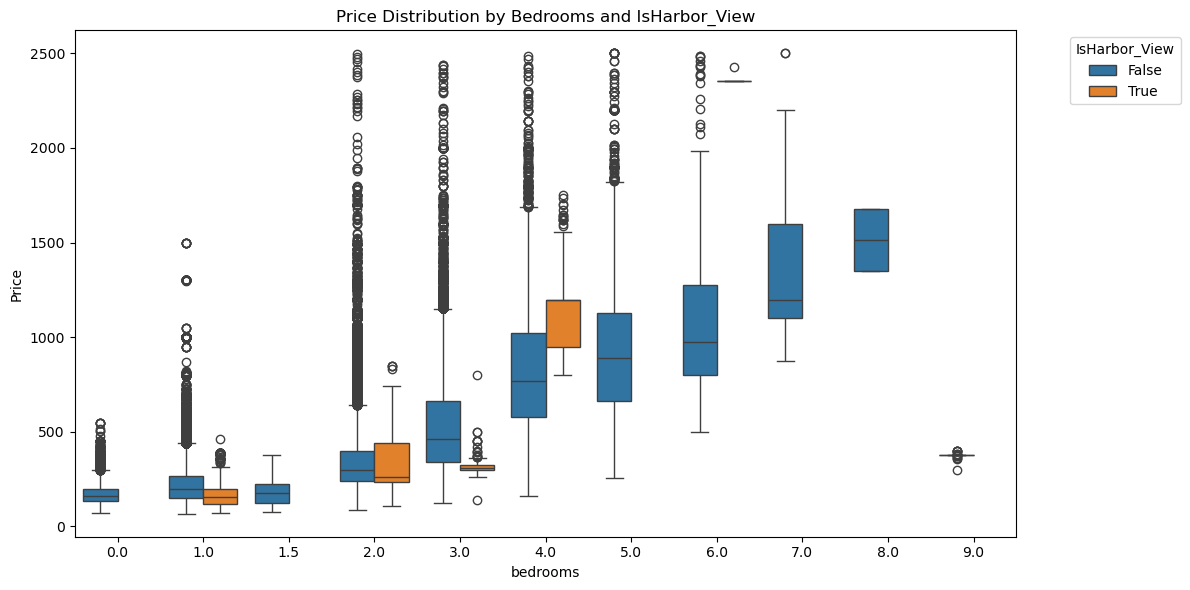


Mean Prices for IsHarbor_View:
IsHarbor_View        False        True 
bedrooms                               
0.0             175.843133          NaN
1.0             221.839708   173.693865
1.5             187.447989          NaN
2.0             342.881891   331.841183
3.0             540.184291   319.452629
4.0             825.194064  1144.508490
5.0             954.596257          NaN
6.0            1051.939653  2356.238916
7.0            1312.045022          NaN
8.0            1512.500000          NaN
9.0             377.724754          NaN


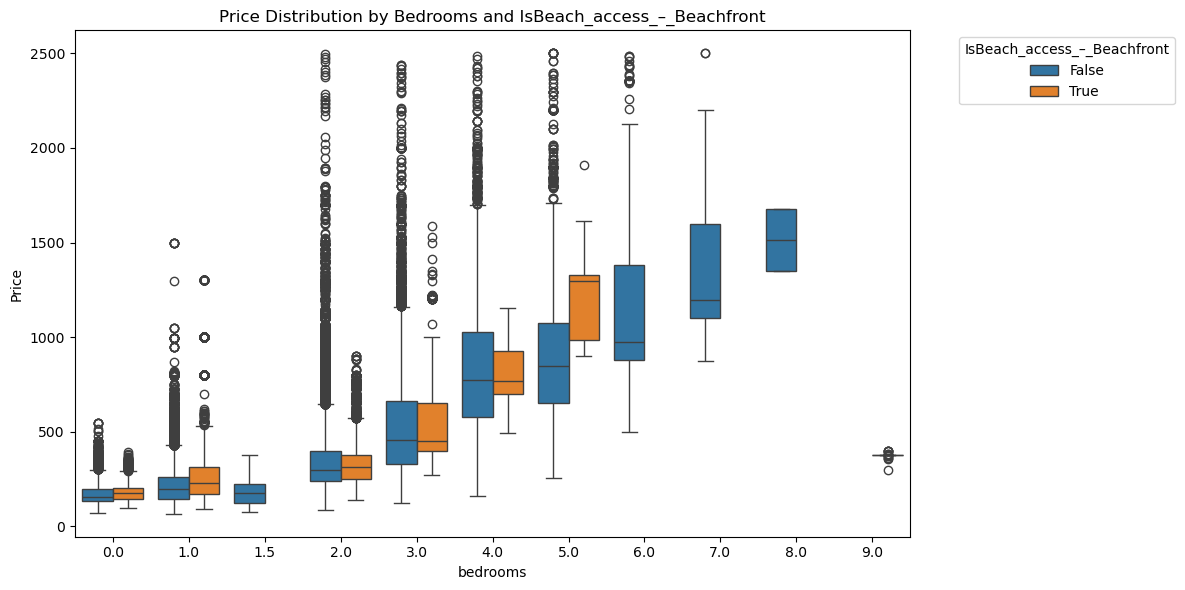


Mean Prices for IsBeach_access_–_Beachfront:
IsBeach_access_–_Beachfront        False        True 
bedrooms                                             
0.0                           174.703471   187.795192
1.0                           215.769431   301.508225
1.5                           187.447989          NaN
2.0                           342.925113   340.811406
3.0                           538.590628   565.656523
4.0                           829.879684   820.372740
5.0                           939.283477  1214.578206
6.0                          1147.336069          NaN
7.0                          1312.045022          NaN
8.0                          1512.500000          NaN
9.0                                  NaN   377.724754


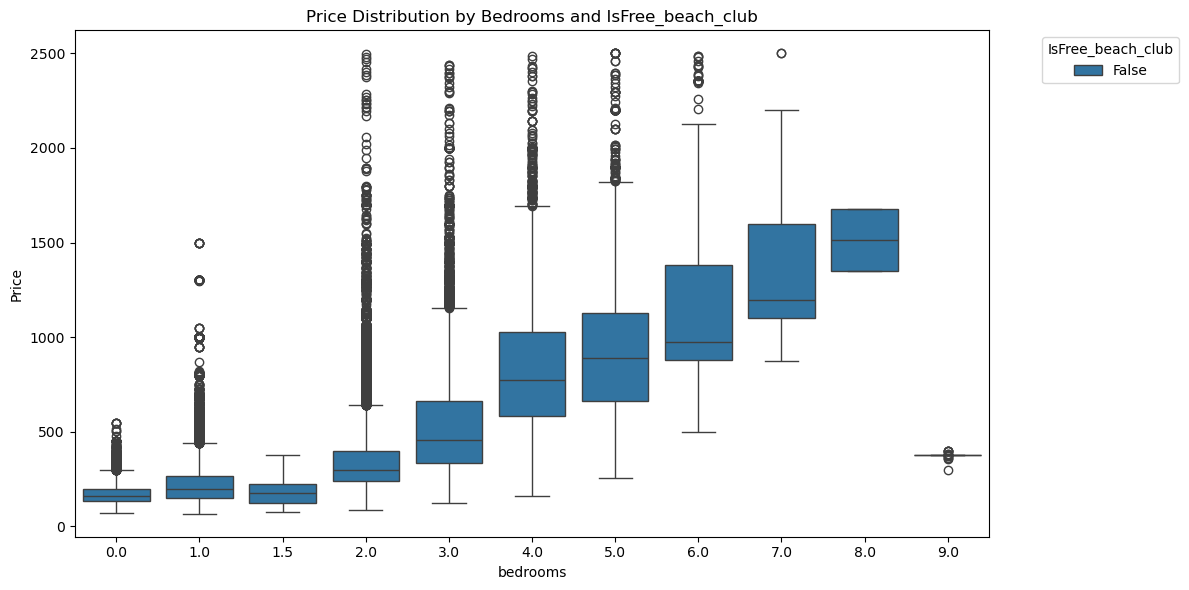


Mean Prices for IsFree_beach_club:
IsFree_beach_club        False
bedrooms                      
0.0                 175.843133
1.0                 221.386329
1.5                 187.447989
2.0                 342.813452
3.0                 539.295528
4.0                 829.567840
5.0                 954.596257
6.0                1147.336069
7.0                1312.045022
8.0                1512.500000
9.0                 377.724754


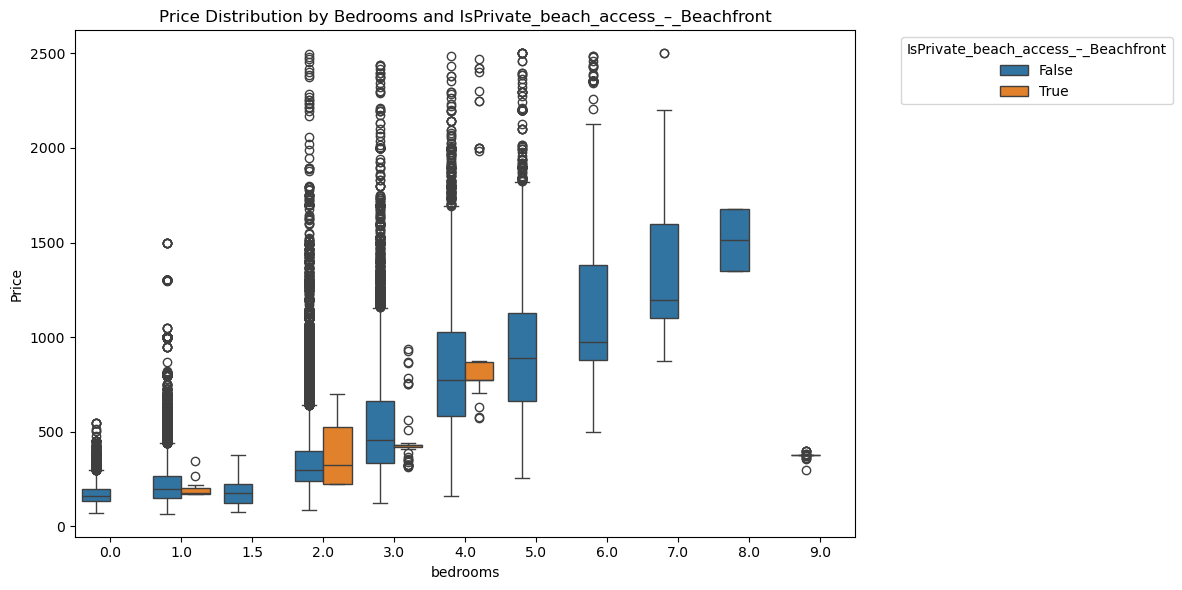


Mean Prices for IsPrivate_beach_access_–_Beachfront:
IsPrivate_beach_access_–_Beachfront        False        True 
bedrooms                                                     
0.0                                   175.843133          NaN
1.0                                   221.424541   186.513444
1.5                                   187.447989          NaN
2.0                                   342.766021   395.130435
3.0                                   539.413543   462.586021
4.0                                   828.309960  1027.719898
5.0                                   954.596257          NaN
6.0                                  1147.336069          NaN
7.0                                  1312.045022          NaN
8.0                                  1512.500000          NaN
9.0                                   377.724754          NaN


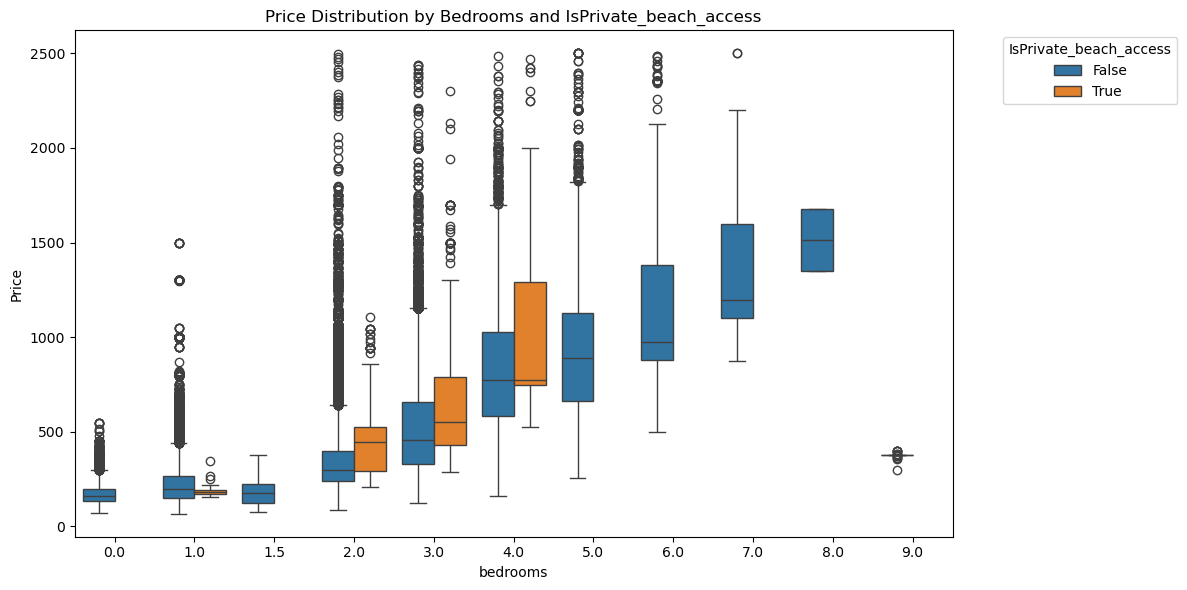


Mean Prices for IsPrivate_beach_access:
IsPrivate_beach_access        False       True 
bedrooms                                       
0.0                      175.843133         NaN
1.0                      221.472670  182.030973
1.5                      187.447989         NaN
2.0                      342.494147  443.589746
3.0                      537.769709  677.552972
4.0                      827.750422  953.799740
5.0                      954.596257         NaN
6.0                     1147.336069         NaN
7.0                     1312.045022         NaN
8.0                     1512.500000         NaN
9.0                      377.724754         NaN


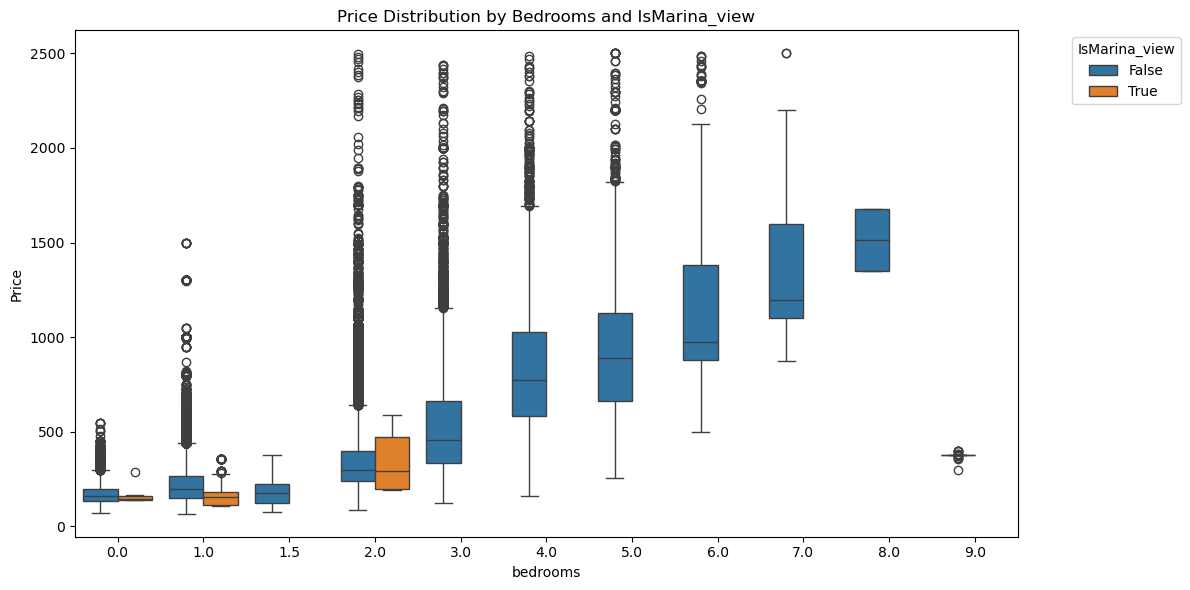


Mean Prices for IsMarina_view:
IsMarina_view        False       True 
bedrooms                              
0.0             175.942287  150.275041
1.0             221.592101  172.252944
1.5             187.447989         NaN
2.0             342.814307  342.322851
3.0             539.295528         NaN
4.0             829.567840         NaN
5.0             954.596257         NaN
6.0            1147.336069         NaN
7.0            1312.045022         NaN
8.0            1512.500000         NaN
9.0             377.724754         NaN


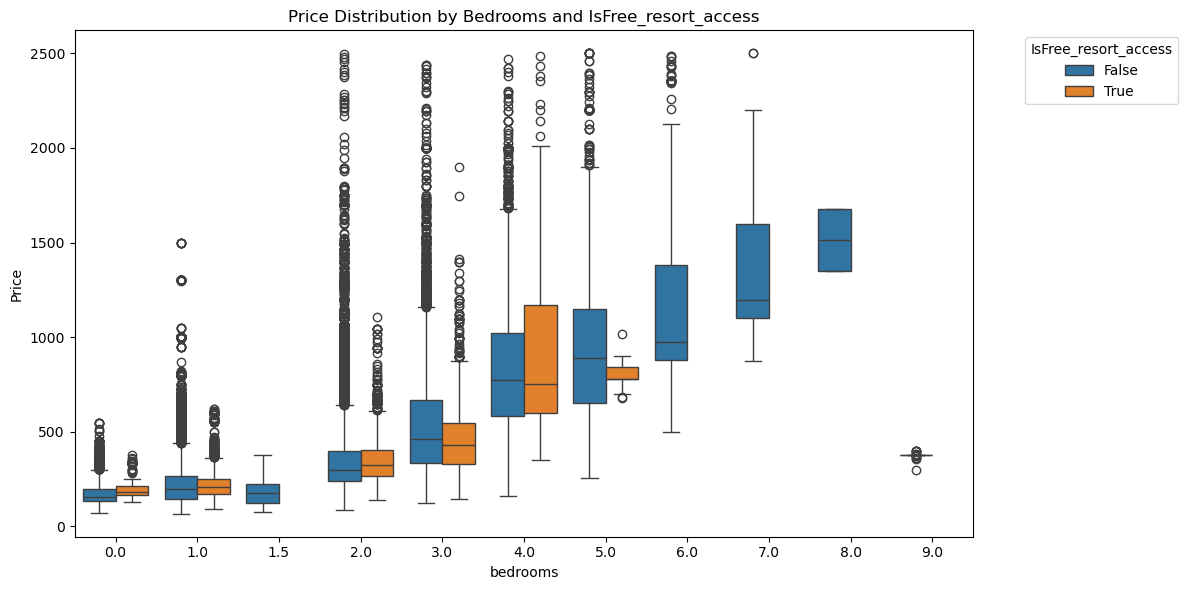


Mean Prices for IsFree_resort_access:
IsFree_resort_access        False       True 
bedrooms                                     
0.0                    175.333990  199.073950
1.0                    221.383566  221.490083
1.5                    187.447989         NaN
2.0                    342.677789  347.209195
3.0                    542.093740  467.603040
4.0                    827.761286  893.490246
5.0                    957.510367  804.798632
6.0                   1147.336069         NaN
7.0                   1312.045022         NaN
8.0                   1512.500000         NaN
9.0                    377.724754         NaN


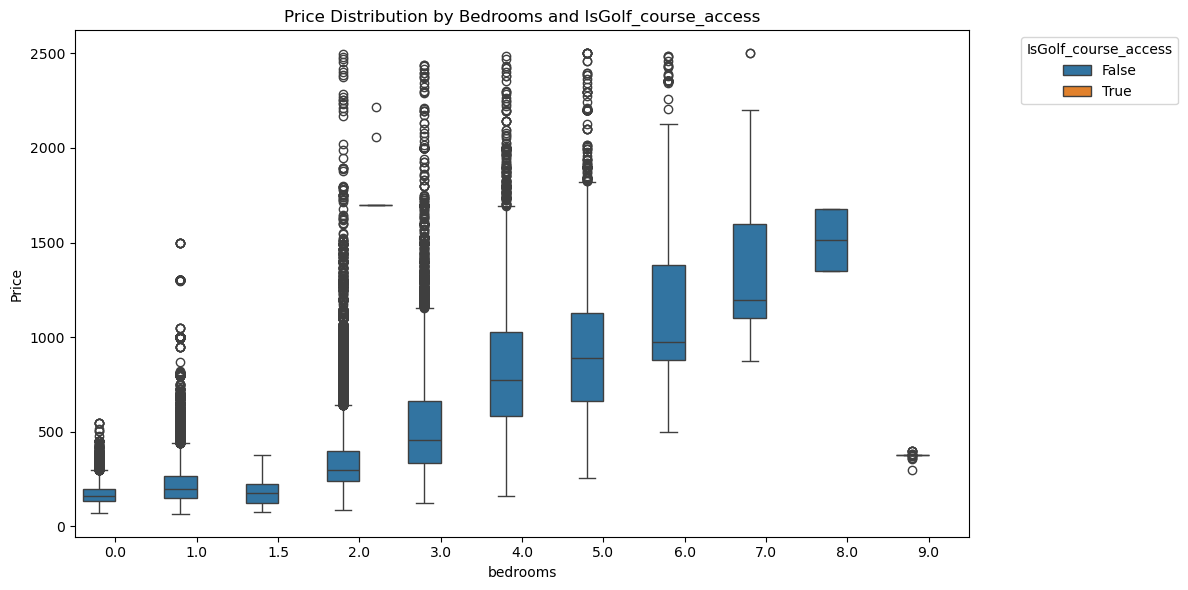


Mean Prices for IsGolf_course_access:
IsGolf_course_access        False        True 
bedrooms                                      
0.0                    175.843133          NaN
1.0                    221.386329          NaN
1.5                    187.447989          NaN
2.0                    342.229068  1716.190476
3.0                    539.295528          NaN
4.0                    829.567840          NaN
5.0                    954.596257          NaN
6.0                   1147.336069          NaN
7.0                   1312.045022          NaN
8.0                   1512.500000          NaN
9.0                    377.724754          NaN


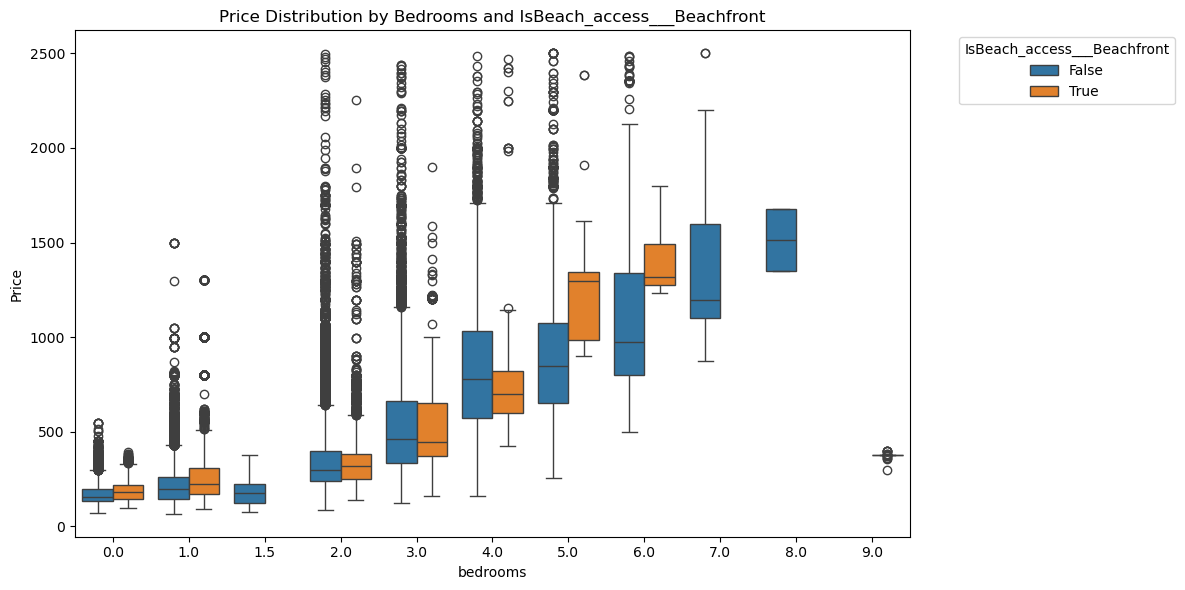


Mean Prices for IsBeach_access___Beachfront:
IsBeach_access___Beachfront        False        True 
bedrooms                                             
0.0                           173.412902   192.456476
1.0                           215.402508   292.580471
1.5                           187.447989          NaN
2.0                           342.595392   345.983189
3.0                           540.191482   516.846704
4.0                           833.802926   762.917931
5.0                           938.036733  1231.461973
6.0                          1126.923167  1406.016810
7.0                          1312.045022          NaN
8.0                          1512.500000          NaN
9.0                                  NaN   377.724754


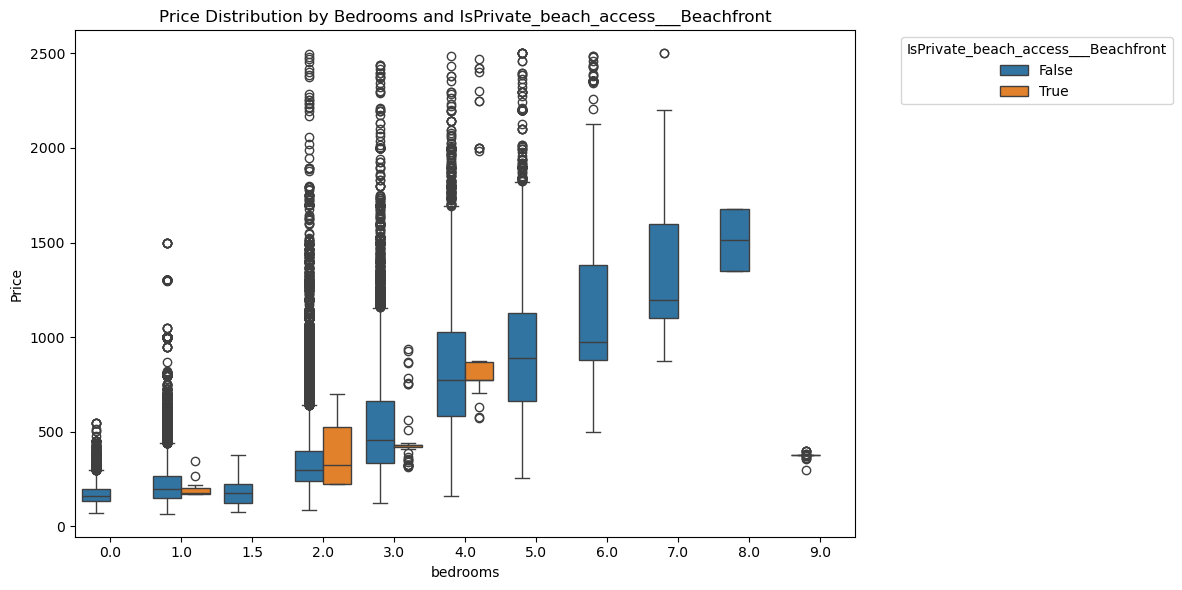


Mean Prices for IsPrivate_beach_access___Beachfront:
IsPrivate_beach_access___Beachfront        False        True 
bedrooms                                                     
0.0                                   175.843133          NaN
1.0                                   221.424541   186.513444
1.5                                   187.447989          NaN
2.0                                   342.766021   395.130435
3.0                                   539.413543   462.586021
4.0                                   828.309960  1027.719898
5.0                                   954.596257          NaN
6.0                                  1147.336069          NaN
7.0                                  1312.045022          NaN
8.0                                  1512.500000          NaN
9.0                                   377.724754          NaN


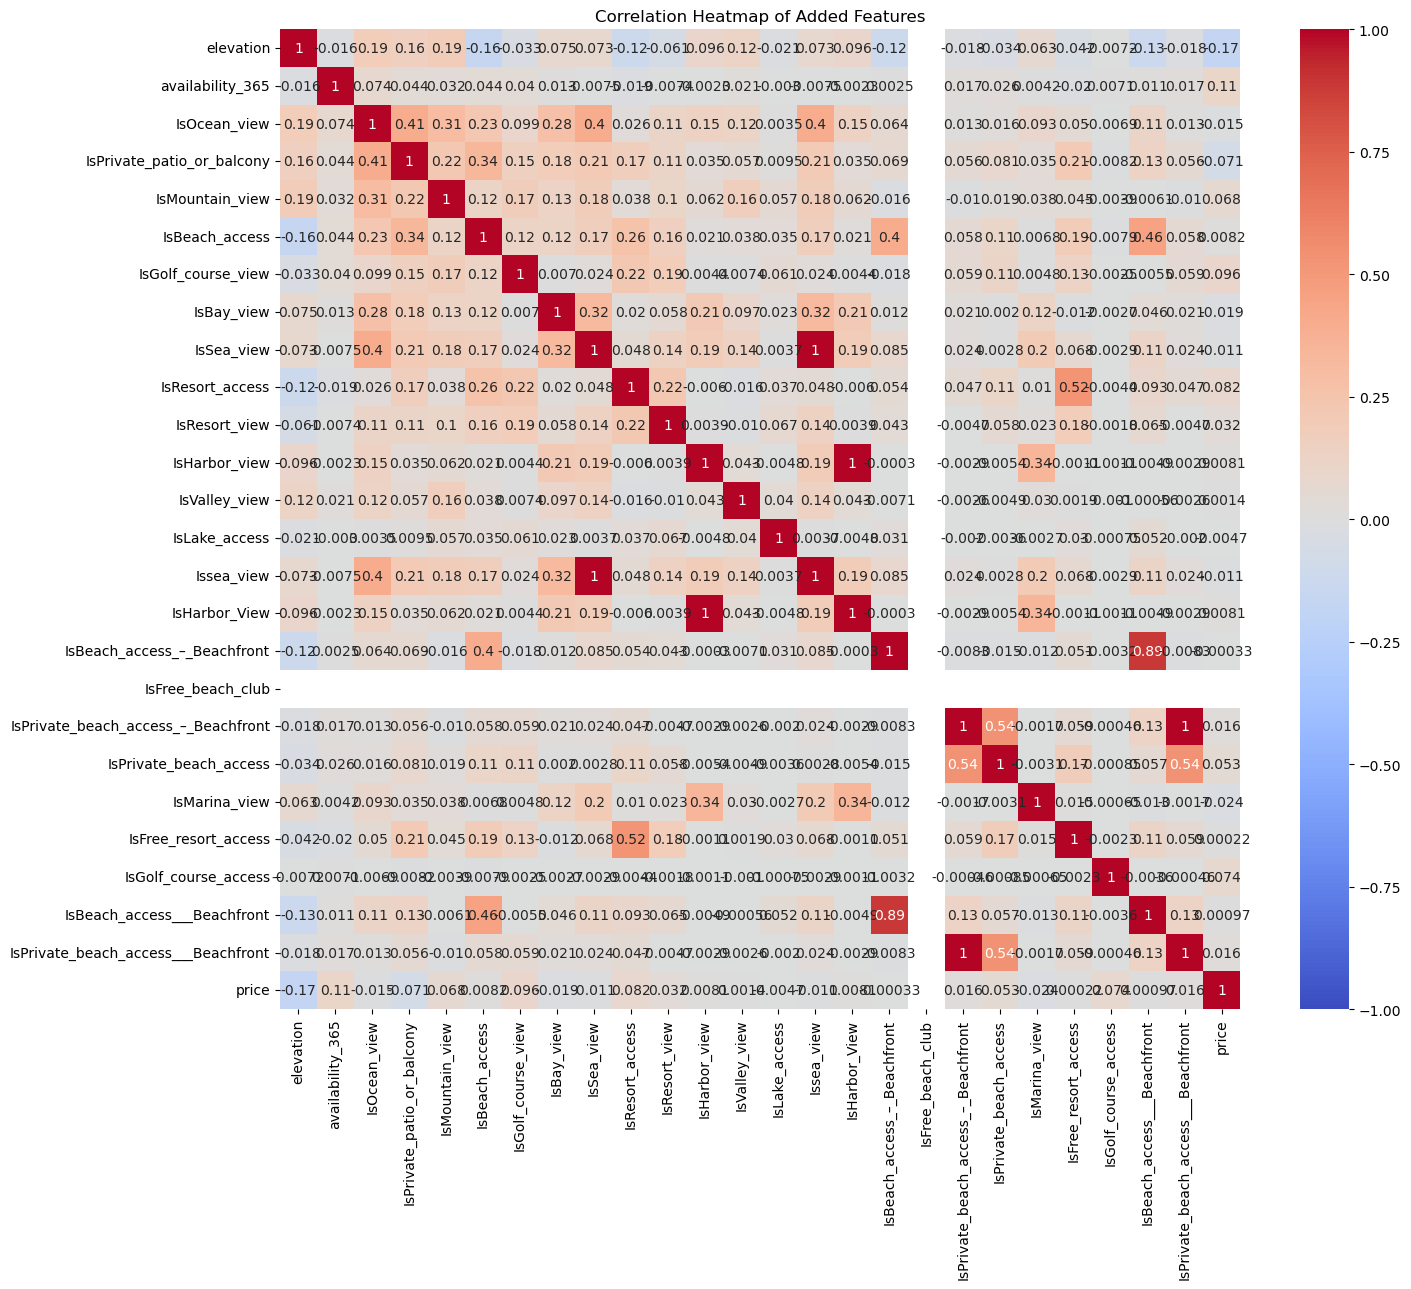

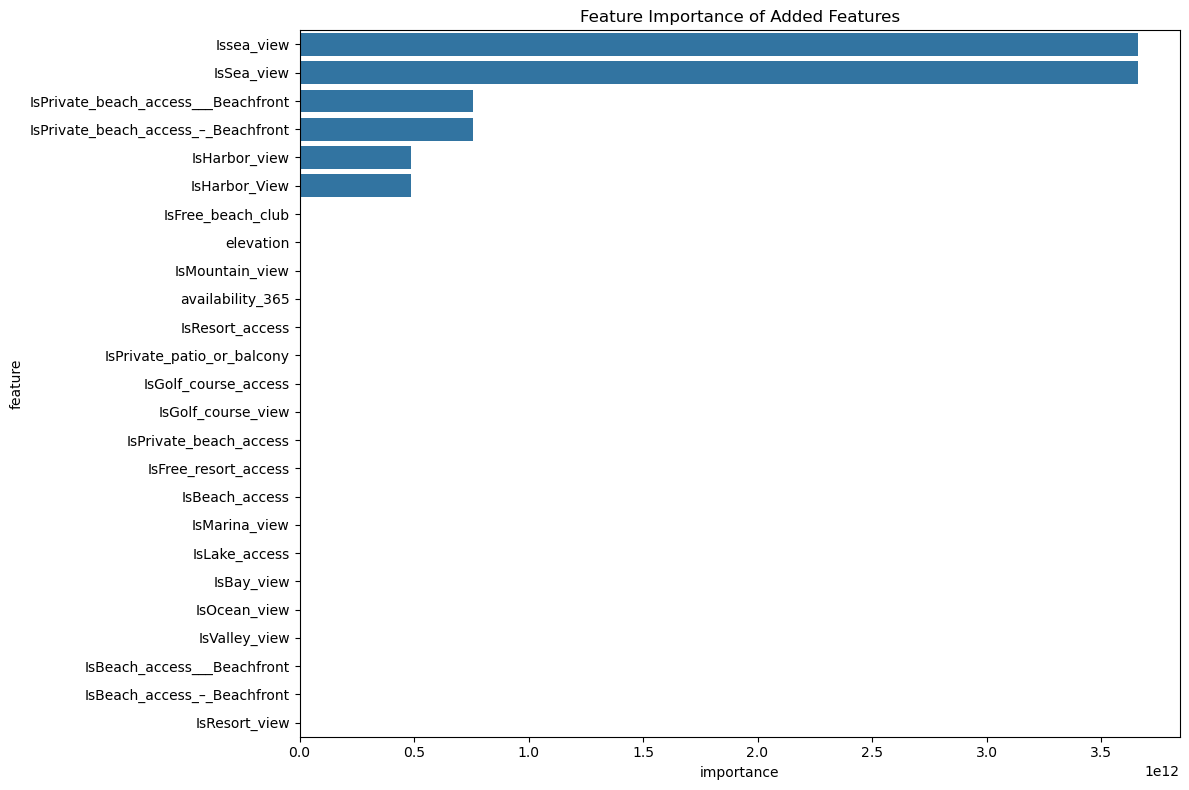


Top 10 Most Important Added Features:
                                feature    importance
14                           Issea_view  3.661589e+12
8                            IsSea_view  3.661589e+12
24  IsPrivate_beach_access___Beachfront  7.586010e+11
18  IsPrivate_beach_access_–_Beachfront  7.586010e+11
11                        IsHarbor_view  4.885588e+11
15                        IsHarbor_View  4.885588e+11
17                    IsFree_beach_club  6.240006e+09
0                             elevation  4.350390e+01
4                       IsMountain_view  2.506159e+01
1                      availability_365  2.470246e+01


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for 4 and 5 bedroom listings

# Function to analyze and plot feature interactions
def analyze_feature_interaction(df,feature):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='bedrooms', y='price', hue=feature, data=df)
    plt.title(f'Price Distribution by Bedrooms and {feature}')
    plt.ylabel('Price')
    #plt.xticks([0, 1], ['4 Bedrooms', '5 Bedrooms'])
    plt.legend(title=feature, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    # Calculate mean price for each combination
    mean_prices = df.groupby(['bedrooms', feature])['price'].mean().unstack()
    print(f"\nMean Prices for {feature}:")
    print(mean_prices)


# Analyze interactions for each added feature
for feature in added_columns:
    analyze_feature_interaction(joined,feature)

# Correlation analysis
correlation_matrix = joined[added_columns + ['price']].corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Added Features')
plt.tight_layout()
plt.show()

# Feature importance (using a simple linear regression)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = joined[added_columns]
y = joined['price']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit linear regression
model = LinearRegression()
model.fit(X_scaled, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': added_columns,
    'importance': np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance of Added Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Added Features:")
print(feature_importance.head(10))




# I chose some of the features that may help explain some of the price variance at larger listing sizes.


Feature: IsResort_access
Mean Price (True): $406.66 (Count: 29925)
Mean Price (False): $339.06 (Count: 276329)
Difference: $67.60
Percentage Difference: 19.94%

Feature: IsBeach_access
Mean Price (True): $349.07 (Count: 79636)
Mean Price (False): $344.47 (Count: 226618)
Difference: $4.60
Percentage Difference: 1.34%

Feature: IsGolf_course_view
Mean Price (True): $469.59 (Count: 10649)
Mean Price (False): $341.20 (Count: 295605)
Difference: $128.39
Percentage Difference: 37.63%

Feature: IsBeach_access_–_Beachfront
Mean Price (True): $345.33 (Count: 16635)
Mean Price (False): $345.68 (Count: 289619)
Difference: $-0.35
Percentage Difference: -0.10%

Feature: IsResort_view
Mean Price (True): $402.91 (Count: 5578)
Mean Price (False): $344.60 (Count: 300676)
Difference: $58.31
Percentage Difference: 16.92%


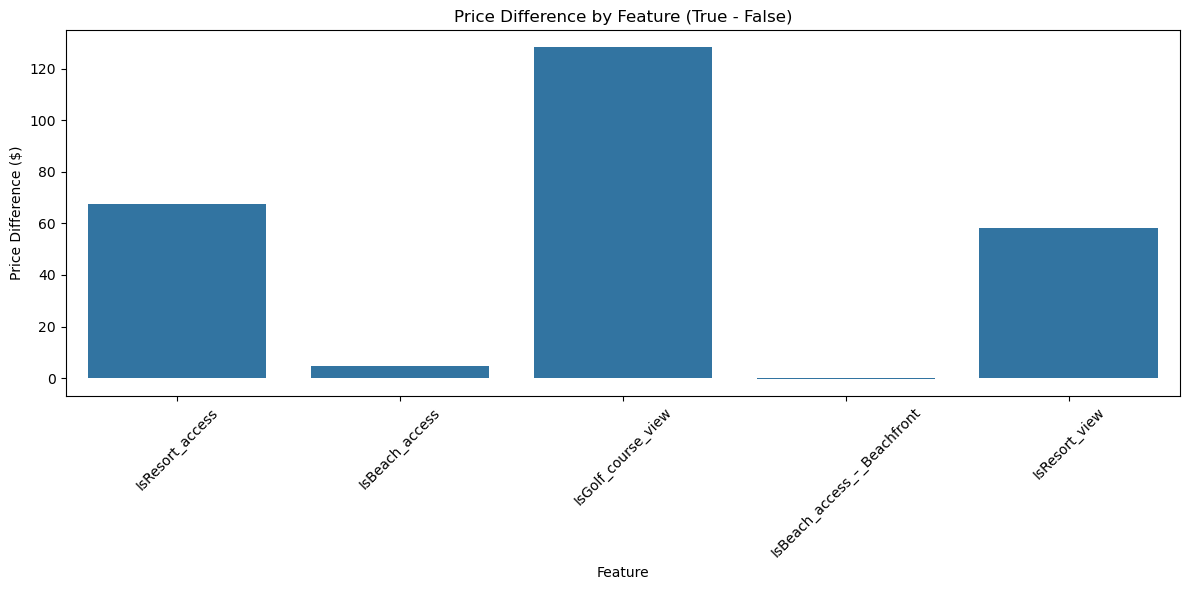

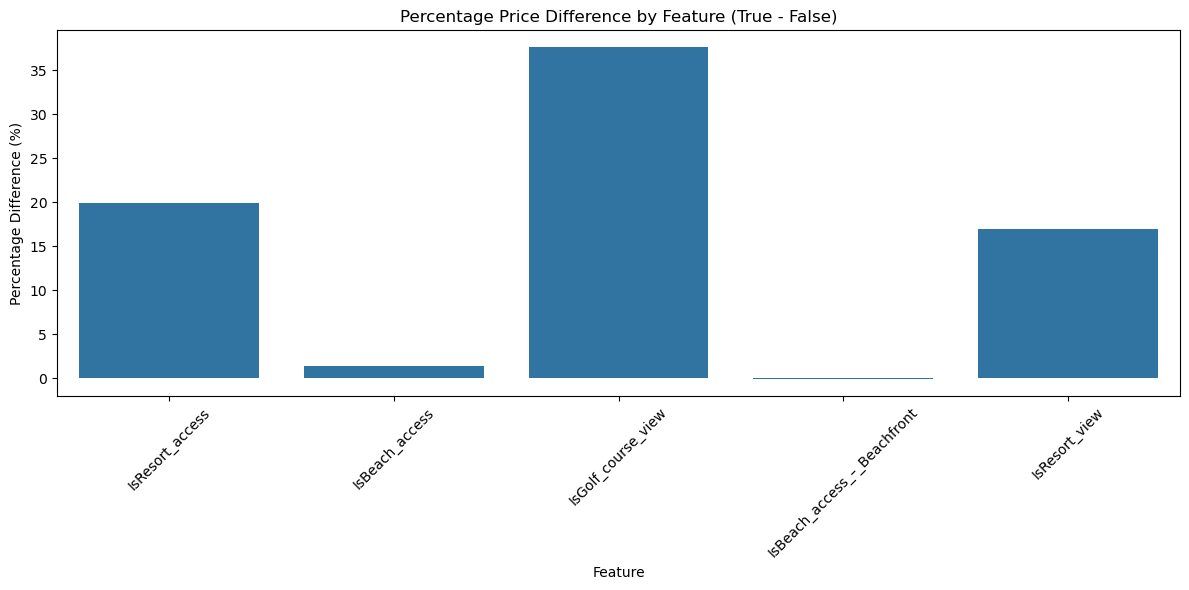


Summary Table:
                    Feature  Mean Price (True)  Mean Price (False)  Count (True)  Count (False)  Difference  Percentage Difference
            IsResort_access         406.658916          339.057005         29925         276329   67.601911              19.938214
             IsBeach_access         349.067926          344.465919         79636         226618    4.602007               1.335983
         IsGolf_course_view         469.585268          341.198348         10649         295605  128.386920              37.628236
IsBeach_access_–_Beachfront         345.328079          345.681804         16635         289619   -0.353725              -0.102327
              IsResort_view         402.910444          344.600556          5578         300676   58.309889              16.921008


In [28]:

# List of features to analyze
features_to_analyze = ['IsResort_access', 'IsBeach_access', 'IsGolf_course_view', 'IsBeach_access_–_Beachfront','IsResort_view']

# Function to calculate and display mean prices and counts
def analyze_feature_impact(feature):
    # Calculate mean prices
    mean_true = joined[joined[feature] == True]['price'].mean()
    mean_false = joined[joined[feature] == False]['price'].mean()
    
    # Count the number of rows in each category
    count_true = joined[joined[feature] == True].shape[0]
    count_false = joined[joined[feature] == False].shape[0]
    
    difference = mean_true - mean_false
    percentage_difference = (difference / mean_false) * 100 if mean_false != 0 else np.nan  # Avoid division by zero
    
    print(f"\nFeature: {feature}")
    print(f"Mean Price (True): ${mean_true:.2f} (Count: {count_true})")
    print(f"Mean Price (False): ${mean_false:.2f} (Count: {count_false})")
    print(f"Difference: ${difference:.2f}")
    print(f"Percentage Difference: {percentage_difference:.2f}%")
    
    return {
        'Feature': feature,
        'Mean Price (True)': mean_true,
        'Mean Price (False)': mean_false,
        'Count (True)': count_true,
        'Count (False)': count_false,
        'Difference': difference,
        'Percentage Difference': percentage_difference
    }

# Analyze each feature
results = []
for feature in features_to_analyze:
    results.append(analyze_feature_impact(feature))

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Difference', data=results_df)
plt.title('Price Difference by Feature (True - False)')
plt.ylabel('Price Difference ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Percentage Difference', data=results_df)
plt.title('Percentage Price Difference by Feature (True - False)')
plt.ylabel('Percentage Difference (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary Table:")
print(results_df.to_string(index=False))


**IsGolf_course_view, isResort_view, and isResort_access have different mean prices for True and False**


Feature: IsResort_access
Mean Price (True): $1004.48 (Count: 1398)
Mean Price (False): $865.12 (Count: 13349)
Difference: $139.37
Percentage Difference: 16.11%

Feature: IsBeach_access
Mean Price (True): $929.16 (Count: 4713)
Mean Price (False): $854.46 (Count: 10034)
Difference: $74.70
Percentage Difference: 8.74%

Feature: IsGolf_course_view
Mean Price (True): $1142.62 (Count: 834)
Mean Price (False): $862.49 (Count: 13913)
Difference: $280.13
Percentage Difference: 32.48%

Feature: IsBeach_access_–_Beachfront
Mean Price (True): $871.06 (Count: 559)
Mean Price (False): $878.62 (Count: 14188)
Difference: $-7.56
Percentage Difference: -0.86%

Feature: IsResort_view
Mean Price (True): $nan (Count: 0)
Mean Price (False): $878.33 (Count: 14747)
Difference: $nan
Percentage Difference: nan%


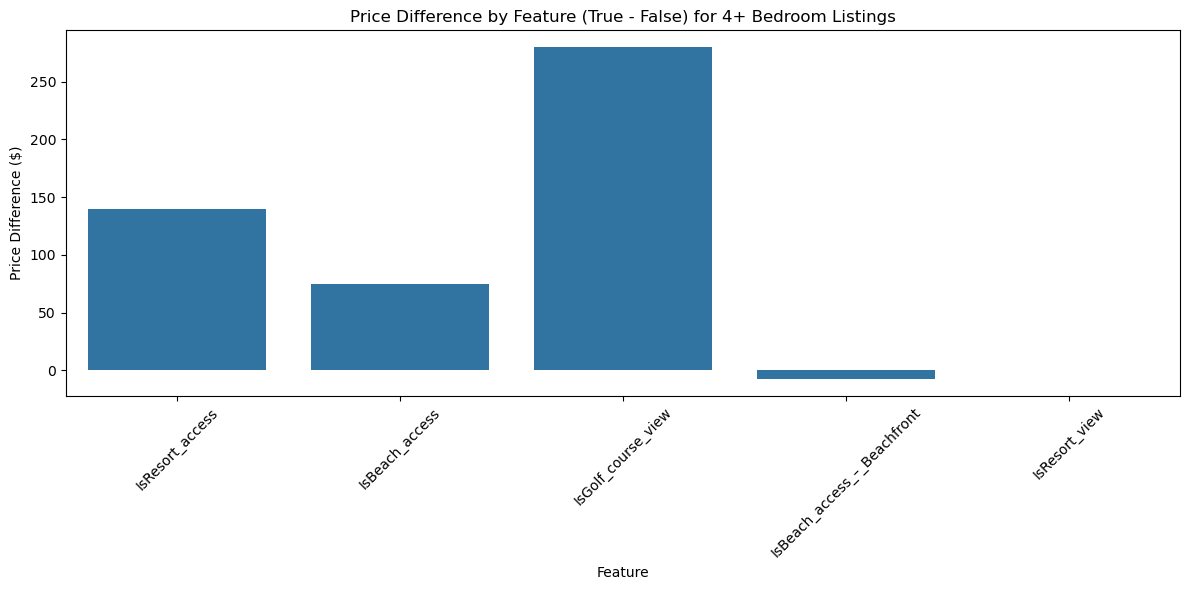

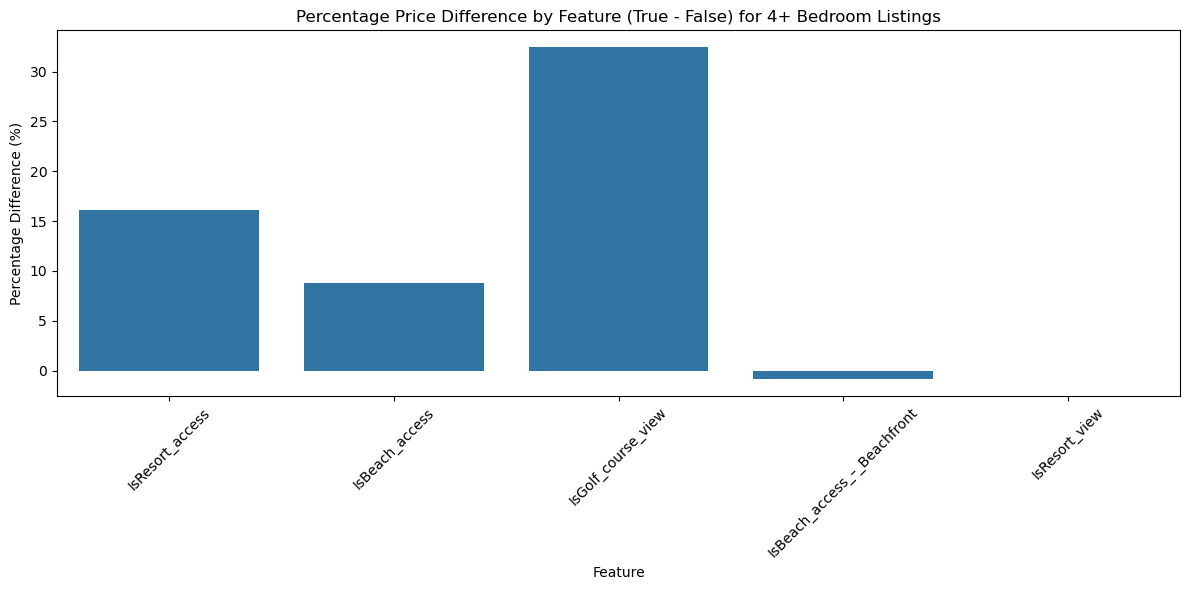


Summary Table for 4+ Bedroom Listings:
                    Feature  Mean Price (True)  Mean Price (False)  Count (True)  Count (False)  Difference  Percentage Difference
            IsResort_access        1004.484773          865.118034          1398          13349  139.366739              16.109564
             IsBeach_access         929.157466          854.455971          4713          10034   74.701495               8.742580
         IsGolf_course_view        1142.619967          862.487263           834          13913  280.132704              32.479634
IsBeach_access_–_Beachfront         871.057115          878.616396           559          14188   -7.559280              -0.860362
              IsResort_view                NaN          878.329853             0          14747         NaN                    NaN


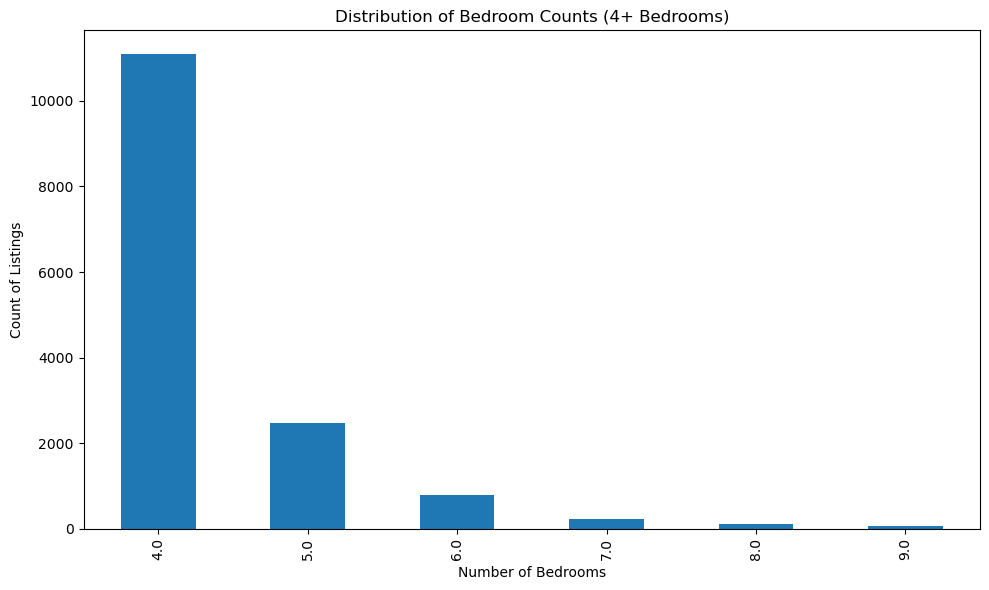


Distribution of Bedroom Counts:
bedrooms
4.0    11097
5.0     2463
6.0      793
7.0      220
8.0      116
9.0       58
Name: count, dtype: int64


In [30]:


# Filter for listings with 4 or more bedrooms
joined_4plus = joined[joined['bedrooms'] >= 4]

# List of features to analyze
features_to_analyze = ['IsResort_access', 'IsBeach_access', 'IsGolf_course_view', 'IsBeach_access_–_Beachfront','IsResort_view']

# Function to calculate and display mean prices and counts
def analyze_feature_impact(feature):
    # Calculate mean prices
    mean_true = joined_4plus[joined_4plus[feature] == True]['price'].mean()
    mean_false = joined_4plus[joined_4plus[feature] == False]['price'].mean()
    
    # Count the number of rows in each category
    count_true = joined_4plus[joined_4plus[feature] == True].shape[0]
    count_false = joined_4plus[joined_4plus[feature] == False].shape[0]
    
    difference = mean_true - mean_false
    percentage_difference = (difference / mean_false) * 100 if mean_false != 0 else np.nan  # Avoid division by zero
    
    print(f"\nFeature: {feature}")
    print(f"Mean Price (True): ${mean_true:.2f} (Count: {count_true})")
    print(f"Mean Price (False): ${mean_false:.2f} (Count: {count_false})")
    print(f"Difference: ${difference:.2f}")
    print(f"Percentage Difference: {percentage_difference:.2f}%")
    
    return {
        'Feature': feature,
        'Mean Price (True)': mean_true,
        'Mean Price (False)': mean_false,
        'Count (True)': count_true,
        'Count (False)': count_false,
        'Difference': difference,
        'Percentage Difference': percentage_difference
    }

# Analyze each feature
results = []
for feature in features_to_analyze:
    results.append(analyze_feature_impact(feature))

# Create a DataFrame with the results
results_df = pd.DataFrame(results)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Difference', data=results_df)
plt.title('Price Difference by Feature (True - False) for 4+ Bedroom Listings')
plt.ylabel('Price Difference ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting percentage difference
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Percentage Difference', data=results_df)
plt.title('Percentage Price Difference by Feature (True - False) for 4+ Bedroom Listings')
plt.ylabel('Percentage Difference (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print summary table
print("\nSummary Table for 4+ Bedroom Listings:")
print(results_df.to_string(index=False))

# Additional analysis: Distribution of bedroom counts
bedroom_counts = joined_4plus['bedrooms'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
bedroom_counts.plot(kind='bar')
plt.title('Distribution of Bedroom Counts (4+ Bedrooms)')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Listings')
plt.tight_layout()
plt.show()

print("\nDistribution of Bedroom Counts:")
print(bedroom_counts)


# Add the features to the data to see if it impacts the model performance.  
**I created two new features 'isBeachAccess' and 'isResortAmenities'. isResortAmenities includeds IsResort_access, IsResort_view and IsGolf_course_view.**

In [32]:
import pandas as pd

# Create the new features
joined['isBeachAccess'] = (
     (joined['IsBeach_access'])
)

joined['isResortAmenities'] = (
      
    (joined['IsResort_access'] | joined['IsGolf_course_view']|(joined['IsResort_view']))
)

# List of columns to remove
added_columns = ["availability_365", "IsOcean_view", "IsPrivate_patio_or_balcony",
    "IsMountain_view", "IsBeach_access", "IsGolf_course_view", "IsBay_view",
    "IsSea_view", "IsResort_access", "IsResort_view", "IsHarbor_view",
    "IsValley_view", "IsLake_access", "Issea_view", "IsHarbor_View",
    "IsBeach_access_–_Beachfront", "IsFree_beach_club",
    "IsPrivate_beach_access_–_Beachfront", "IsPrivate_beach_access",
    "IsMarina_view", "IsFree_resort_access", "IsGolf_course_access",
    "IsBeach_access___Beachfront", "IsPrivate_beach_access___Beachfront"
]

# Create a list of columns to keep
columns_to_keep = [col for col in joined.columns if col not in added_columns]

# Create the final DataFrame
df_final = joined[columns_to_keep]

# Display info about the new DataFrame
print(df_final.info())

# Display the first few rows of the new DataFrame
print(df_final.head())

# Check the counts of True values in our new features
print("\nCounts of True values in new features:")
print("isBeachAccess:", df_final['isBeachAccess'].sum())
print("isResortAmenities:", df_final['isResortAmenities'].sum())

# Optional: Save the new DataFrame to a CSV file
# df_final.to_csv('processed_listings.csv', index=False)

# Print the list of columns in the final DataFrame
print("\nColumns in the final DataFrame:")
print(df_final.columns.tolist())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306254 entries, 0 to 306253
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listing_id                           306254 non-null  int64  
 1   price                                306254 non-null  float64
 2   latitude                             306254 non-null  float64
 3   longitude                            306254 non-null  float64
 4   property_type                        306254 non-null  object 
 5   accommodates                         306254 non-null  int64  
 6   bathrooms                            306254 non-null  float64
 7   bedrooms                             306254 non-null  float64
 8   review_scores_location               306254 non-null  float64
 9   review_scores_rating                 306254 non-null  float64
 10  review_scores_cleanliness            306254 non-null  float64
 11  room_type_Pri

In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306254 entries, 0 to 306253
Data columns (total 57 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listing_id                           306254 non-null  int64  
 1   price                                306254 non-null  float64
 2   latitude                             306254 non-null  float64
 3   longitude                            306254 non-null  float64
 4   property_type                        306254 non-null  object 
 5   accommodates                         306254 non-null  int64  
 6   bathrooms                            306254 non-null  float64
 7   bedrooms                             306254 non-null  float64
 8   review_scores_location               306254 non-null  float64
 9   review_scores_rating                 306254 non-null  float64
 10  review_scores_cleanliness            306254 non-null  float64
 11  room_type_Pri

In [34]:
train, test=apf.train_test_split_airbnb(df_final,0.8)
non_features=['price','inResort','number_of_reviews','geometry','week','listing_id','log_price','listing_url','missing_rating','price_per_accommodation','price_per_bedroom','price_per_review','property_type','geometry','anomaly_score','price_per_accommodation','price_per_bedroom','price_per_review','amenities_length']

features=[col for col in df_final.columns if col not in non_features]
X_train=train[features]
y_train=train['price']
X_test=test[features]
y_test=test['price']

# Retrain model on data with added features

In [36]:

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)
# Fit the model

# Calculate metrics
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_pred_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_pred_test_xgb))
r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

print("XGBoost Results:")
print(f"Train RMSE: {rmse_train_xgb}")
print(f"Test RMSE: {rmse_test_xgb}")
print(f"Train R2: {r2_train_xgb}")
print(f"Test R2: {r2_test_xgb}")

XGBoost Results:
Train RMSE: 71.65321394273991
Test RMSE: 104.26670728241852
Train R2: 0.9168902087324682
Test R2: 0.7918644589153803


# Permutation Feature Importance

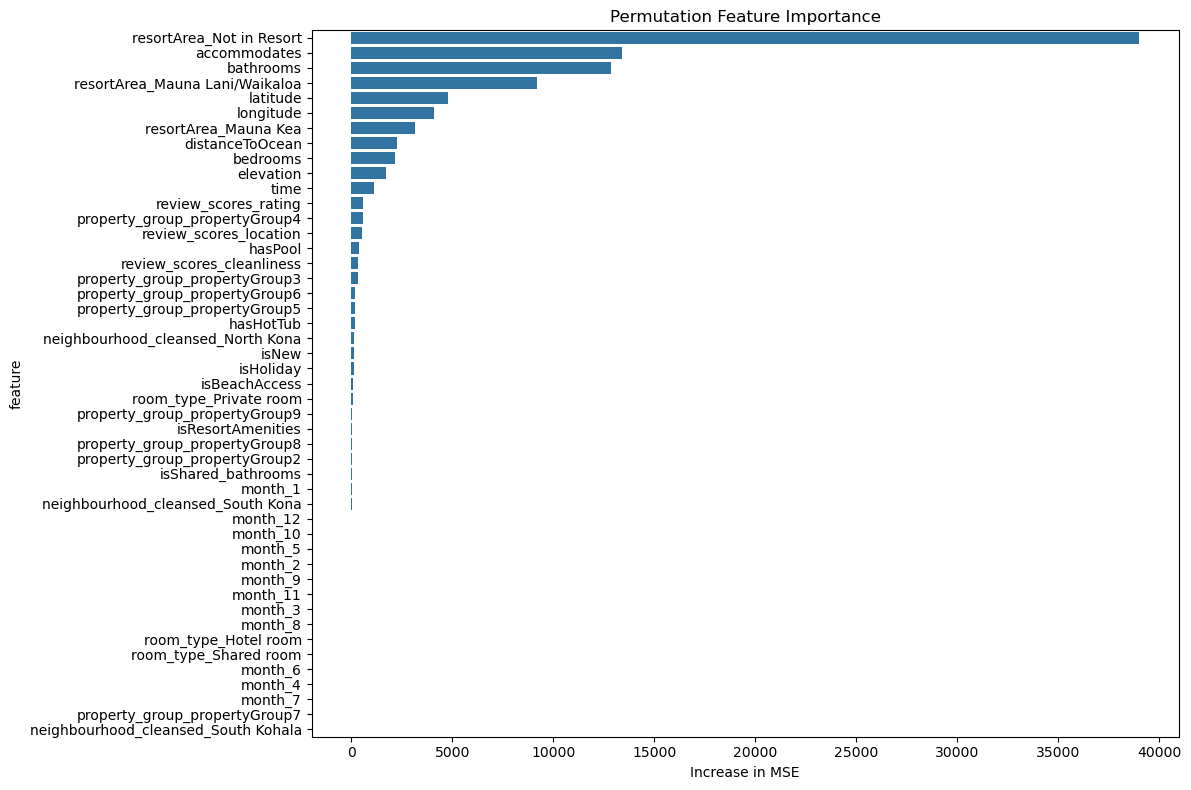

Feature Importances:
                            feature   importance  relative_importance
           resortArea_Not in Resort 39020.103618           358.919538
                       accommodates 13411.668795           123.364869
                          bathrooms 12870.440038           118.386472
     resortArea_Mauna Lani/Waikaloa  9216.804174            84.779147
                           latitude  4787.133209            44.033600
                          longitude  4105.565943            37.764324
               resortArea_Mauna Kea  3134.260922            28.829946
                    distanceToOcean  2257.953106            20.769383
                           bedrooms  2149.796784            19.774526
                          elevation  1701.235367            15.648513
                               time  1118.249567            10.286021
               review_scores_rating   570.662668             5.249140
      property_group_propertyGroup4   555.229844             5.107184

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
def single_feature_importance(model, X, y, feature):
    np.random.seed(42)
    baseline_mse = mean_squared_error(y, model.predict(X))
    X_permuted = X.copy()
    X_permuted[feature] = np.random.permutation(X_permuted[feature])
    permuted_mse = mean_squared_error(y, model.predict(X_permuted))
    return permuted_mse - baseline_mse

# Assuming your model is called 'xgb_model' and is already fitted

# Calculate baseline MSE
baseline_mse = mean_squared_error(y_test, xgb_model.predict(X_test))

# Calculate importance for each feature
feature_importance = []
for feature in X_test.columns:
    importance = single_feature_importance(xgb_model, X_test, y_test, feature)
    feature_importance.append({'feature': feature, 'importance': importance})

# Convert to DataFrame and sort
feature_importance_df = pd.DataFrame(feature_importance)
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Calculate relative importance
feature_importance_df['relative_importance'] = (feature_importance_df['importance'] / baseline_mse) * 100

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Permutation Feature Importance')
plt.xlabel('Increase in MSE')
plt.tight_layout()
plt.show()

# Print feature importances
print("Feature Importances:")
print(feature_importance_df.to_string(index=False))

print(f"\nBaseline MSE: {baseline_mse:.4f}")

print("\nRelative Feature Importances (% of baseline MSE):")
print(feature_importance_df[['feature', 'relative_importance']].to_string(index=False))


**Results tend to vary.  The feature importance will be cross validated in other notebooks.  In this iteration the features had a slight positive impact on the models performance (may be negligible).**

In [41]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306254 entries, 0 to 306253
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listing_id                           306254 non-null  int64  
 1   price                                306254 non-null  float64
 2   latitude                             306254 non-null  float64
 3   longitude                            306254 non-null  float64
 4   property_type                        306254 non-null  object 
 5   accommodates                         306254 non-null  int64  
 6   bathrooms                            306254 non-null  float64
 7   bedrooms                             306254 non-null  float64
 8   review_scores_location               306254 non-null  float64
 9   review_scores_rating                 306254 non-null  float64
 10  review_scores_cleanliness            306254 non-null  float64
 11  room_type_Pri

# Early Stopping_cv

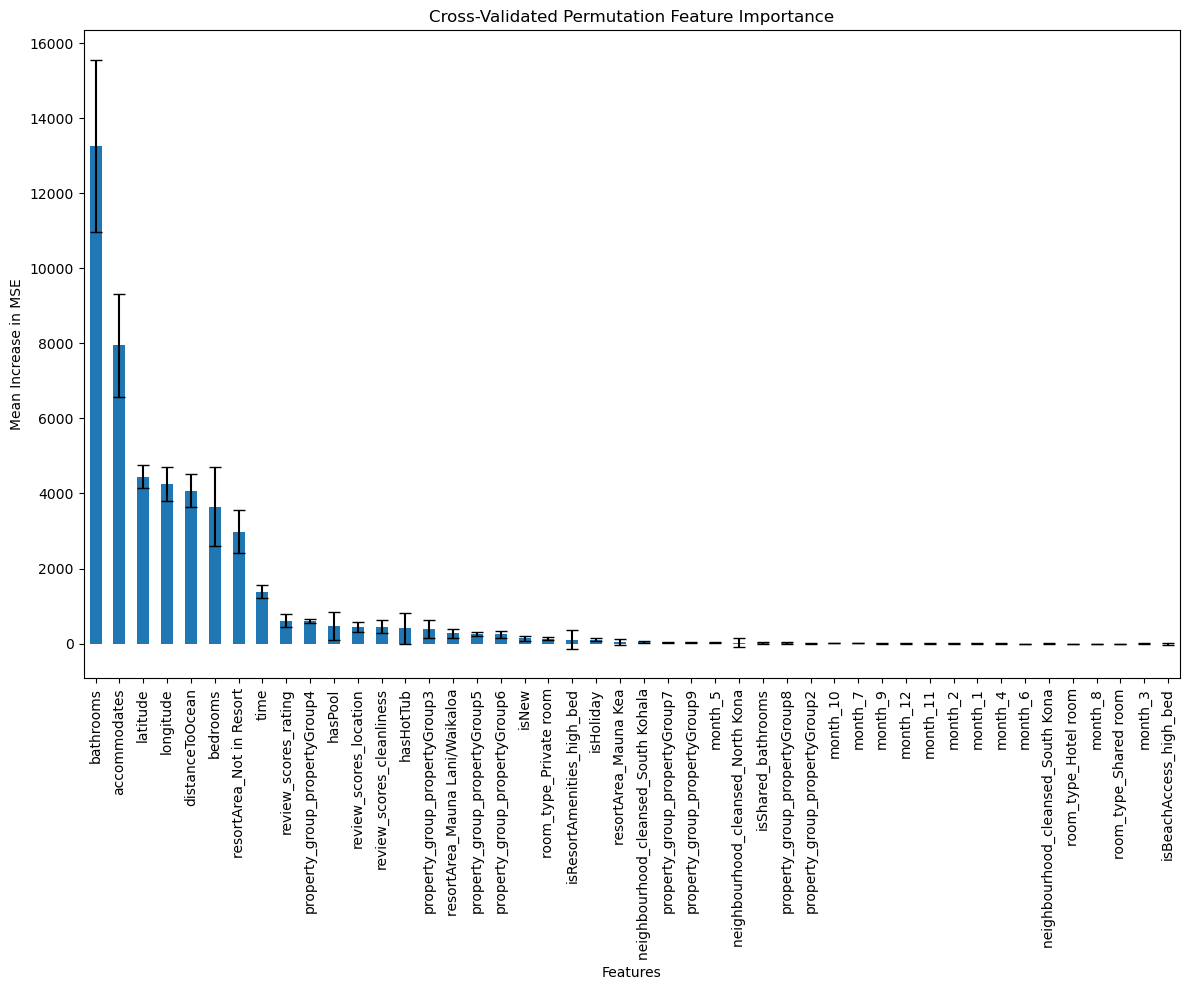

Cross-Validated Feature Importances:
bathrooms: 13264.5094 ± 2291.9025
accommodates: 7950.0918 ± 1372.5262
latitude: 4450.1421 ± 313.1829
longitude: 4250.6957 ± 447.2428
distanceToOcean: 4074.2503 ± 438.2451
bedrooms: 3644.0925 ± 1049.4937
resortArea_Not in Resort: 2981.6505 ± 565.0344
time: 1378.0259 ± 173.2266
review_scores_rating: 612.2574 ± 172.3950
property_group_propertyGroup4: 609.3144 ± 55.2649
hasPool: 467.9368 ± 379.7305
review_scores_location: 452.0186 ± 132.7447
review_scores_cleanliness: 445.1038 ± 169.8394
hasHotTub: 403.2327 ± 410.6771
property_group_propertyGroup3: 380.4297 ± 245.3042
resortArea_Mauna Lani/Waikaloa: 274.9832 ± 114.7671
property_group_propertyGroup5: 251.3697 ± 57.5382
property_group_propertyGroup6: 243.2697 ± 90.2985
isNew: 137.3645 ± 66.4251
room_type_Private room: 130.1679 ± 32.6439
isResortAmenities_high_bed: 106.5008 ± 251.9623
isHoliday: 102.0790 ± 36.1613
resortArea_Mauna Kea: 36.3519 ± 71.7526
neighbourhood_cleansed_South Kohala: 34.0075 ± 25.254

In [67]:
import numpy as np
import pandas as pd
import random
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import itertools
import csv
from xgboost import XGBRegressor
def custom_cross_validation(df,seed, n_splits=5):
    # Get unique listing IDs
    listings = df['listing_id'].unique()
    n_listings = len(listings)
    random.seed(seed)
    # Shuffle the listings
    random.shuffle(listings)
    
    # Calculate the size of each fold
    fold_size = n_listings // n_splits
    
    # Create folds as a list of lists
    folds = [list(listings[i * fold_size:(i + 1) * fold_size]) for i in range(n_splits)]
    
    # If there are leftover listings, distribute them into the folds
    leftover = listings[n_splits * fold_size:]
    for i, listing in enumerate(leftover):
        folds[i].append(listing)
    
    # Generate train-test splits
    for i in range(n_splits):
        # Validation fold
        val_listings = folds[i]
        
        # Training folds (all other folds)
        train_listings = [listing for j in range(n_splits) if j != i for listing in folds[j]]
        
        # Create train and validation DataFrames
        train = df[df['listing_id'].isin(train_listings)]
        val = df[df['listing_id'].isin(val_listings)]
        
        yield train, val
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

def permutation_importance_cv(model, X, y, feature, n_repeats=12):
    baseline_mse = mean_squared_error(y, model.predict(X))
    importances = []
    for _ in range(n_repeats):
        X_permuted = X.copy()
        X_permuted[feature] = np.random.permutation(X_permuted[feature])
        permuted_mse = mean_squared_error(y, model.predict(X_permuted))
        importances.append(permuted_mse - baseline_mse)
    return np.mean(importances)

def cross_validated_feature_importance(df, model_class, model_params, n_splits=5):
    feature_importances = []
    non_features=['price','inResort','number_of_reviews','geometry','week','listing_id','log_price','listing_url','missing_rating','price_per_accommodation','price_per_bedroom','price_per_review','property_type','geometry','anomaly_score','price_per_accommodation','price_per_bedroom','price_per_review','amenities_length']
    
    features=[col for col in df.columns if col not in non_features]
    seed=2
    for train, val in custom_cross_validation(df, seed,n_splits=n_splits):
        X_train = train[features]
        y_train = train['price']
        X_val = val[features]
        y_val = val['price']
        
        # Train the model
        model = model_class(**model_params)
        model.fit(X_train, y_train)
        
        # Calculate feature importance for this fold
        fold_importances = []
        for feature in X_val.columns:
            importance = permutation_importance_cv(model, X_val, y_val, feature)
            fold_importances.append({'feature': feature, 'importance': importance})
        
        feature_importances.append(pd.DataFrame(fold_importances))
    
    # Aggregate importances across folds
    all_importances = pd.concat(feature_importances)
    mean_importances = all_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)
    std_importances = all_importances.groupby('feature')['importance'].std()
    
    return mean_importances, std_importances


# Set your model parameters
model_params = {
    'n_estimators': 350,
    'subsample':0.7,
    'colsample_bytree':0.6,
    'learning_rate': 0.05,
    'max_depth': 8,
    'gamma':0
    # Add other parameters as needed
}

# Perform cross-validated feature importance
mean_importances, std_importances = cross_validated_feature_importance(df_final, XGBRegressor, model_params)

# Plot feature importances
plt.figure(figsize=(12, 10))
mean_importances.plot(kind='bar', yerr=std_importances, capsize=4)
plt.title('Cross-Validated Permutation Feature Importance')
plt.xlabel('Features')
plt.ylabel('Mean Increase in MSE')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('FeatureImportance_10fold.png')
plt.show()

# Print feature importances
print("Cross-Validated Feature Importances:")
for feature, importance in mean_importances.items():
    print(f"{feature}: {importance:.4f} ± {std_importances[feature]:.4f}")


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Perform cross-validated feature importance
mean_importances, std_importances = cross_validated_feature_importance(df_final, XGBRegressor, model_params)

mean_importances_sorted = mean_importances.sort_values(ascending=False)
std_importances_sorted = std_importances[mean_importances_sorted.index]

# Create the plot
plt.figure(figsize=(12, 14))
sns.set(style="whitegrid")

# Plot horizontal bars without error bars
ax = sns.barplot(x=mean_importances_sorted.values, 
                 y=mean_importances_sorted.index, 
                 orient='h',
                 palette="viridis")

# Add error bars manually
for i, v in enumerate(mean_importances_sorted):
    ax.errorbar(v, i, xerr=std_importances_sorted[i], 
                fmt='none', color='black', capsize=3)

# Customize the plot
plt.title('Cross-Validated Permutation Feature Importance', fontsize=16)
plt.xlabel('Mean Increase in MSE', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout and save
plt.tight_layout()
plt.savefig('FeatureImportance_10fold_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

# Print feature importances
print("Cross-Validated Feature Importances:")
for feature, importance in mean_importances_sorted.items():
    print(f"{feature}: {importance:.4f} ± {std_importances_sorted[feature]:.4f}")

KeyboardInterrupt: 

/var/folders/y_/zdr3xmx13qz3pq6ct9kglm7h0000gn/T/ipykernel_2765/3154021083.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mean_importances_sorted.values,
/var/folders/y_/zdr3xmx13qz3pq6ct9kglm7h0000gn/T/ipykernel_2765/3154021083.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.errorbar(v, i, xerr=std_importances_sorted[i],


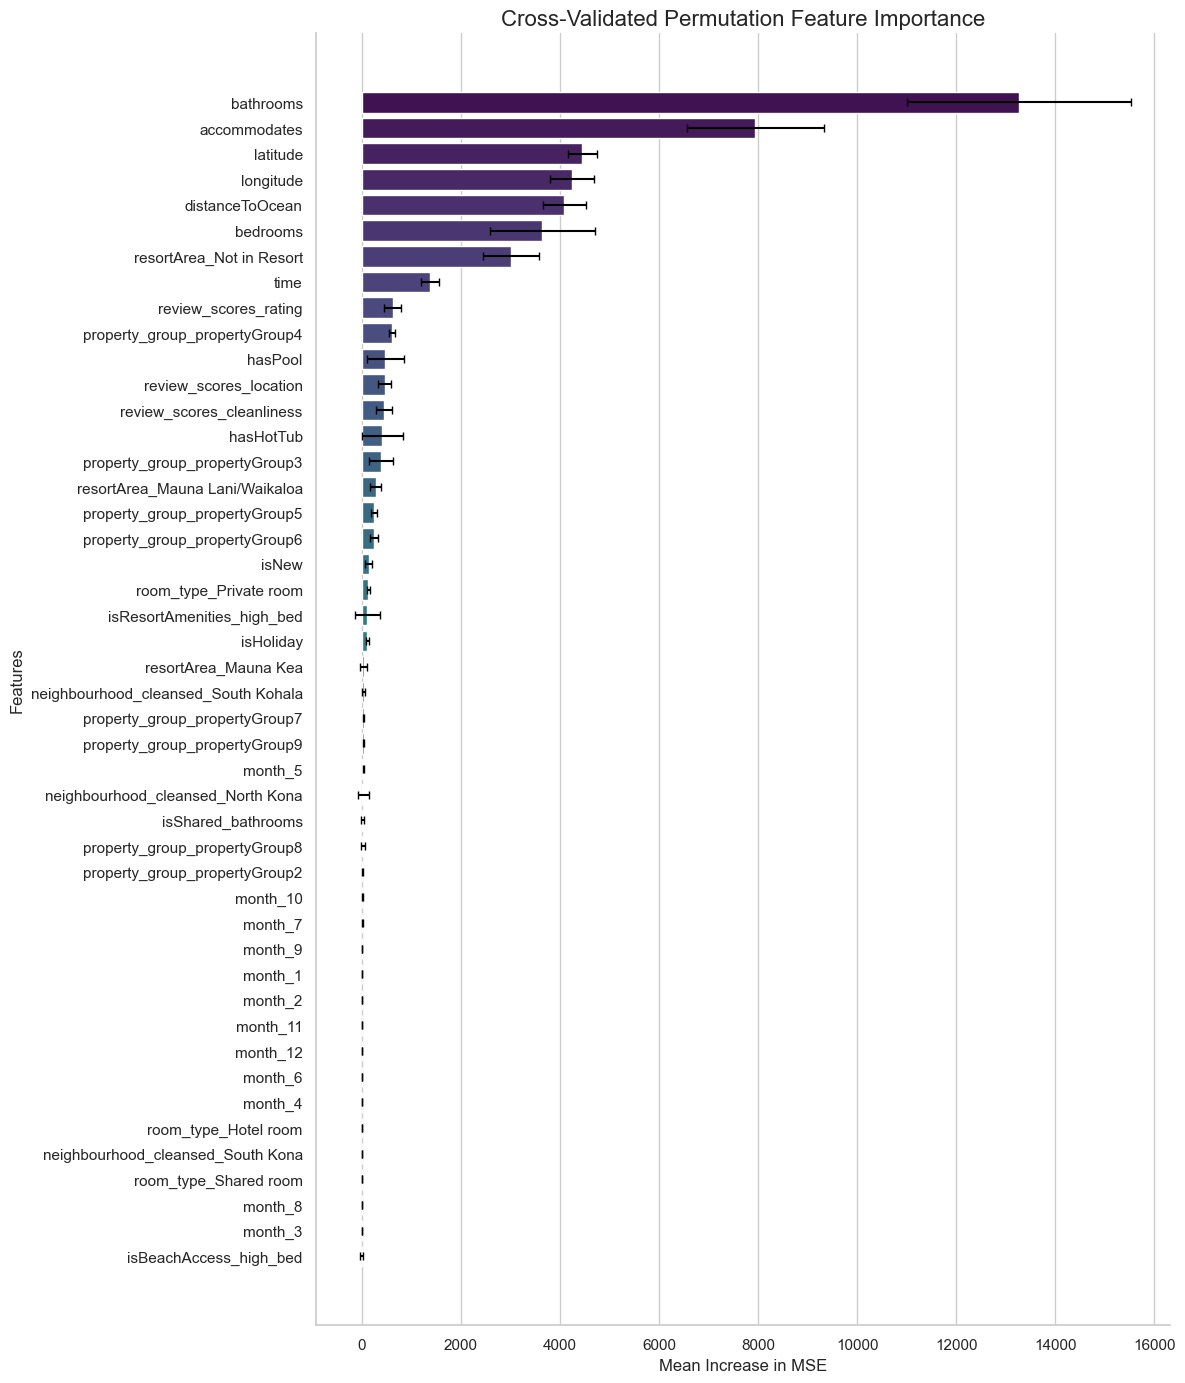

Cross-Validated Feature Importances:
bathrooms: 13263.2836 ± 2263.9399
accommodates: 7939.3473 ± 1383.7477
latitude: 4451.7918 ± 292.0673
longitude: 4241.8617 ± 440.7782
distanceToOcean: 4089.3547 ± 438.1123
bedrooms: 3645.1165 ± 1054.3143
resortArea_Not in Resort: 3003.0590 ± 568.7752
time: 1376.0853 ± 188.6602
review_scores_rating: 617.2851 ± 167.6769
property_group_propertyGroup4: 606.8634 ± 52.0359
hasPool: 471.7178 ± 380.6677
review_scores_location: 455.0362 ± 128.9142
review_scores_cleanliness: 442.6941 ± 170.0148
hasHotTub: 406.7087 ± 411.7713
property_group_propertyGroup3: 383.3187 ± 246.5357
resortArea_Mauna Lani/Waikaloa: 277.1834 ± 116.0309
property_group_propertyGroup5: 246.4161 ± 56.2043
property_group_propertyGroup6: 243.8184 ± 85.3729
isNew: 136.0291 ± 68.9723
room_type_Private room: 130.6447 ± 33.0600
isResortAmenities_high_bed: 106.3517 ± 252.3676
isHoliday: 105.9165 ± 32.7651
resortArea_Mauna Kea: 35.2434 ± 72.6288
neighbourhood_cleansed_South Kohala: 32.9307 ± 23.347

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming mean_importances and std_importances are your saved data
# If they're not already sorted, sort them
mean_importances_sorted = mean_importances.sort_values(ascending=False)
std_importances_sorted = std_importances[mean_importances_sorted.index]

# Create the plot
plt.figure(figsize=(12, 14))
sns.set(style="whitegrid")

# Plot horizontal bars without error bars
ax = sns.barplot(x=mean_importances_sorted.values, 
                 y=mean_importances_sorted.index, 
                 orient='h',
                 palette="viridis")

# Add error bars manually
for i, v in enumerate(mean_importances_sorted):
    ax.errorbar(v, i, xerr=std_importances_sorted[i], 
                fmt='none', color='black', capsize=3)

# Customize the plot
plt.title('Cross-Validated Permutation Feature Importance', fontsize=16)
plt.xlabel('Mean Increase in MSE', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Remove top and right spines
sns.despine()

# Adjust layout and save
plt.tight_layout()
plt.savefig('FeatureImportance_10fold_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

# Print feature importances
print("Cross-Validated Feature Importances:")
for feature, importance in mean_importances_sorted.items():
    print(f"{feature}: {importance:.4f} ± {std_importances_sorted[feature]:.4f}")

Number of trees 193


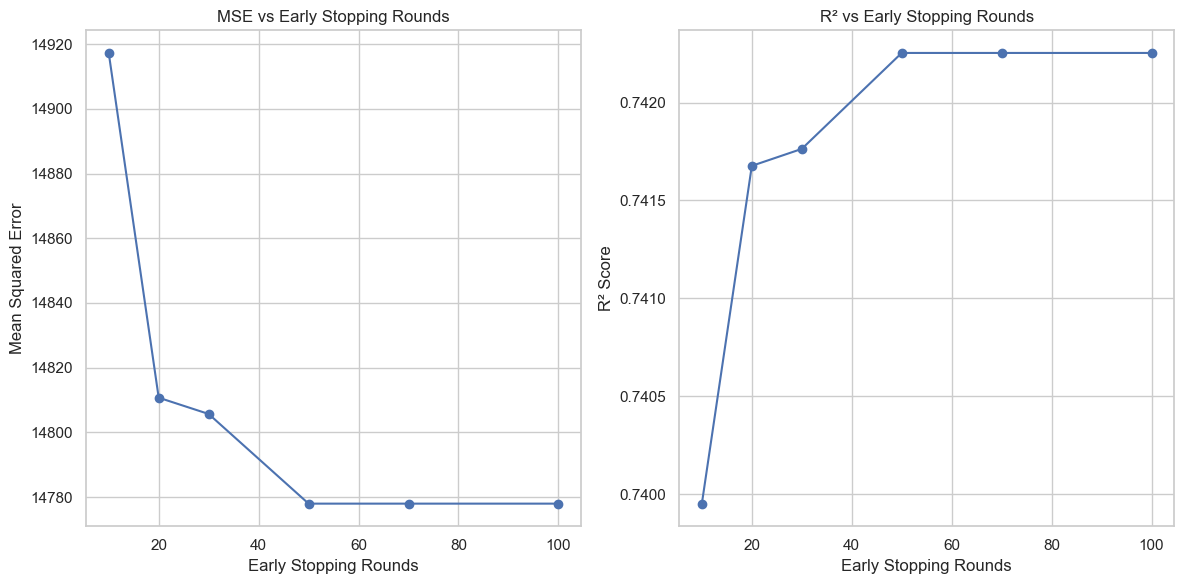

Early Stopping Rounds: 10
Average MSE: 14917.3107
Average R²: 0.7400

Early Stopping Rounds: 20
Average MSE: 14810.7201
Average R²: 0.7417

Early Stopping Rounds: 30
Average MSE: 14805.6839
Average R²: 0.7418

Early Stopping Rounds: 50
Average MSE: 14777.9605
Average R²: 0.7423

Early Stopping Rounds: 70
Average MSE: 14777.9605
Average R²: 0.7423

Early Stopping Rounds: 100
Average MSE: 14777.9605
Average R²: 0.7423

Best Early Stopping Rounds: 50


In [88]:
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



def early_stopping_cv(df, model_params, early_stopping_rounds_list, n_splits=5):
    non_features = ['price', 'inResort', 'number_of_reviews', 'geometry', 'week', 'listing_id', 'log_price', 'listing_url', 'missing_rating', 'price_per_accommodation', 'price_per_bedroom', 'price_per_review', 'property_type', 'geometry', 'anomaly_score', 'price_per_accommodation', 'price_per_bedroom', 'price_per_review', 'amenities_length']
    features = [col for col in df.columns if col not in non_features]
    
    results = []
    seed = 42

    for early_stopping_rounds in early_stopping_rounds_list:
        fold_scores = []
        for train, val in custom_cross_validation(df, seed, n_splits=n_splits):
            X_train, y_train = train[features], train['price']
            X_val, y_val = val[features], val['price']

            model = XGBRegressor(**model_params, early_stopping_rounds=early_stopping_rounds)
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

            y_pred = model.predict(X_val)
            mse = mean_squared_error(y_val, y_pred)
            r2 = r2_score(y_val, y_pred)
            fold_scores.append((mse, r2))

        avg_mse = np.mean([score[0] for score in fold_scores])
        avg_r2 = np.mean([score[1] for score in fold_scores])
        results.append((early_stopping_rounds, avg_mse, avg_r2))

    return results, model.best_iteration

# Set your model parameters
model_params = {
    'n_estimators': 1000,  # Set this high, early stopping will prevent all from being built
    'subsample': 0.7,
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 7,
    'gamma': 0
    # Add other parameters as needed
}

# List of early stopping rounds to test
early_stopping_rounds_list = [10, 20, 30, 50, 70, 100]

# Perform cross-validation with early stopping
results, num_trees = early_stopping_cv(df_final, model_params, early_stopping_rounds_list)
print(f'Number of trees {num_trees}')
# Plot results
plt.figure(figsize=(12, 6))
early_stopping_rounds, mses, r2s = zip(*results)

plt.subplot(1, 2, 1)
plt.plot(early_stopping_rounds, mses, marker='o')
plt.title('MSE vs Early Stopping Rounds')
plt.xlabel('Early Stopping Rounds')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.plot(early_stopping_rounds, r2s, marker='o')
plt.title('R² vs Early Stopping Rounds')
plt.xlabel('Early Stopping Rounds')
plt.ylabel('R² Score')

plt.tight_layout()
plt.savefig('early_stopping_results.png')
plt.show()

# Print results
for early_stopping_rounds, mse, r2 in results:
    print(f"Early Stopping Rounds: {early_stopping_rounds}")
    print(f"Average MSE: {mse:.4f}")
    print(f"Average R²: {r2:.4f}")
    print()

# Find best early stopping rounds
best_early_stopping_rounds = min(results, key=lambda x: x[1])[0]
print(f"Best Early Stopping Rounds: {best_early_stopping_rounds}")

In [86]:
num_estimators_used = results.best_iteration
num_estimators_used

AttributeError: 'list' object has no attribute 'best_iteration'

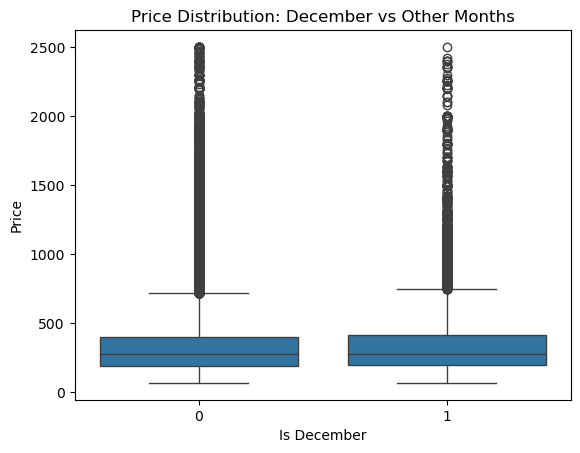

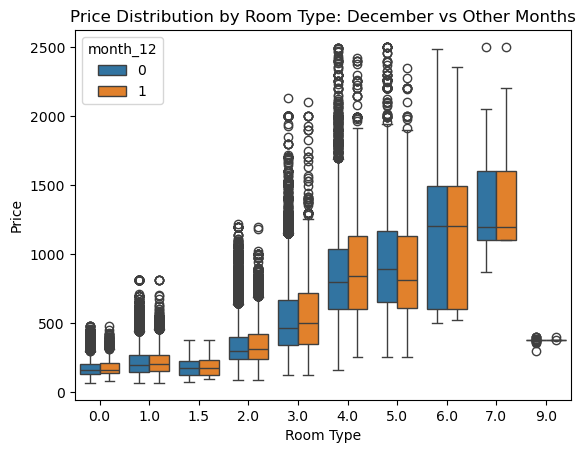

KeyError: "['isDecember'] not found in axis"

In [189]:
# Investigate the relationship between month_12 and other features
import seaborn as sns


sns.boxplot(x='month_12', y='price', data=df_final)
plt.title('Price Distribution: December vs Other Months')
plt.xlabel('Is December')
plt.ylabel('Price')
plt.show()

# Check for interactions with other features (e.g., room type)
sns.boxplot(x='bedrooms', y='price', hue='month_12', data=df_final)
plt.title('Price Distribution by Room Type: December vs Other Months')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()


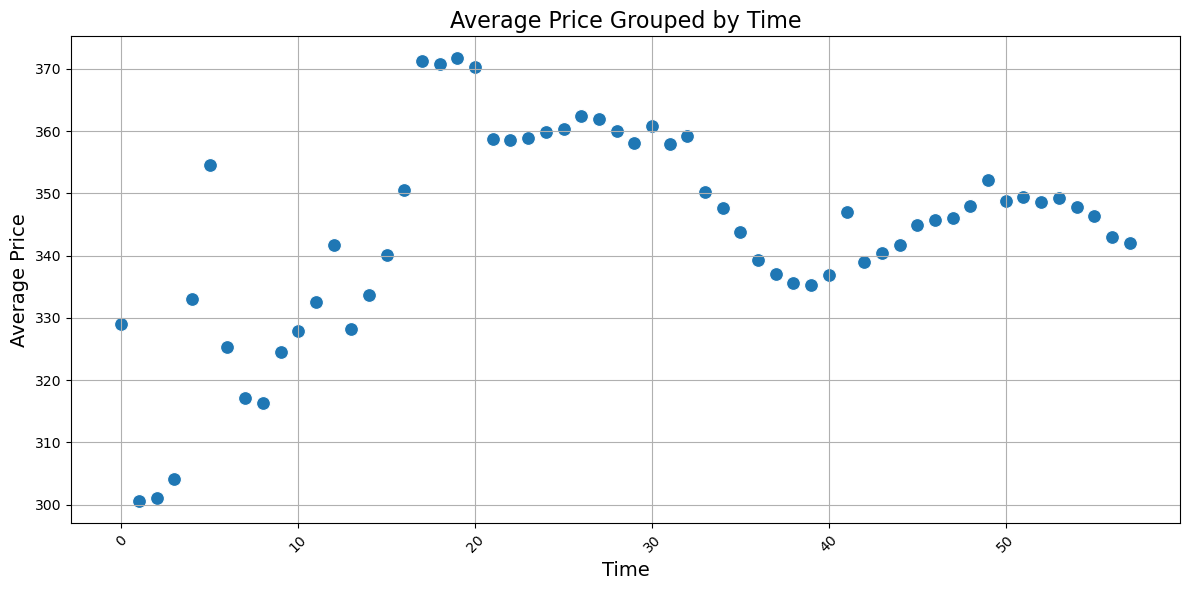

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_final is your DataFrame and 'time' is a column in it

# Group by 'time' and calculate the average price
average_price_by_time = df_final.groupby('time')['price'].mean().reset_index()

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=average_price_by_time, x='time', y='price', marker='o', s=100)

# Add titles and labels
plt.title('Average Price Grouped by Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [205]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308964 entries, 0 to 308963
Data columns (total 56 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listing_id                           308964 non-null  int64  
 1   price                                308964 non-null  float64
 2   latitude                             308964 non-null  float64
 3   longitude                            308964 non-null  float64
 4   property_type                        308964 non-null  object 
 5   accommodates                         308964 non-null  int64  
 6   bathrooms                            308964 non-null  float64
 7   bedrooms                             308964 non-null  float64
 8   review_scores_location               308964 non-null  float64
 9   review_scores_rating                 308964 non-null  float64
 10  review_scores_cleanliness            308964 non-null  float64
 11  room_type_Pri

In [223]:
# Create a copy of df_final
df_final_reduced = df_final.copy()

# List of features to drop
features_to_drop = [
    'room_type_Hotel room',
    'room_type_Shared room',
    'month_7',
    'month_8',
    'month_12',
    'neighbourhood_cleansed_South Kona'
]

# Drop the specified columns from the copied DataFrame
df_final_reduced = df_final_reduced.drop(columns=features_to_drop)

# Display the first few rows of the reduced DataFrame to confirm changes
print(df_final_reduced.head())

# Optionally, display the shape of the new DataFrame
print(f"Reduced DataFrame shape: {df_final_reduced.shape}")

train, test=train_test_split_airbnb(df_final_reduced,0.8)
non_features=['price','inResort','week','number_of_reviews','geometry','listing_id','log_price','listing_url','missing_rating','price_per_accommodation','price_per_bedroom','price_per_review','property_type','geometry','anomaly_score','price_per_accommodation','price_per_bedroom','price_per_review','amenities_length']

features=[col for col in df_final_reduced.columns if col not in non_features]

X_train=train[features]
y_train=train['price']
X_test=test[features]
y_test=test['price']


   listing_id       price  latitude  longitude       property_type  \
0        5269  136.500000   20.0274   -155.702  Entire rental unit   
1        5269  140.000000   20.0274   -155.702  Entire rental unit   
2        5269  141.428571   20.0274   -155.702  Entire rental unit   
3        5269  145.000000   20.0274   -155.702  Entire rental unit   
4        5269  145.000000   20.0274   -155.702  Entire rental unit   

   accommodates  bathrooms  bedrooms  review_scores_location  \
0             2        1.0       1.0                     5.0   
1             2        1.0       1.0                     5.0   
2             2        1.0       1.0                     5.0   
3             2        1.0       1.0                     5.0   
4             2        1.0       1.0                     5.0   

   review_scores_rating  ...  month_2  month_3  month_4  month_5  month_6  \
0                  4.67  ...        0        0        0        0        0   
1                  4.67  ...        0   

In [225]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Set the best model parameters
best_model_params = {
    'n_estimators': 100,          # Number of trees in the forest
    'max_depth': 7,               # Maximum depth of the tree
    'learning_rate': 0.1,         # Step size shrinkage used in update to prevent overfitting
    'subsample': 0.7,             # Proportion of samples to use for training each tree
    'colsample_bytree': 0.8,      # Proportion of features to use for training each tree
    'gamma': 0                    # Minimum loss reduction required to make a further partition
}

# Initialize the XGBRegressor model with the best parameters
xgb_model = xgb.XGBRegressor(**best_model_params)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model performance
mse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 120.1746
R² Score: 0.7062


In [213]:
train[features].info()

<class 'pandas.core.frame.DataFrame'>
Index: 247273 entries, 0 to 308963
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   latitude                             247273 non-null  float64
 1   longitude                            247273 non-null  float64
 2   property_type                        247273 non-null  object 
 3   accommodates                         247273 non-null  int64  
 4   bathrooms                            247273 non-null  float64
 5   bedrooms                             247273 non-null  float64
 6   review_scores_location               247273 non-null  float64
 7   review_scores_rating                 247273 non-null  float64
 8   review_scores_cleanliness            247273 non-null  float64
 9   room_type_Private room               247273 non-null  int64  
 10  week                                 247273 non-null  int64  
 11  isShared_bathrooms

In [221]:
df_final_reduced.to_csv("airbnbHawaii_clean7.csv",index=False)

NameError: name 'gdf' is not defined

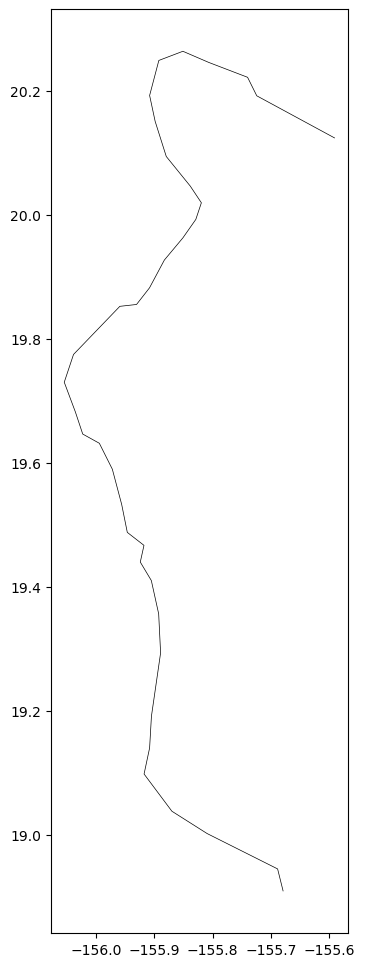

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load your coastline GeoDataFrame
hawaiian_coast = gpd.read_file("hawaiian_coast.geojson")

# Plot the coastline and Airbnb listings
plt.figure(figsize=(15, 12))
hawaiian_coast.plot(ax=plt.gca(), color='black', linewidth=0.5, label='Coastline')
gdf.plot(ax=plt.gca(), color='blue', markersize=10, label='Airbnb Listings')
plt.title('Airbnb Listings and Coastline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

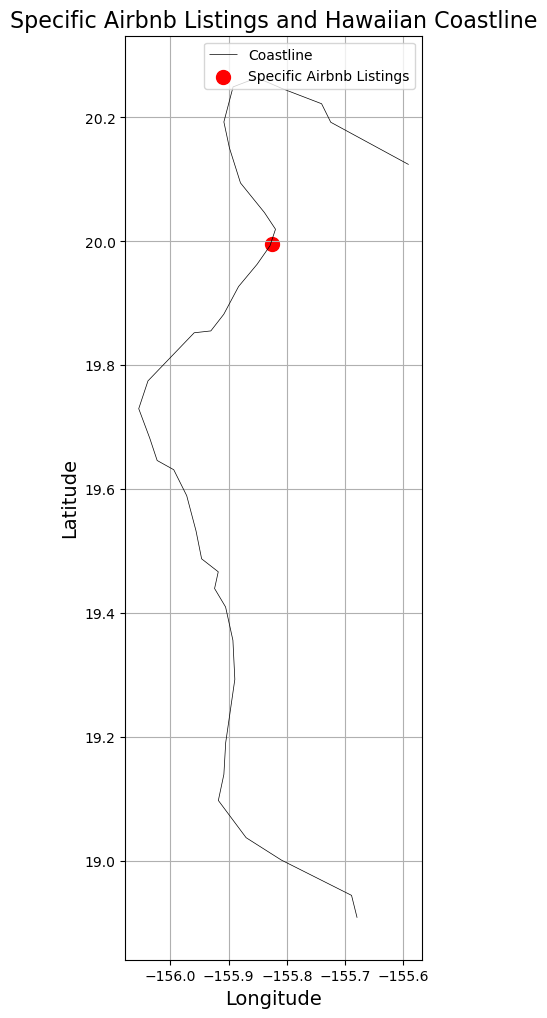

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the Hawaiian coastline GeoJSON file
coastline = gpd.read_file("Hawaiian_Coast.geojson")

# Create a list of specific Airbnb listing coordinates (latitude, longitude)
specific_coordinates = [
    (19.995485, -155.825271),  # Example coordinate
    # Add more coordinates if needed
]

# Create a GeoDataFrame for the specific listing coordinates
geometry = [Point(lon, lat) for lat, lon in specific_coordinates]
gdf_specific = gpd.GeoDataFrame(geometry=geometry, crs="EPSG:4326")

# Plot the coastline and specific Airbnb listing coordinates
plt.figure(figsize=(15, 12))
coastline.plot(ax=plt.gca(), color='black', linewidth=0.5, label='Coastline')
gdf_specific.plot(ax=plt.gca(), color='red', markersize=100, label='Specific Airbnb Listings')

# Set plot title and labels
plt.title('Specific Airbnb Listings and Hawaiian Coastline', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [11]:
for item in coastline['geometry'].tolist():
    print(item)

LINESTRING (-155.5908321575017 20.124026837287047, -155.72455371336883 20.192246461817675, -155.7402844055902 20.22211310891393, -155.80674361958407 20.24608247708909, -155.85105577788445 20.26407789473133, -155.89223420836234 20.249296808461068, -155.9080283950859 20.192781911110913, -155.89855098848778 20.150998608481473, -155.87951681444474 20.094336129178956, -155.8383888032966 20.04652960286238, -155.81941667241566 20.01965522144684, -155.8289019465154 19.992833345524133, -155.85107746755256 19.96302216676, -155.8828190092777 19.92721751055069, -155.90819899389197 19.882453698908137, -155.9304318533354 19.855584206459866, -155.9590034924343 19.852597898802372, -156.0383488387572 19.77495869295896, -156.0542113190152 19.730146124415157, -156.03523273236075 19.682369727045057, -156.0225868500147 19.64654347652339, -155.9941144203649 19.631656412832115, -155.97185487861523 19.589785763065223, -155.9558412173077 19.532853666624703, -155.94624555016992 19.48790314030964, -155.917697454